In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

#  Importing data

In [3]:
#Importing files

ld1 = pd.read_csv('loan_data_2007_2014.csv', index_col = 0) #index_col = 0, will use first column as index in dataframe
ld2 = pd.read_csv('loan_data_2015.csv')

## Basic data information

In [6]:
print('total number of rows and columns for dataset1 ld1: ', ld1.shape)
print('total number of rows and columns for dataset2 ld2: ', ld2.shape)

total number of rows and columns for dataset1 ld1:  (466285, 74)
total number of rows and columns for dataset2 ld2:  (421094, 74)


In [7]:
pd.set_option('max_colwidth',50)

In [7]:
ld1.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2       NaN  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   

                                                desc      purpose     title  \
0    Borrower added on 12/22/11 > I need to upgra...  credit_card  Computer   
1    Borrower added on 12/22/11 > I plan to use t...          car      bike   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65          0.0           Jan-85             1.0   
1    309xx         GA   1.00          0.0           Apr-99             5.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7        9.0                   f        0.0   
1       1687         9.4        4.0                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5861.071414          5831.78          5000.00   
1            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Jan-15           171.62          NaN             Jan-16   
1       Apr-13           119.66          NaN             Sep-13   

   collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
0                         0.0                          NaN            1   
1                         0.0                          NaN            1   

  application_type  annual_inc_joint  dti_joint  verification_status_joint  \
0       INDIVIDUAL               NaN        NaN                        NaN   
1       INDIVIDUAL               NaN        NaN                        NaN   

   acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
0             0.0           NaN          NaN          NaN         NaN   
1             0.0           NaN          NaN          NaN         NaN   

   open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  \
0          NaN          NaN                 NaN           NaN      NaN   
1          NaN          NaN                 NaN           NaN      NaN   

   open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
0          NaN          NaN         NaN       NaN               NaN     NaN   
1          NaN          NaN         NaN       NaN               NaN     NaN   

   total_cu_tl  inq_last_12m  
0          NaN           NaN  
1          NaN           NaN

In [9]:
ld2.tail(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
421092  36490806   39222577      12000        12000          12000.0   
421093  36271262   38982659      20000        20000          20000.0   

              term  int_rate  installment grade sub_grade  ... total_bal_il  \
421092   60 months     19.99       317.86     E        E3  ...          NaN   
421093   36 months     11.99       664.20     B        B5  ...          NaN   

       il_util open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
421092     NaN         NaN          NaN        NaN      NaN          27000.0   
421093     NaN         NaN          NaN        NaN      NaN          41700.0   

       inq_fi total_cu_tl inq_last_12m  
421092    NaN         NaN          NaN  
421093    NaN         NaN          NaN  

[2 rows x 74 columns]

In [11]:
df = pd.concat([ld1, ld2])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 887379 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  int64  
 3   funded_amnt                  887379 non-null  int64  
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13  annu

In [13]:
df.reset_index(drop =True,inplace= True)

### dataset shape

In [14]:
df.shape

(887379, 74)

# Note:- 

* We are trimming our taget column at starting to reduce unwanted datas and to work smoothly with a limited computing resources.

#### In our project, we are mainly focused on predicting True Negatives, like given info about a customer, model needs to predict that whether they are going to default or not, so we will only keep, three values out of 10,and they are as follows:

Fully Paid

Charged off

Default

In [15]:
df['loan_status'].value_counts()

loan_status
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [16]:
df.drop(df[df['loan_status'].isin(['Current', 
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'])].index,inplace = True)

In [17]:
df.shape

(254190, 74)

In [18]:
df.reset_index(drop = True,inplace = True)

In [19]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Default'], dtype=object)

In [20]:
df.replace('Charged Off','Default',inplace = True)

## Datatype verification

In [21]:
pd.set_option('display.max_colwidth',None)

In [22]:
#pd.set_option('display.max_columns', None)
ld1.drop('desc',axis = 1).head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                    url  \
0  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0          0.0           Jan-85             1.0                     NaN   
1          0.0           Apr-99             5.0                     NaN   
2          0.0           Nov-01             2.0                     NaN   
3          0.0           Feb-96             1.0                    35.0   
4          0.0           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                0.00   
1          1008.71           456.46         435.17                0.00   
2          3003.65          2400.00         603.65                0.00   
3         122

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254190 entries, 0 to 254189
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           254190 non-null  int64  
 1   member_id                    254190 non-null  int64  
 2   loan_amnt                    254190 non-null  int64  
 3   funded_amnt                  254190 non-null  int64  
 4   funded_amnt_inv              254190 non-null  float64
 5   term                         254190 non-null  object 
 6   int_rate                     254190 non-null  float64
 7   installment                  254190 non-null  float64
 8   grade                        254190 non-null  object 
 9   sub_grade                    254190 non-null  object 
 10  emp_title                    240180 non-null  object 
 11  emp_length                   244222 non-null  object 
 12  home_ownership               254190 non-null  object 
 13 

## Insights

1) 74 columns info are being displayed over there, their non-null values count and datatypes respectively. While looking over the table it can be easily spotted that almost 17- 18 columns have more than 95% of missing values, So we are going to drop them right away.
2) and, for datattype verification, its a bit tedious task to verify by going through it, so we are going for an indepth data verification after droping columns with large number of missing values.

## Duplicated value check

#  NOTE:-  Here we are performing a null value check, instead of dataype conversion, "we can't change the datatype with null value presence , so we have to get rid of those missing values prior to perform any conversion".

## Missing value check

In [24]:
mv = pd.DataFrame({'mv_count':df.isnull().sum(),
                                'percent_missing':df.isnull().sum()/len(df) *100}
                              ).sort_values(by = ['percent_missing'], ascending = False)
mv.head(25)

mv_count  percent_missing
dti_joint                      254189        99.999607
verification_status_joint      254189        99.999607
annual_inc_joint               254189        99.999607
il_util                        254064        99.950431
mths_since_rcnt_il             254050        99.944923
open_acc_6m                    254046        99.943349
open_il_6m                     254046        99.943349
open_il_12m                    254046        99.943349
open_il_24m                    254046        99.943349
total_bal_il                   254046        99.943349
inq_last_12m                   254046        99.943349
open_rv_12m                    254046        99.943349
open_rv_24m                    254046        99.943349
max_bal_bc                     254046        99.943349
all_util                       254046        99.943349
inq_fi                         254046        99.943349
total_cu_tl                    254046        99.943349
next_pymnt_d                   252971        99.520437
mths_since_last_record         222376        87.484165
mths_since_last_major_derog    206314        81.165270
desc                           165747        65.205948
mths_since_last_delinq         141446        55.645777
tot_coll_amt                    63726        25.070223
tot_cur_bal                     63726        25.070223
total_rev_hi_lim                63726        25.070223

In [25]:
print('Total no of columns having null values more than 55% are: ',len(mv[mv['percent_missing'].gt(56)]),
'\n', ' ', 'total number of columns in dataset: ', df.shape[1])

Total no of columns having null values more than 55% are:  21 
   total number of columns in dataset:  74


### 21 columns in our dataset has more than 56% of missing values present in them, and out of 21 columns, only 1 column has less than 81% missing valuues.
So we are going to drop all the columns having more than 56% of values present in them.

In [26]:
df.drop(mv[mv['percent_missing'].gt(56)].index, axis = 1, inplace = True)

In [27]:
new= df.copy()

In [32]:
new.shape

(254190, 53)

In [34]:
new.to_csv('Lc club data for imputation.csv')

In [28]:
new_mv = pd.DataFrame({'mv_count':df.isnull().sum(),
                                'percent_missing':df.isnull().sum()/len(df) *100}
                              ).sort_values(by = ['percent_missing'], ascending = False).head(12)
new_mv.head(12)

mv_count  percent_missing
mths_since_last_delinq        141446        55.645777
tot_coll_amt                   63726        25.070223
total_rev_hi_lim               63726        25.070223
tot_cur_bal                    63726        25.070223
emp_title                      14010         5.511625
emp_length                      9968         3.921476
last_pymnt_d                     536         0.210866
revol_util                       200         0.078681
collections_12_mths_ex_med        56         0.022031
last_credit_pull_d                21         0.008262
title                             14         0.005508
total_pymnt_inv                    0         0.000000

In [102]:
for row in ['title','emp_length','emp_title','last_pymnt_d','last_credit_pull_d']:
    df[row].fillna(df[row].mode()[0],inplace = True)

In [36]:
for row in new_mv.index[:12]:
    if df[row].dtypes in ['float64','int64']:
        df[row].fillna(df[row].median(),inplace = True)
    else:
        pass 
    

In [103]:
df.isnull().sum().head(20)

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
url                    0
purpose                0
dtype: int64

In [37]:
df.shape

(254190, 53)

#### Note: 
As the information present in above cell is a bit confusing and there is a chance of making errors, we will go for an indepth datatype verification.

# Datatype Correction

####  Creating a dataframe having column names of our dataset as values in index column and their datatypes as values in other one.

In [38]:
#creating a dataframe having variables and their datatypes in seperate columns

df_d = pd.DataFrame(df.dtypes)          #dataframe for datatypes as read by system
df_d.reset_index(inplace = True)
df_d.head(5)

index        0
0               id    int64
1        member_id    int64
2        loan_amnt    int64
3      funded_amnt    int64
4  funded_amnt_inv  float64

In [46]:
df_d.columns

Index(['index', 0], dtype='object')

In [47]:
df_d.rename(columns={0:'data type'},inplace =  True)

# ???? we have to upload corrected datatype file here and then move forward with our analysis

##### importing original csv file containing variables and thier actual datatypes along with their descriptions

In [42]:
!pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [49]:
#importing original csv file containing variables and thier actual datatypes along with their descriptions
d = pd.read_excel('lclubnew.xlsx', index_col = 0) #d ---- dataframe for data dictionary hosted on website
d.head()
#concatenating 
merged_df = df_d.merge(d, left_on='index', right_on='index', how='inner')

merged_df.head()

index data type data_types  \
0               id     int64        obj   
1        member_id     int64        obj   
2        loan_amnt     int64      int64   
3      funded_amnt     int64      int64   
4  funded_amnt_inv   float64    float64   

                                                                    description  
0                                 A unique LC assigned ID for the loan listing.  
1                              A unique LC assigned ID for the borrower member.  
2                    The listed amount of the loan applied for by the borrower.  
3                The total amount committed to that loan at that point in time.  
4  The total amount committed by investors for that loan at that point in time.

In [50]:
merged_df.shape

(53, 4)

In [51]:
#changing the column name 

merged_df.rename(columns = {'data type' : 'env_dtype'},inplace = True)
merged_df.head()

index env_dtype data_types  \
0               id     int64        obj   
1        member_id     int64        obj   
2        loan_amnt     int64      int64   
3      funded_amnt     int64      int64   
4  funded_amnt_inv   float64    float64   

                                                                    description  
0                                 A unique LC assigned ID for the loan listing.  
1                              A unique LC assigned ID for the borrower member.  
2                    The listed amount of the loan applied for by the borrower.  
3                The total amount committed to that loan at that point in time.  
4  The total amount committed by investors for that loan at that point in time.

In [52]:
for col in merged_df[['env_dtype','data_types']]:
    print('unique values presnt in : ',col, ' ', merged_df[col].unique())

unique values presnt in :  env_dtype   [dtype('int64') dtype('float64') dtype('O')]
unique values presnt in :  data_types   ['obj' 'int64' 'float64' 'obj/cat' 'yearmonth' 'object' 'categorical']


In [53]:
merged_df['data_types'].replace(['obj','obj/cat','categorical'],['object','object','object'], inplace = True)

In [54]:
cd_n = merged_df.copy()

In [55]:
print('Total column having correct datatypes are: ', len(merged_df[merged_df['data_types'].eq(merged_df['env_dtype'])]))
print()
print(merged_df[merged_df['data_types'].eq(merged_df['env_dtype'])].head(5))

Total column having correct datatypes are:  38

             index env_dtype data_types  \
2        loan_amnt     int64      int64   
3      funded_amnt     int64      int64   
4  funded_amnt_inv   float64    float64   
5             term    object     object   
6         int_rate   float64    float64   

                                                                            description  
2                            The listed amount of the loan applied for by the borrower.  
3                        The total amount committed to that loan at that point in time.  
4          The total amount committed by investors for that loan at that point in time.  
5  The number of payments on the loan. Values are in months and can be either 36 or 60.  
6                                                        The interest rate on the loan.  


### Following variables have incorrect datatype, we will convert the data into their desired format.

In [56]:
print('Total number of column having incorrect datatypes are: ', len(merged_df[~merged_df['data_types'].eq(merged_df['env_dtype'])]))
print()
print(merged_df[~merged_df['data_types'].eq(merged_df['env_dtype'])]) #.head(5))

Total number of column having incorrect datatypes are:  15

                         index env_dtype data_types  \
0                           id     int64     object   
1                    member_id     int64     object   
15                     issue_d    object  yearmonth   
24                 delinq_2yrs   float64      int64   
25            earliest_cr_line    object  yearmonth   
26              inq_last_6mths   float64      int64   
27      mths_since_last_delinq   float64      int64   
28                    open_acc   float64      int64   
29                     pub_rec   float64      int64   
32                   total_acc   float64      int64   
43                last_pymnt_d    object  yearmonth   
45          last_credit_pull_d    object  yearmonth   
46  collections_12_mths_ex_med   float64      int64   
47                 policy_code     int64     object   
49              acc_now_delinq   float64      int64   

                                                           

##### creating a dictionary, having 'variable' as key and their top 5 'unique_values' as value, to use this dictionary in our datatype dataframe


In [57]:
# creating a dictionary, having 'variable' as key and their top 5 'unique_values' as value, to use this dictionary in our datatype dataframe

unique_values_dict = {}
for i in df.columns:
    unique_values = list(pd.Series(df[i].unique()))
    uv = unique_values[:5]
    #lis1.append(unique_values[:5])
    unique_values_dict[i] = uv

In [58]:
#creating a new column corresponging to the variables present in the index column
merged_df['uniq_va'] = merged_df['index'].map(unique_values_dict)

##### creating a new datfarame using 'datatype' datfarame for column having 'incorrect datatypes'

In [59]:
inmerged_df = merged_df[~merged_df['data_types'].eq(merged_df['env_dtype'])]
inmerged_df.head()

index env_dtype data_types  \
0                 id     int64     object   
1          member_id     int64     object   
15           issue_d    object  yearmonth   
24       delinq_2yrs   float64      int64   
25  earliest_cr_line    object  yearmonth   

                                                                                                      description  \
0                                                                   A unique LC assigned ID for the loan listing.   
1                                                                A unique LC assigned ID for the borrower member.   
15                                                                           The month which the loan was funded.   
24  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.   
25                                             The month the borrower's earliest reported credit line was opened.   

                                          uniq_va  
0   [1077501, 1077430, 1077175, 1076863, 1075269]  
1   [1296599, 1314167, 1313524, 1277178, 1311441]  
15       [Dec-11, Nov-11, Oct-11, Sep-11, Aug-11]  
24                      [0.0, 2.0, 3.0, 1.0, 4.0]  
25       [Jan-85, Apr-99, Nov-01, Feb-96, Nov-04]

In [60]:
inmerged_df[inmerged_df['data_types'].eq('yearmonth')]

index env_dtype data_types  \
15             issue_d    object  yearmonth   
25    earliest_cr_line    object  yearmonth   
43        last_pymnt_d    object  yearmonth   
45  last_credit_pull_d    object  yearmonth   

                                                           description  \
15                                The month which the loan was funded.   
25  The month the borrower's earliest reported credit line was opened.   
43                                    Last month payment was received.   
45               The most recent month LC pulled credit for this loan.   

                                     uniq_va  
15  [Dec-11, Nov-11, Oct-11, Sep-11, Aug-11]  
25  [Jan-85, Apr-99, Nov-01, Feb-96, Nov-04]  
43  [Jan-15, Apr-13, Jun-14, Apr-12, Nov-12]  
45  [Jan-16, Sep-13, Jan-15, Sep-15, Dec-14]

'issue_d', 'earliest_cr_line', 'last_pymnt_d',
       'last_credit_pull_d'

In [61]:
for col in ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']:
    df[col] = pd.to_datetime(df[col], format='%b-%y', errors='coerce')

In [62]:
df1 = df.copy()

In [63]:
for i in inmerged_df['index']:
    
    data_type_value = inmerged_df.loc[inmerged_df['index'] == i, 'data_types'].iloc[0]

    
    if data_type_value in ['int64', 'object']:
        
        if data_type_value in ['int64']:
            df[i] = df[i].astype(data_type_value)
        else:
            df[i] = df[i].astype(data_type_value)
            
    else:
        print(f"Invalid data type value '{data_type_value}' for index '{i}'. Skipping conversion.")
        continue  

Invalid data type value 'yearmonth' for index 'issue_d'. Skipping conversion.
Invalid data type value 'yearmonth' for index 'earliest_cr_line'. Skipping conversion.
Invalid data type value 'yearmonth' for index 'last_pymnt_d'. Skipping conversion.
Invalid data type value 'yearmonth' for index 'last_credit_pull_d'. Skipping conversion.


In [64]:
df_= pd.DataFrame(df.dtypes)          #dataframe for datatypes as read by system
df_.reset_index(inplace = True)
df_.head(5)

index        0
0               id   object
1        member_id   object
2        loan_amnt    int64
3      funded_amnt    int64
4  funded_amnt_inv  float64

In [65]:
d = pd.read_excel('lclubnew.xlsx', index_col = 0) #d ---- dataframe for data dictionary hosted on website

#concatenating 
merged_ = df_.merge(d, left_on='index', right_on='index', how='inner')

In [66]:
merged_.rename(columns = {0 : 'env_dtype'},inplace = True)
merged_.head()

index env_dtype data_types  \
0               id    object        obj   
1        member_id    object        obj   
2        loan_amnt     int64      int64   
3      funded_amnt     int64      int64   
4  funded_amnt_inv   float64    float64   

                                                                    description  
0                                 A unique LC assigned ID for the loan listing.  
1                              A unique LC assigned ID for the borrower member.  
2                    The listed amount of the loan applied for by the borrower.  
3                The total amount committed to that loan at that point in time.  
4  The total amount committed by investors for that loan at that point in time.

In [67]:
for col in merged_[['env_dtype','data_types']]:
    print('unique values presnt in : ',col, ' ', merged_[col].unique())

unique values presnt in :  env_dtype   [dtype('O') dtype('int64') dtype('float64') dtype('<M8[ns]')]
unique values presnt in :  data_types   ['obj' 'int64' 'float64' 'obj/cat' 'yearmonth' 'object' 'categorical']


In [68]:
merged_['data_types'].replace(['obj','obj/cat','categorical'],['object','object','object'], inplace = True)

In [69]:
print('Total number of column having incorrect datatypes are: ', len(merged_[~merged_['data_types'].eq(merged_['env_dtype'])]))
print()
print(merged_[~merged_['data_types'].eq(merged_['env_dtype'])])

Total number of column having incorrect datatypes are:  4

                 index       env_dtype data_types  \
15             issue_d  datetime64[ns]  yearmonth   
25    earliest_cr_line  datetime64[ns]  yearmonth   
43        last_pymnt_d  datetime64[ns]  yearmonth   
45  last_credit_pull_d  datetime64[ns]  yearmonth   

                                                           description  
15                                The month which the loan was funded.  
25  The month the borrower's earliest reported credit line was opened.  
43                                    Last month payment was received.  
45               The most recent month LC pulled credit for this loan.  


## Conclusion: Datatype verification 
Now we have all the variables in desired format

In [ ]:
df.shape

In [65]:
new = df.copy()

##  Converting target column into encoded form

In [ ]:
new.head(2)

In [70]:
df['loan_status'].value_counts()

loan_status
Fully Paid    207723
Default        46467
Name: count, dtype: int64

target = pd.get_dummies(df['loan_status'],drop_first = True)  #Default = 0, fully_paid = 1
target.head(2)

In [110]:
df['loan_status'].replace({'Fully Paid':0,'Default':1}, inplace = True)

In [111]:
df.head(2)

id member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501   1296599       5000         5000           4975.0   36 months   
1  1077430   1314167       2500         2500           2500.0   60 months   

   int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0     10.65       162.87     B        B2   Manager  10+ years           RENT   
1     15.27        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status    issue_d  loan_status pymnt_plan  \
0     24000.0            Verified 2011-12-01            0          n   
1     30000.0     Source Verified 2011-12-01            1          n   

                                                                    url  \
0  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430   

       purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer    860xx         AZ  27.65            0   
1          car      bike    309xx         GA   1.00            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  \
0       1985-01-01               1                      32         3        0   
1       1999-04-01               5                      32         3        0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0      13648        83.7          9                   f        0.0   
1       1687         9.4          4                   f        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  5861.071414          5831.78          5000.00   
1            0.0  1008.710000          1008.71           456.46   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         861.07                 0.0        0.00                     0.00   
1         435.17                 0.0      117.08                     1.11   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0   2015-01-01           171.62         2016-01-01   
1   2013-04-01           119.66         2013-09-01   

   collections_12_mths_ex_med policy_code application_type  acc_now_delinq  \
0                           0           1       INDIVIDUAL               0   
1                           0           1       INDIVIDUAL               0   

   tot_coll_amt  tot_cur_bal  total_rev_hi_lim  
0           0.0      80760.5           22300.0  
1           0.0      80760.5           22300.0

In [68]:
df1 = pd.concat([df,target], axis =1)
df1.head(2)

id member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501   1296599       5000         5000           4975.0   36 months   
1  1077430   1314167       2500         2500           2500.0   60 months   

   int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0     10.65       162.87     B        B2  ...          171.62   
1     15.27        59.83     C        C4  ...          119.66   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0         2016-01-01                          0            1       INDIVIDUAL   
1         2013-09-01                          0            1       INDIVIDUAL   

  acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim Fully Paid  
0              0          0.0     80760.5          22300.0          1  
1              0          0.0     80760.5          22300.0          0  

[2 rows x 54 columns]

In [69]:
df1.rename(columns = {'Fully Paid':'target_loan_status'}, inplace = True)

## Describing dataset

######  Variable bifurcation into - numeric and categorical

In [112]:
numeric = df.select_dtypes(include = ['float64','int64'])
cat = df.select_dtypes(include = ['object'])

In [113]:
for i in cat.columns:
    print(cat[i].value_counts().head())
    print('No. of unique values: ',cat[i].nunique())
    print("--------------------")

id
1077501     1
29754505    1
30425697    1
30435850    1
30545760    1
Name: count, dtype: int64
No. of unique values:  254190
--------------------
member_id
1296599     1
32277699    1
32968870    1
32989029    1
33098947    1
Name: count, dtype: int64
No. of unique values:  254190
--------------------
term
 36 months    197373
 60 months     56817
Name: count, dtype: int64
No. of unique values:  2
--------------------
grade
B    76263
C    65680
A    42343
D    40818
E    19387
Name: count, dtype: int64
No. of unique values:  7
--------------------
sub_grade
B3    18106
B4    16992
C1    15023
B2    14654
C2    14419
Name: count, dtype: int64
No. of unique values:  35
--------------------
emp_title
Manager             15969
Teacher              1927
Supervisor            863
Registered Nurse      848
RN                    844
Name: count, dtype: int64
No. of unique values:  133189
--------------------
emp_length
10+ years    87224
2 years      23647
< 1 year     20975
3 years      

In [116]:
df.set_index('id',inplace = True)

In [ ]:
df1.head(2)

In [ ]:
cat.describe().T

### Note:- Please check the insights given below before looking at the dropped columns

In [95]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')

In [114]:
df.drop(['member_id','url','policy_code','pymnt_plan','application_type','title'],axis = 1,inplace = True)

cat.drop(['member_id','url','policy_code','pymnt_plan','application_type', 'title'],axis = 1,inplace = True)

In [117]:
df.shape

(254190, 46)

In [98]:
df1.head(2)

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000           4975.0   36 months     10.65   
1  1077430       2500         2500           2500.0   60 months     15.27   

   installment grade sub_grade emp_title emp_length home_ownership  \
0       162.87     B        B2       NaN  10+ years           RENT   
1        59.83     C        C4     Ryder   < 1 year           RENT   

   annual_inc verification_status    issue_d loan_status      purpose  \
0     24000.0            Verified 2011-12-01  Fully Paid  credit_card   
1     30000.0     Source Verified 2011-12-01     Default          car   

  zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0    860xx         AZ  27.65          0.0       1985-01-01             1.0   
1    309xx         GA   1.00          0.0       1999-04-01             5.0   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0                    32.0       3.0      0.0      13648        83.7   
1                    32.0       3.0      0.0       1687         9.4   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0        9.0                   f        0.0            0.0  5861.071414   
1        4.0                   f        0.0            0.0  1008.710000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                 0.0   
1          1008.71           456.46         435.17                 0.0   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00   2015-01-01           171.62   
1      117.08                     1.11   2013-04-01           119.66   

  last_credit_pull_d  collections_12_mths_ex_med  acc_now_delinq  \
0         2016-01-01                         0.0             0.0   
1         2013-09-01                         0.0             0.0   

   tot_coll_amt  tot_cur_bal  total_rev_hi_lim  
0           0.0      80760.5           22300.0  
1           0.0      80760.5           22300.0

In [77]:
df1.drop('loan_status',axis = 1, inplace = True)

# Insights

* On examining the the table above, 

* Almost, 75% of loan has a term of 36 months.
* B grade is the most frequent grade assigned by LendingClub with a total number of 76K, which is somewhere around 33%,and same goes for sub grade which has B3 as most frequent.

# Id, member_id, url - Completely Unique values

1) We can see clearly that id and member id has complete unique values, which is obvious because of its use case, and same for url column,data in url column is an link which possibly refers to the landing page/login page/dashboard that a user gets access using credentials given by LendingClub.

# Purpose, title - Seems to have same values

3) Purpose and title column looks similar with only difference in number of their unique values, will look closely in further analysis.

# Grade , Subgrade - grade seems to be further classified in subgrade 

4) In grade and sub grade column, B and B3 are the values with highest number of occurences,and it is clear that sub grade is a diversified from of grade, we will check thier relevance to our target variable using statistcal analysis.

# emp_title,addr_state,zip_code - Cardinality Issue

5) emp_title and addr_state are something that might need feature engineering.we will keep zip code as well for now.

# Policy_code - Column dominated by one type value

6) policy code has  only 1 type of value present in entire dataset, seemingly it won't be going to be much of our use.

# application type, acc_now_delniq - one value dominated column

7) application_type and acc_now_delinq  has 2 and 6 unique values in them, but both the columns are pakced with only one type of values in each, making it redundant for us.

In [118]:
numeric.describe().T

count           mean            std      min  \
loan_amnt                   254190.0   13570.590897    8133.386869   500.00   
funded_amnt                 254190.0   13530.210374    8111.020870   500.00   
funded_amnt_inv             254190.0   13437.613928    8129.476448     0.00   
int_rate                    254190.0      13.776014       4.404088     5.32   
installment                 254190.0     418.273195     244.912615    15.69   
annual_inc                  254190.0   72510.512532   58785.445826  3000.00   
loan_status                 254190.0       0.182804       0.386507     0.00   
dti                         254190.0      16.560534       7.794390     0.00   
delinq_2yrs                 254190.0       0.250533       0.742390     0.00   
inq_last_6mths              254190.0       0.852508       1.067088     0.00   
mths_since_last_delinq      254190.0      33.406074      14.606686     0.00   
open_acc                    254190.0      10.944227       4.893242     0.00   
pub_rec                     254190.0       0.143794       0.436923     0.00   
revol_bal                   254190.0   15170.267387   18746.743040     0.00   
revol_util                  254190.0      54.331762      24.775345     0.00   
total_acc                   254190.0      25.037291      11.749435     2.00   
out_prncp                   254190.0      55.605235     956.145487     0.00   
out_prncp_inv               254190.0      55.589160     955.880809     0.00   
total_pymnt                 254190.0   13572.861693    9483.562361     0.00   
total_pymnt_inv             254190.0   13475.701323    9483.626610     0.00   
total_rec_prncp             254190.0   11464.956224    8340.763381     0.00   
total_rec_int               254190.0    1948.614221    2067.221782     0.00   
total_rec_late_fee          254190.0       0.720296       5.443488     0.00   
recoveries                  254190.0     158.570958     746.379766     0.00   
collection_recovery_fee     254190.0      16.672949     113.796460     0.00   
last_pymnt_amnt             254190.0    6432.984950    7357.852563     0.00   
collections_12_mths_ex_med  254190.0       0.006771       0.089263     0.00   
acc_now_delinq              254190.0       0.003124       0.060602     0.00   
tot_coll_amt                254190.0     152.394083   18208.946242     0.00   
tot_cur_bal                 254190.0  123770.159963  134184.786263     0.00   
total_rev_hi_lim            254190.0   27840.944935   25735.948197     0.00   

                                     25%           50%            75%  \
loan_amnt                    7250.000000  12000.000000   18250.000000   
funded_amnt                  7200.000000  12000.000000   18125.000000   
funded_amnt_inv              7200.000000  11975.000000   18000.000000   
int_rate                       10.740000     13.530000      16.550000   
installment                   239.560000    365.230000     547.550000   
annual_inc                  45000.000000  62000.000000   87000.000000   
loan_status                     0.000000      0.000000       0.000000   
dti                            10.770000     16.220000      22.010000   
delinq_2yrs                     0.000000      0.000000       0.000000   
inq_last_6mths                  0.000000      1.000000       1.000000   
mths_since_last_delinq         32.000000     32.000000      32.000000   
open_acc                        7.000000     10.000000      14.000000   
pub_rec                         0.000000      0.000000       0.000000   
revol_bal                    5863.000000  10938.000000   19068.750000   
revol_util                     36.300000     55.800000      73.900000   
total_acc                      16.000000     23.000000      32.000000   
out_prncp                       0.000000      0.000000       0.000000   
out_prncp_inv                   0.000000      0.000000       0.000000   
total_pymnt                  6362.915106  11428.462365   18567.048765   
total_pymnt_inv              6271.565000  

In [75]:
def check_ol_skewn_iqr(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    for col in numeric_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)] #outliers
        skewness = df[col].skew()                                        #skewness
        
        print(f"Column: {col}")
        print(f"Outliers:\n{len(outliers)}")
        print(f"Skewness: {skewness:.2f}")
        print(f"Q1: {q1:.2f}, Q2 (Median): {df[col].median():.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}")
        print("===================================")

### Numeric data skewness, outliers check

In [76]:
check_ol_skewn_iqr(df1)

Column: id
Outliers:
22645
Skewness: 1.55
Q1: 1462514.50, Q2 (Median): 6321818.50, Q3: 16552082.50, IQR: 15089568.00
Column: member_id
Outliers:
18153
Skewness: 1.49
Q1: 1709671.25, Q2 (Median): 7660992.50, Q3: 18585343.00, IQR: 16875671.75
Column: loan_amnt
Outliers:
8129
Skewness: 0.83
Q1: 7250.00, Q2 (Median): 12000.00, Q3: 18250.00, IQR: 11000.00
Column: funded_amnt
Outliers:
8055
Skewness: 0.84
Q1: 7200.00, Q2 (Median): 12000.00, Q3: 18125.00, IQR: 10925.00
Column: funded_amnt_inv
Outliers:
8103
Skewness: 0.84
Q1: 7200.00, Q2 (Median): 11975.00, Q3: 18000.00, IQR: 10800.00
Column: int_rate
Outliers:
1911
Skewness: 0.34
Q1: 10.74, Q2 (Median): 13.53, Q3: 16.55, IQR: 5.81
Column: installment
Outliers:
7031
Skewness: 1.01
Q1: 239.56, Q2 (Median): 365.23, Q3: 547.55, IQR: 307.99
Column: annual_inc
Outliers:
10592
Skewness: 40.76
Q1: 45000.00, Q2 (Median): 62000.00, Q3: 87000.00, IQR: 42000.00
Column: dti
Outliers:
290
Skewness: 0.21
Q1: 10.77, Q2 (Median): 16.22, Q3: 22.01, IQR: 11.24

#  Exploratory Data Analysis

In [77]:
#defining function to plot histgram and boxplot for numeric columns
def plot_histogram_boxplot(column_data):
    plt.rc('font', size=5)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    
    # histogram 
    sns.histplot(column_data, bins=1000, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f' {column_data.name}')
    axes[0].set_xlabel(column_data.name)
    axes[0].set_ylabel('Frequency')
    plt.grid(True)
    
    # Box Plot
    axes[1].boxplot(column_data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgray'))
    axes[1].set_title(f' {column_data.name}')
    axes[1].set_xlabel(column_data.name)
    plt.grid(True)
    plt.tight_layout()    

In [78]:
sns.set_style('whitegrid')
numeric.shape

(254190, 33)

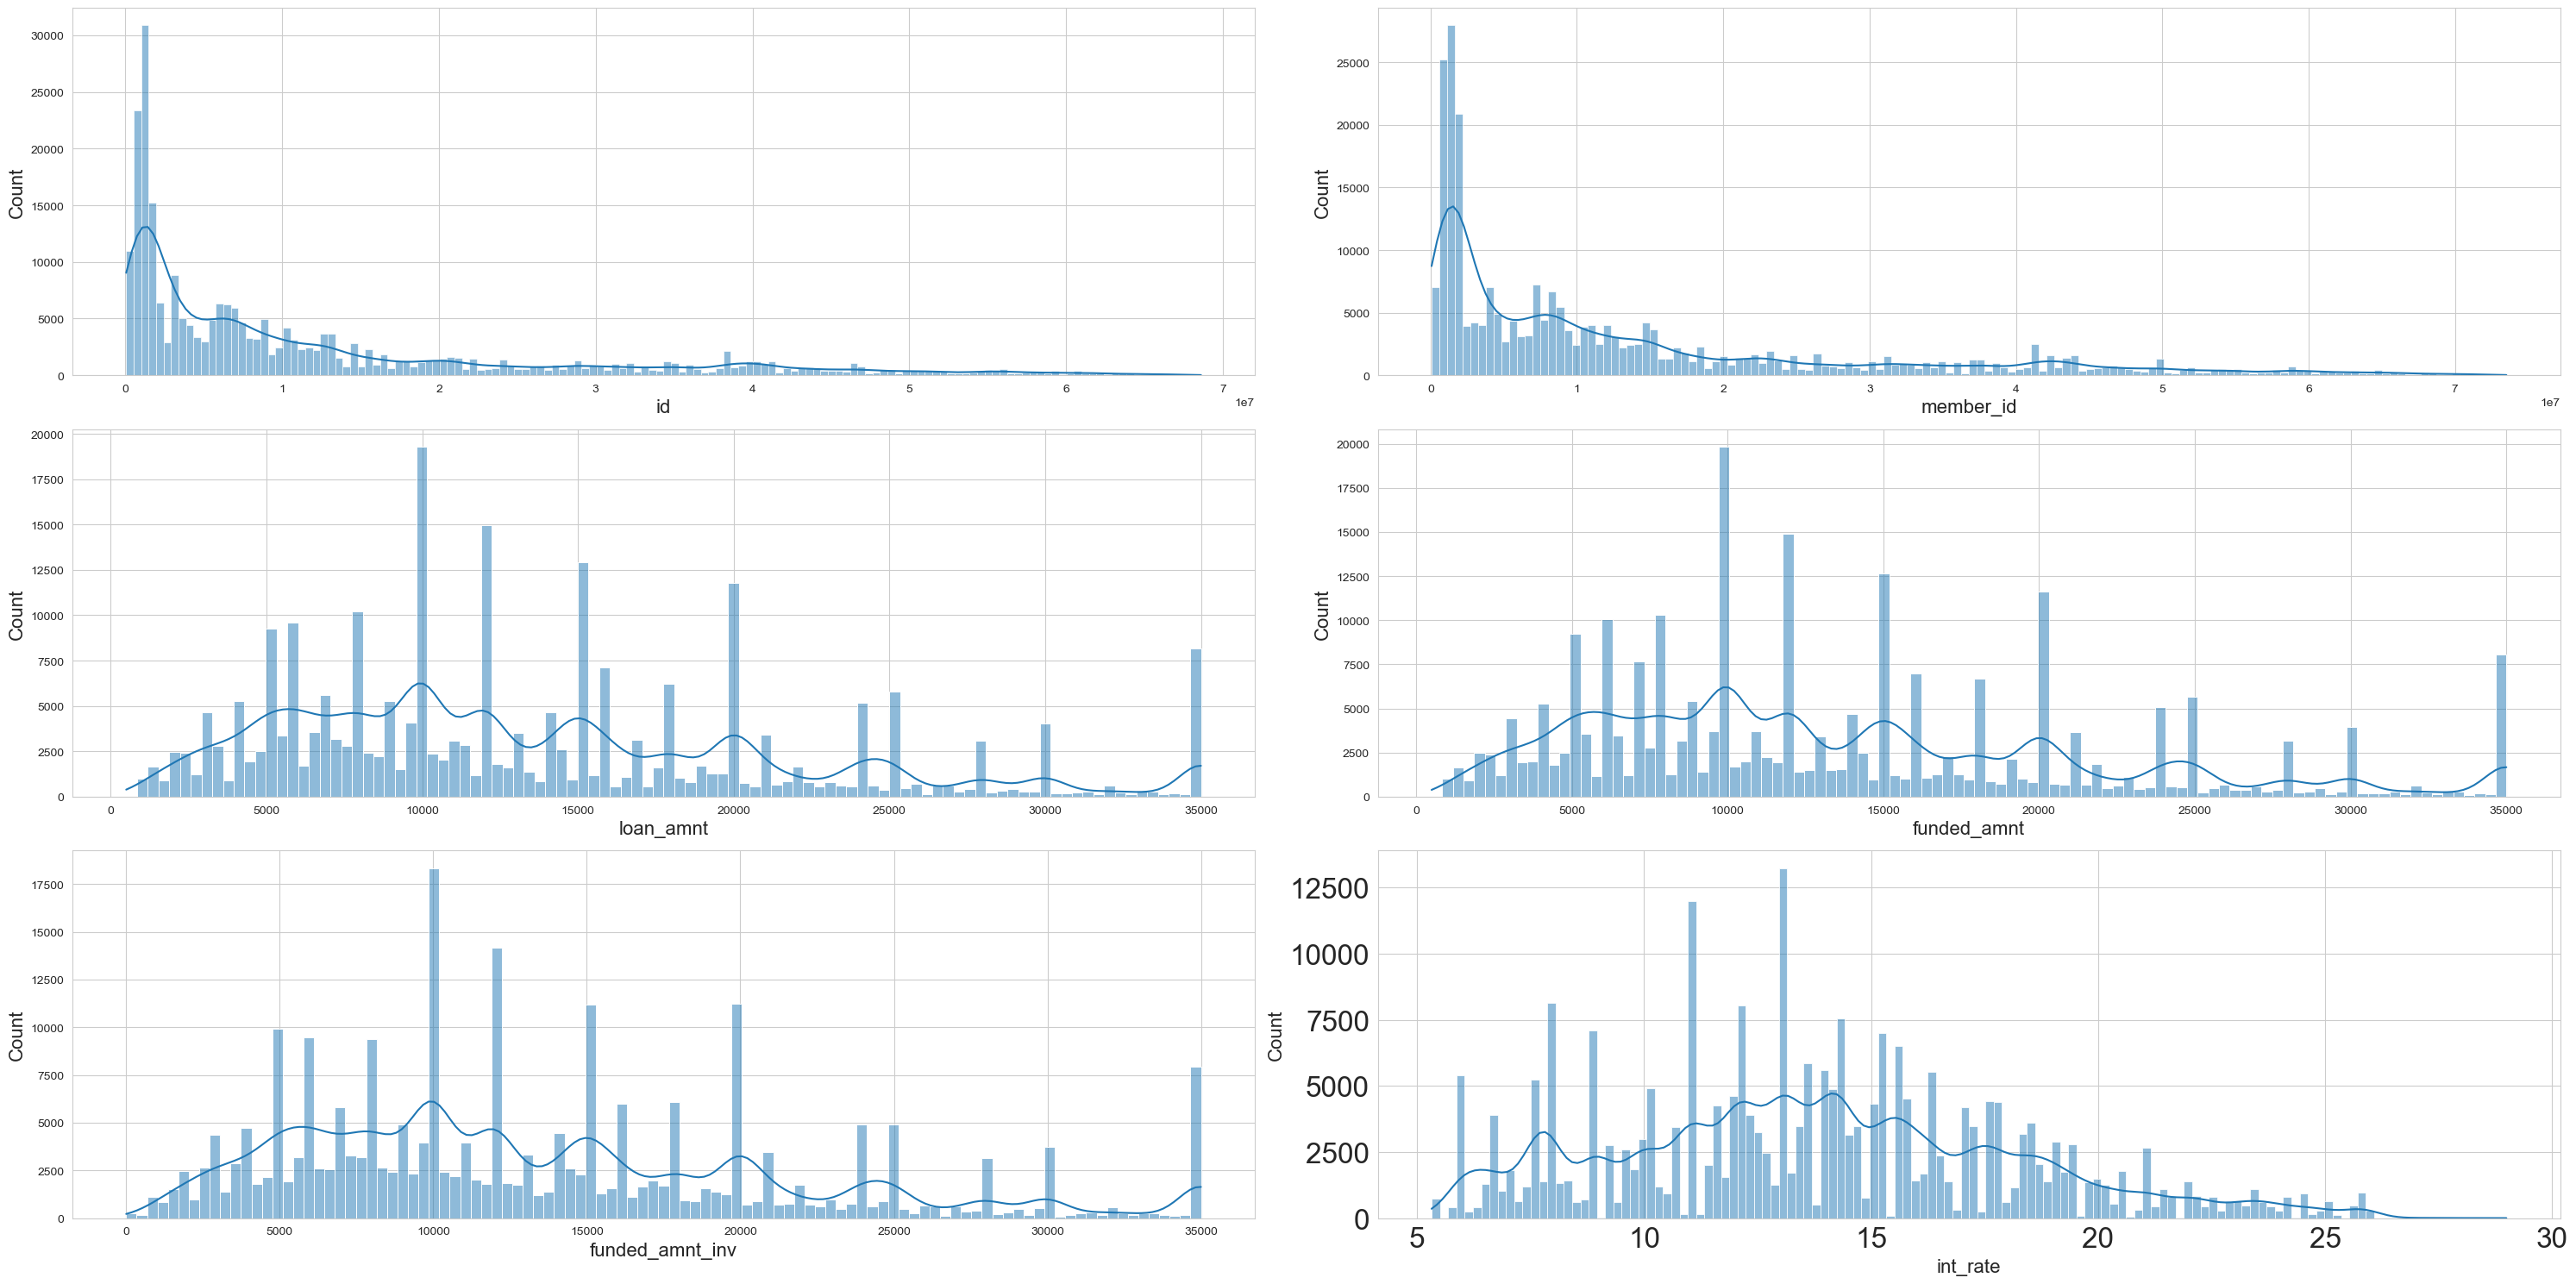

In [79]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[:6]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

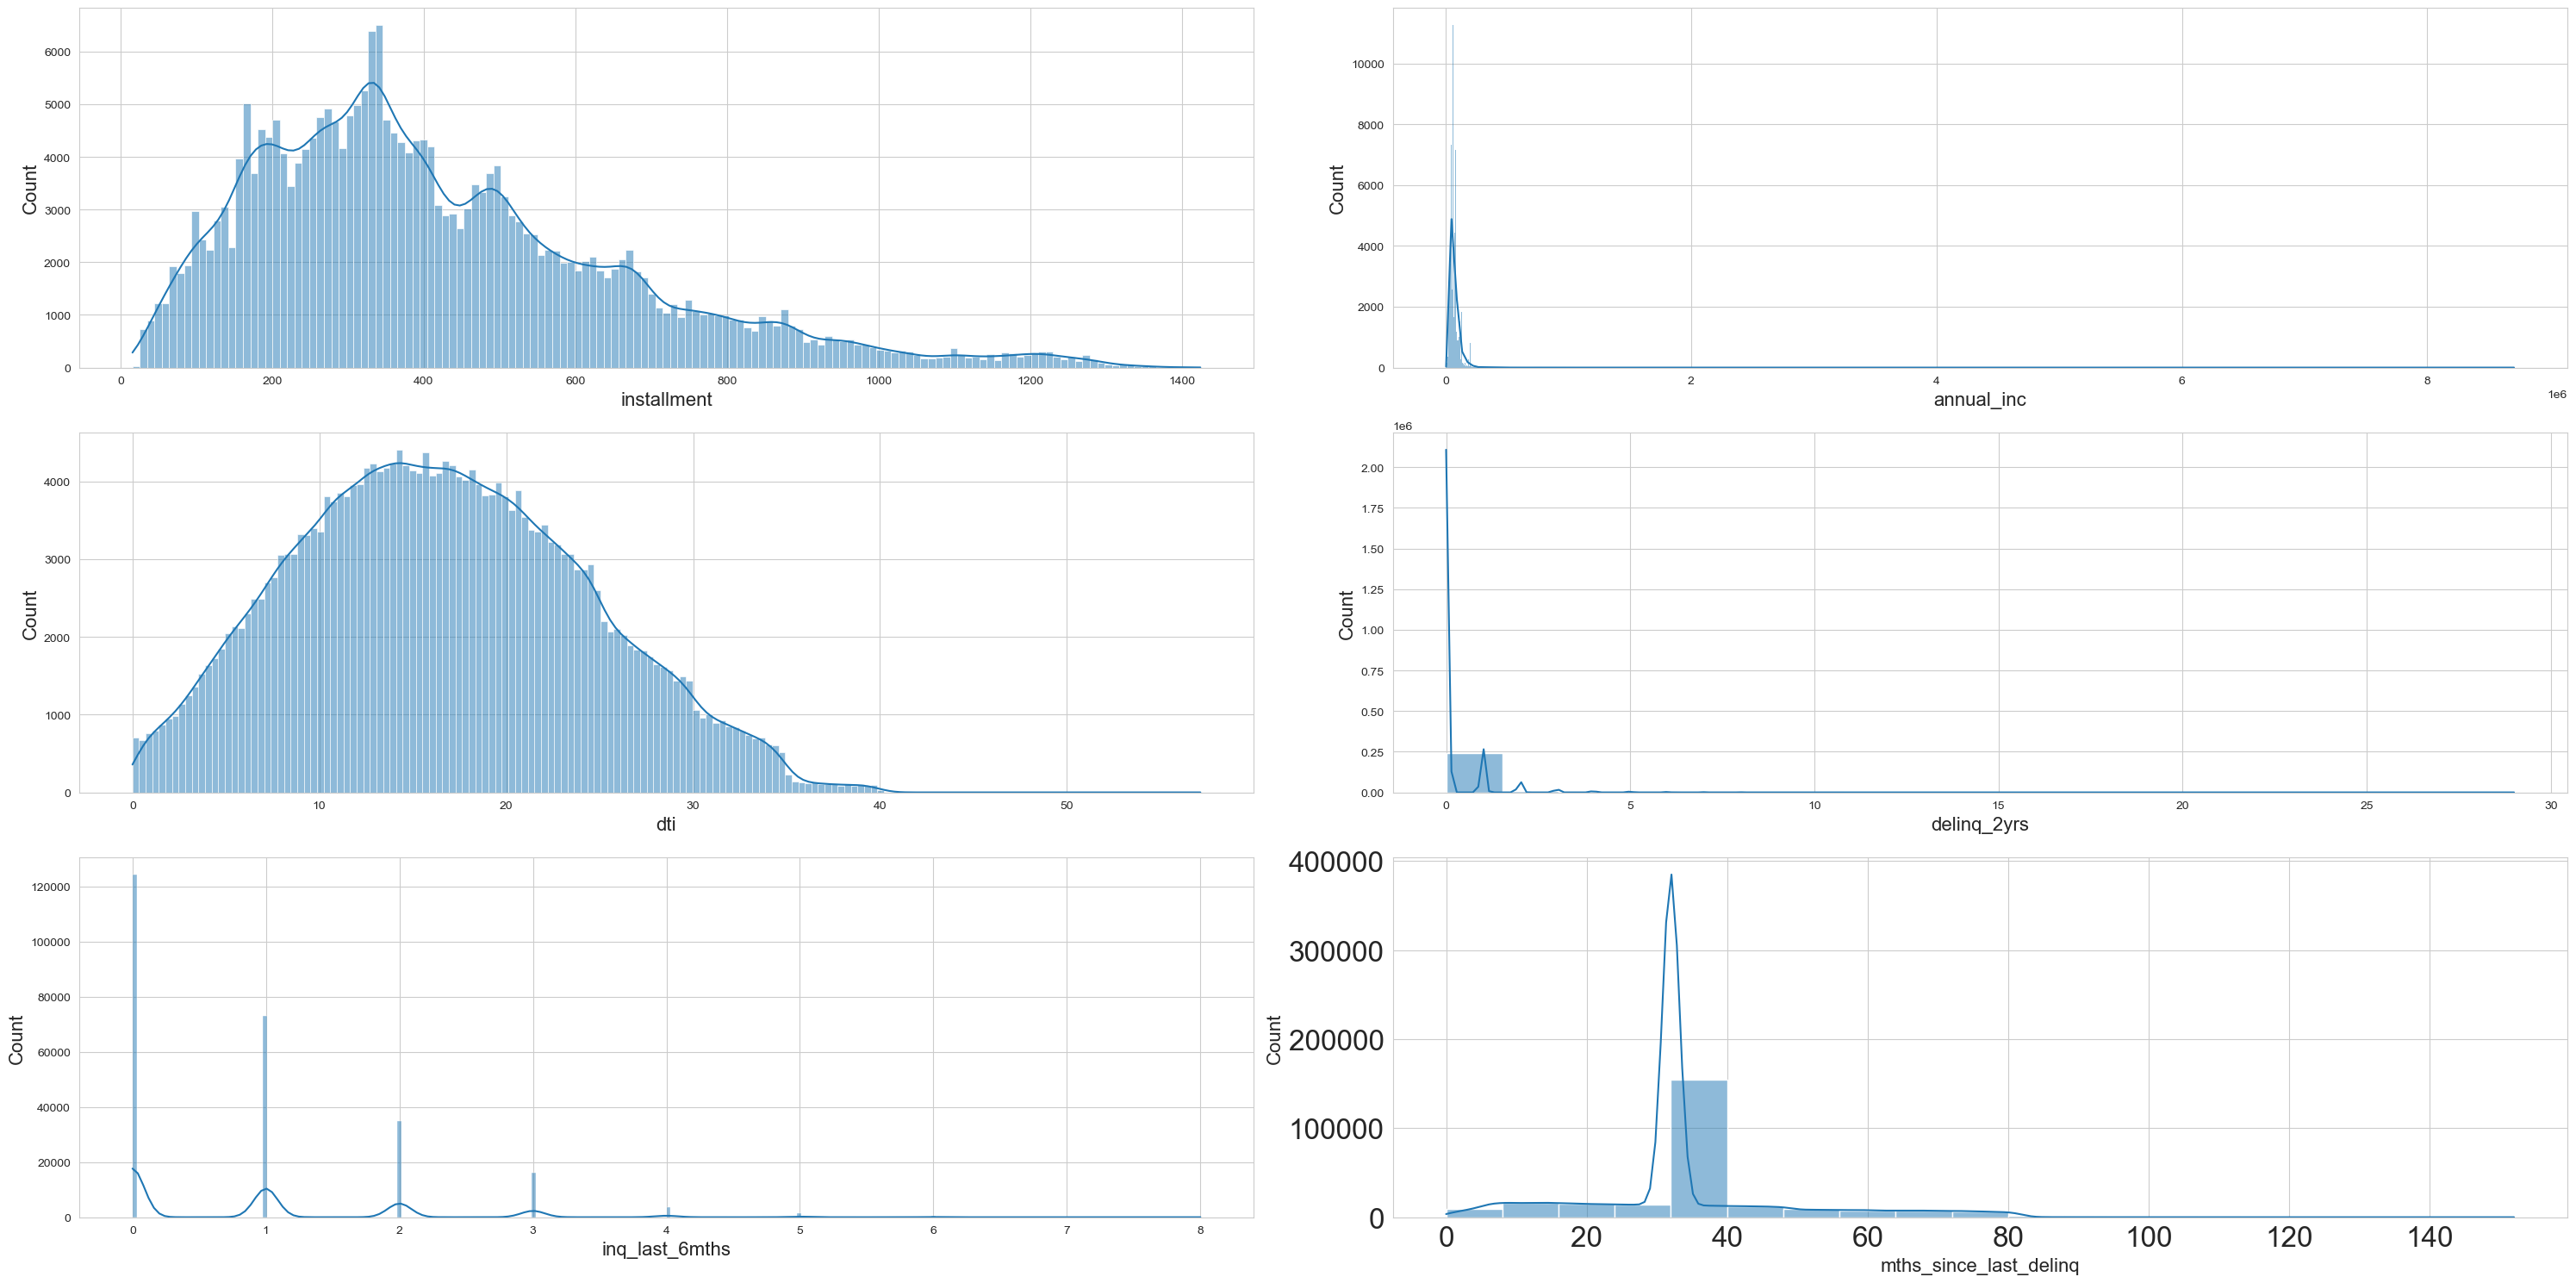

In [80]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[6:12]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

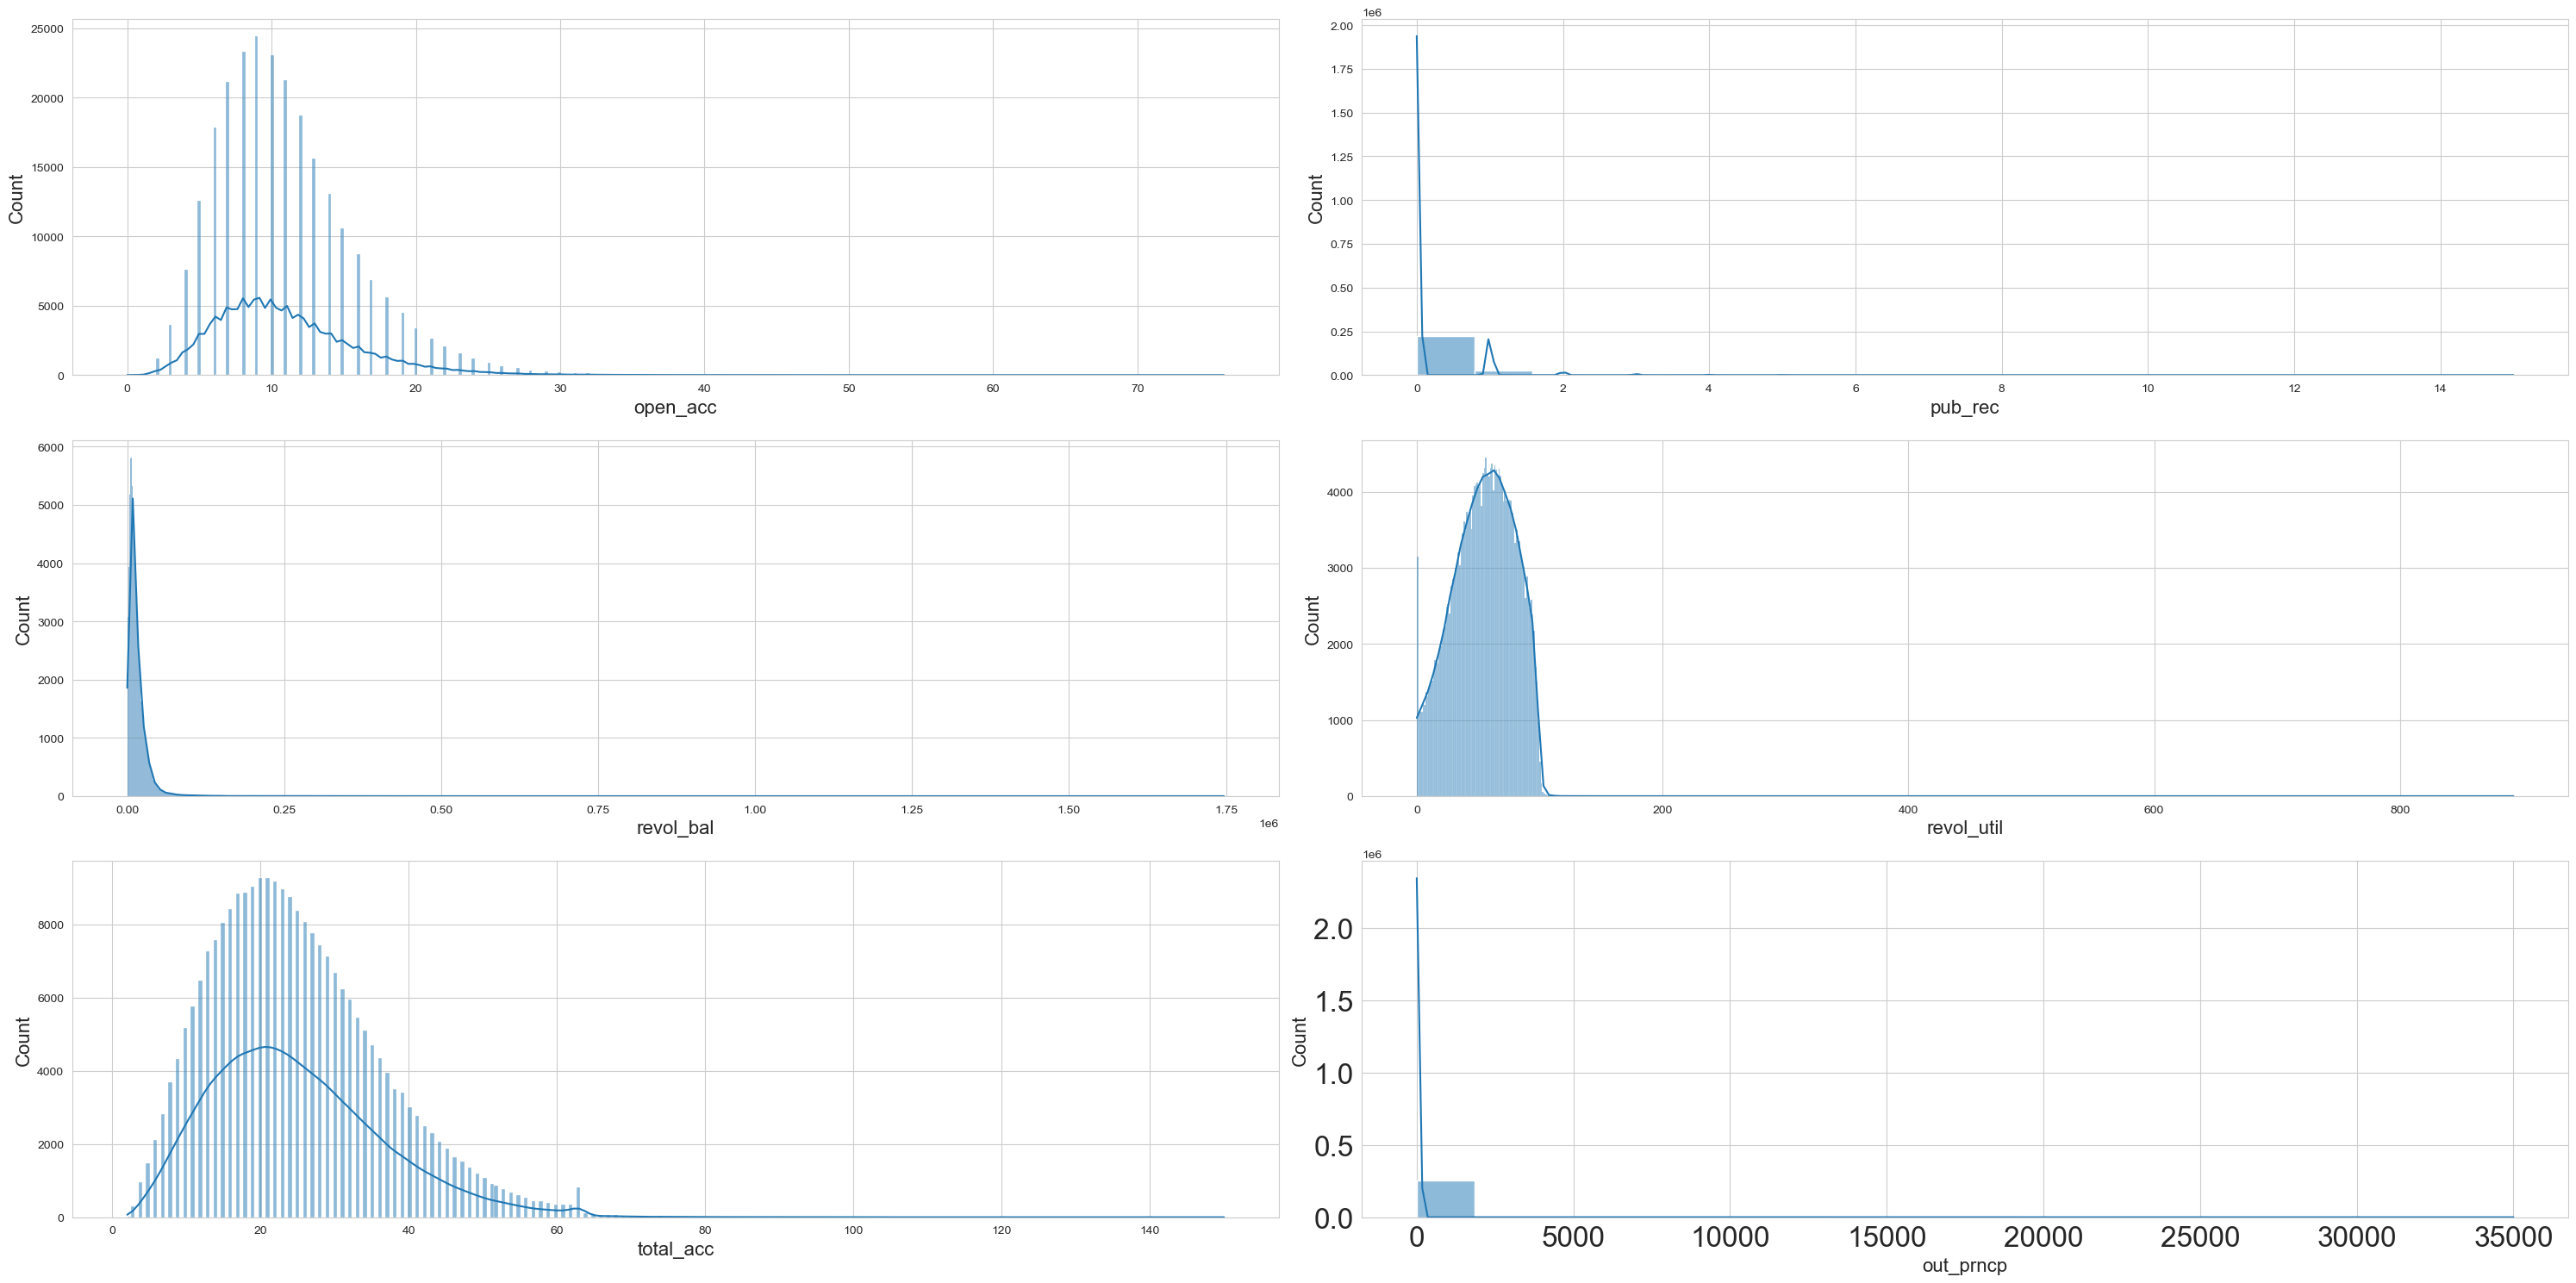

In [81]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[12:18]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

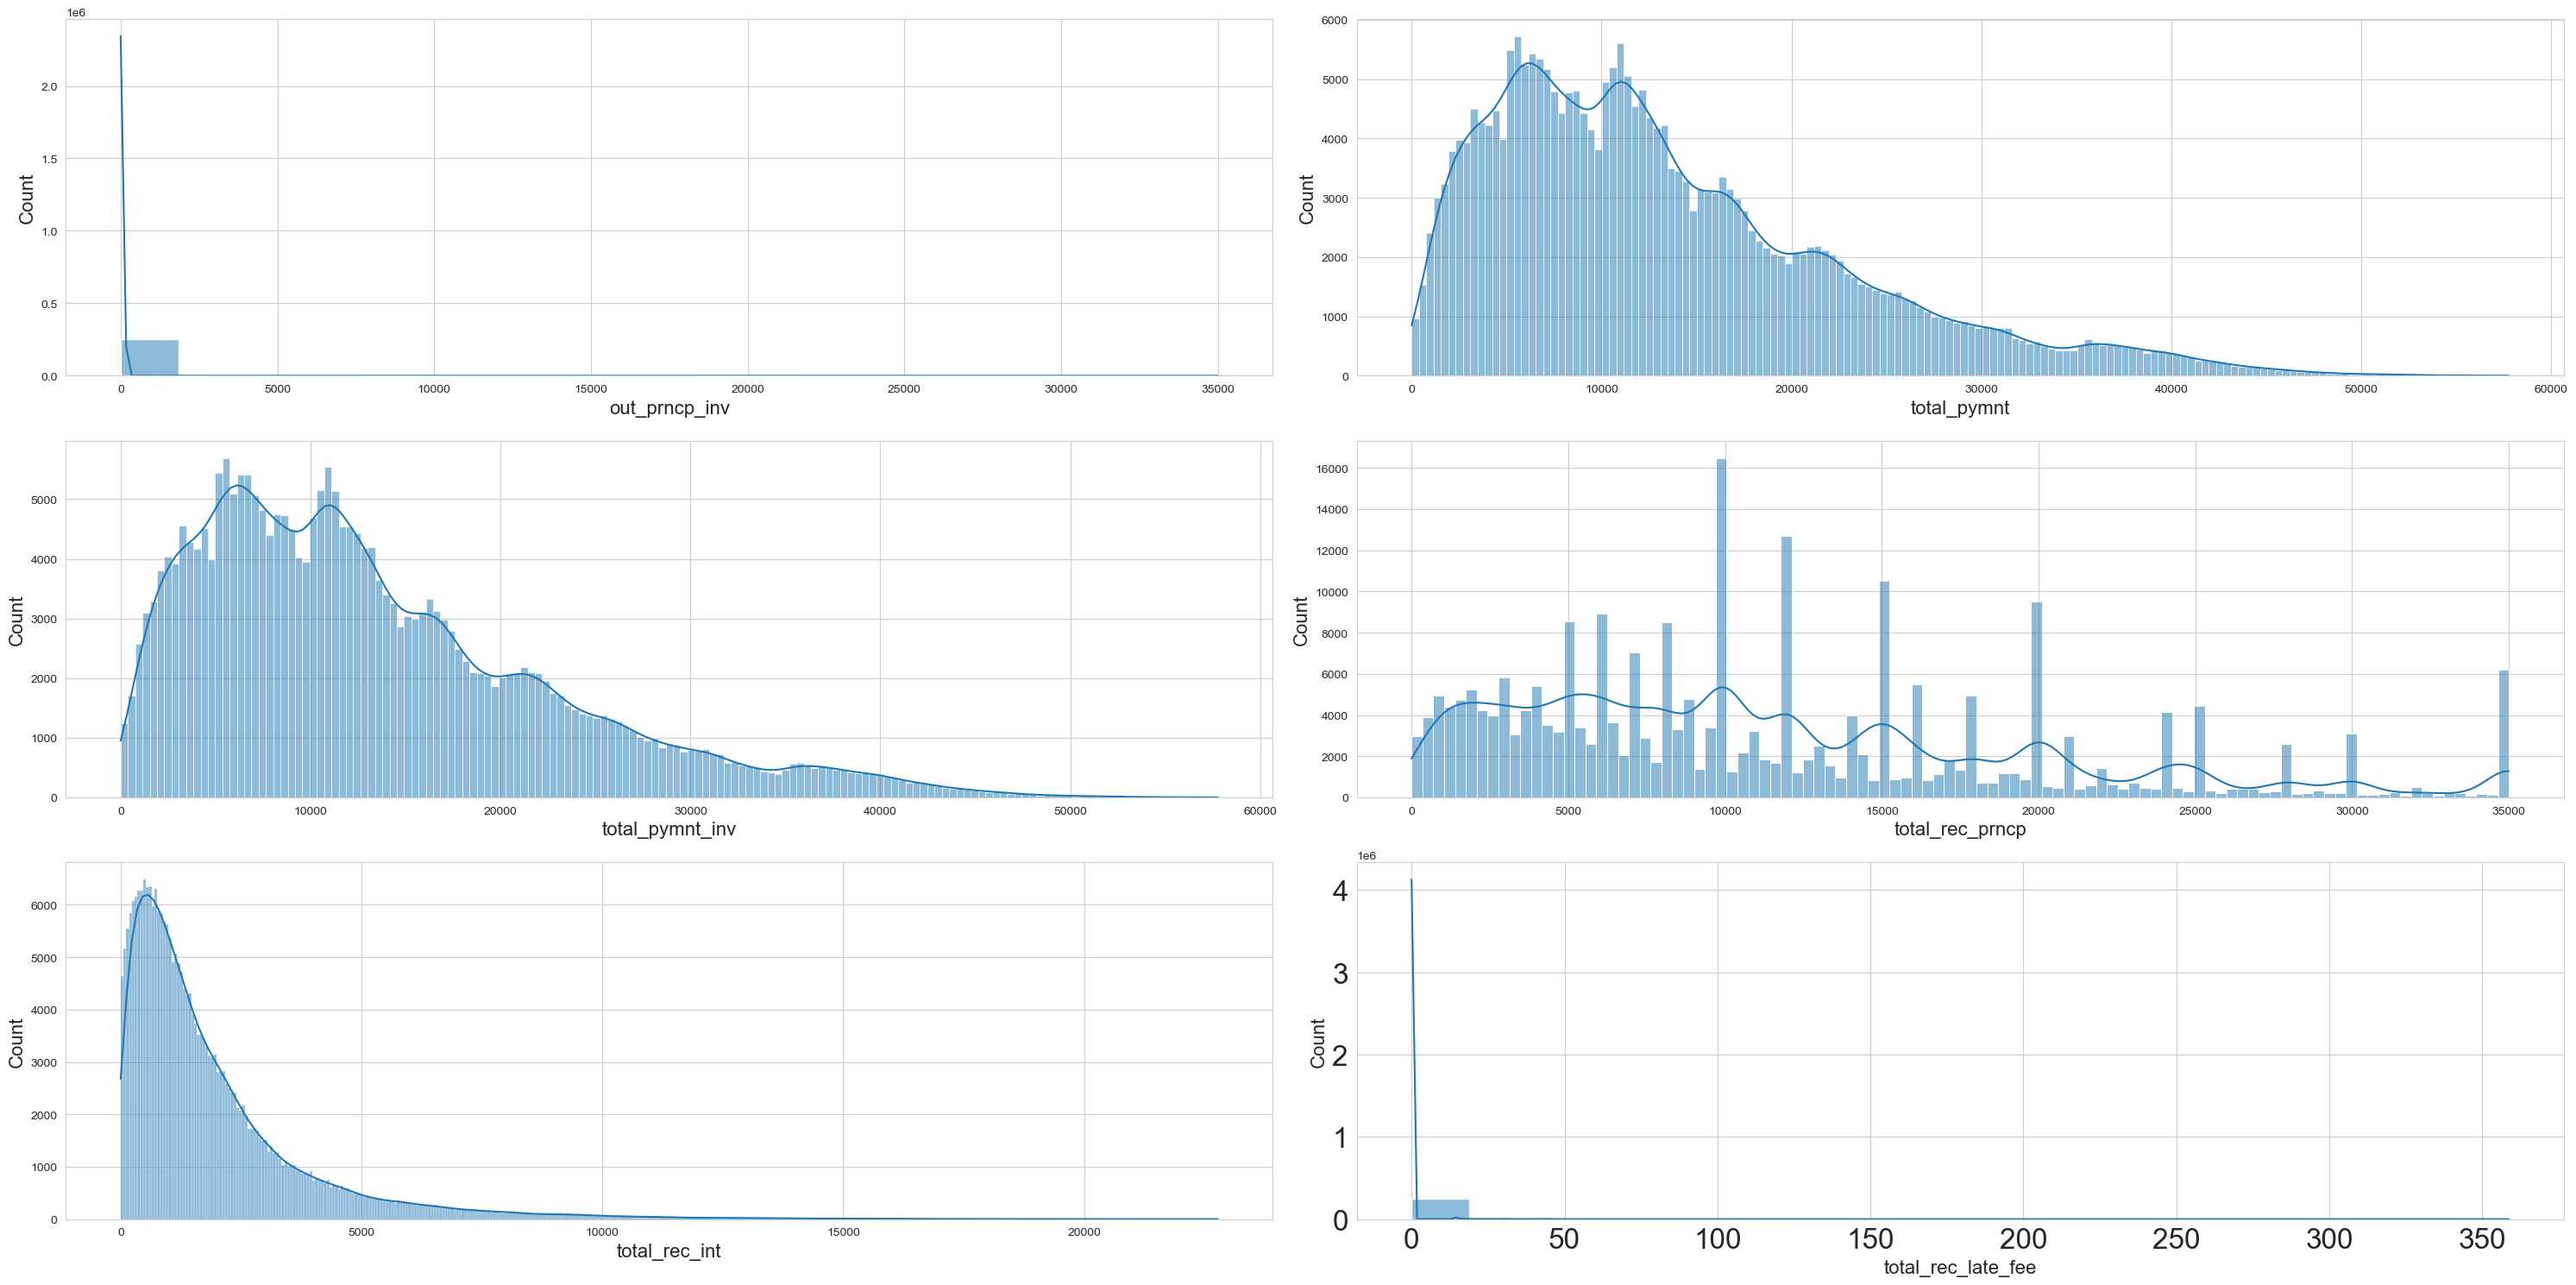

In [82]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[18:24]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

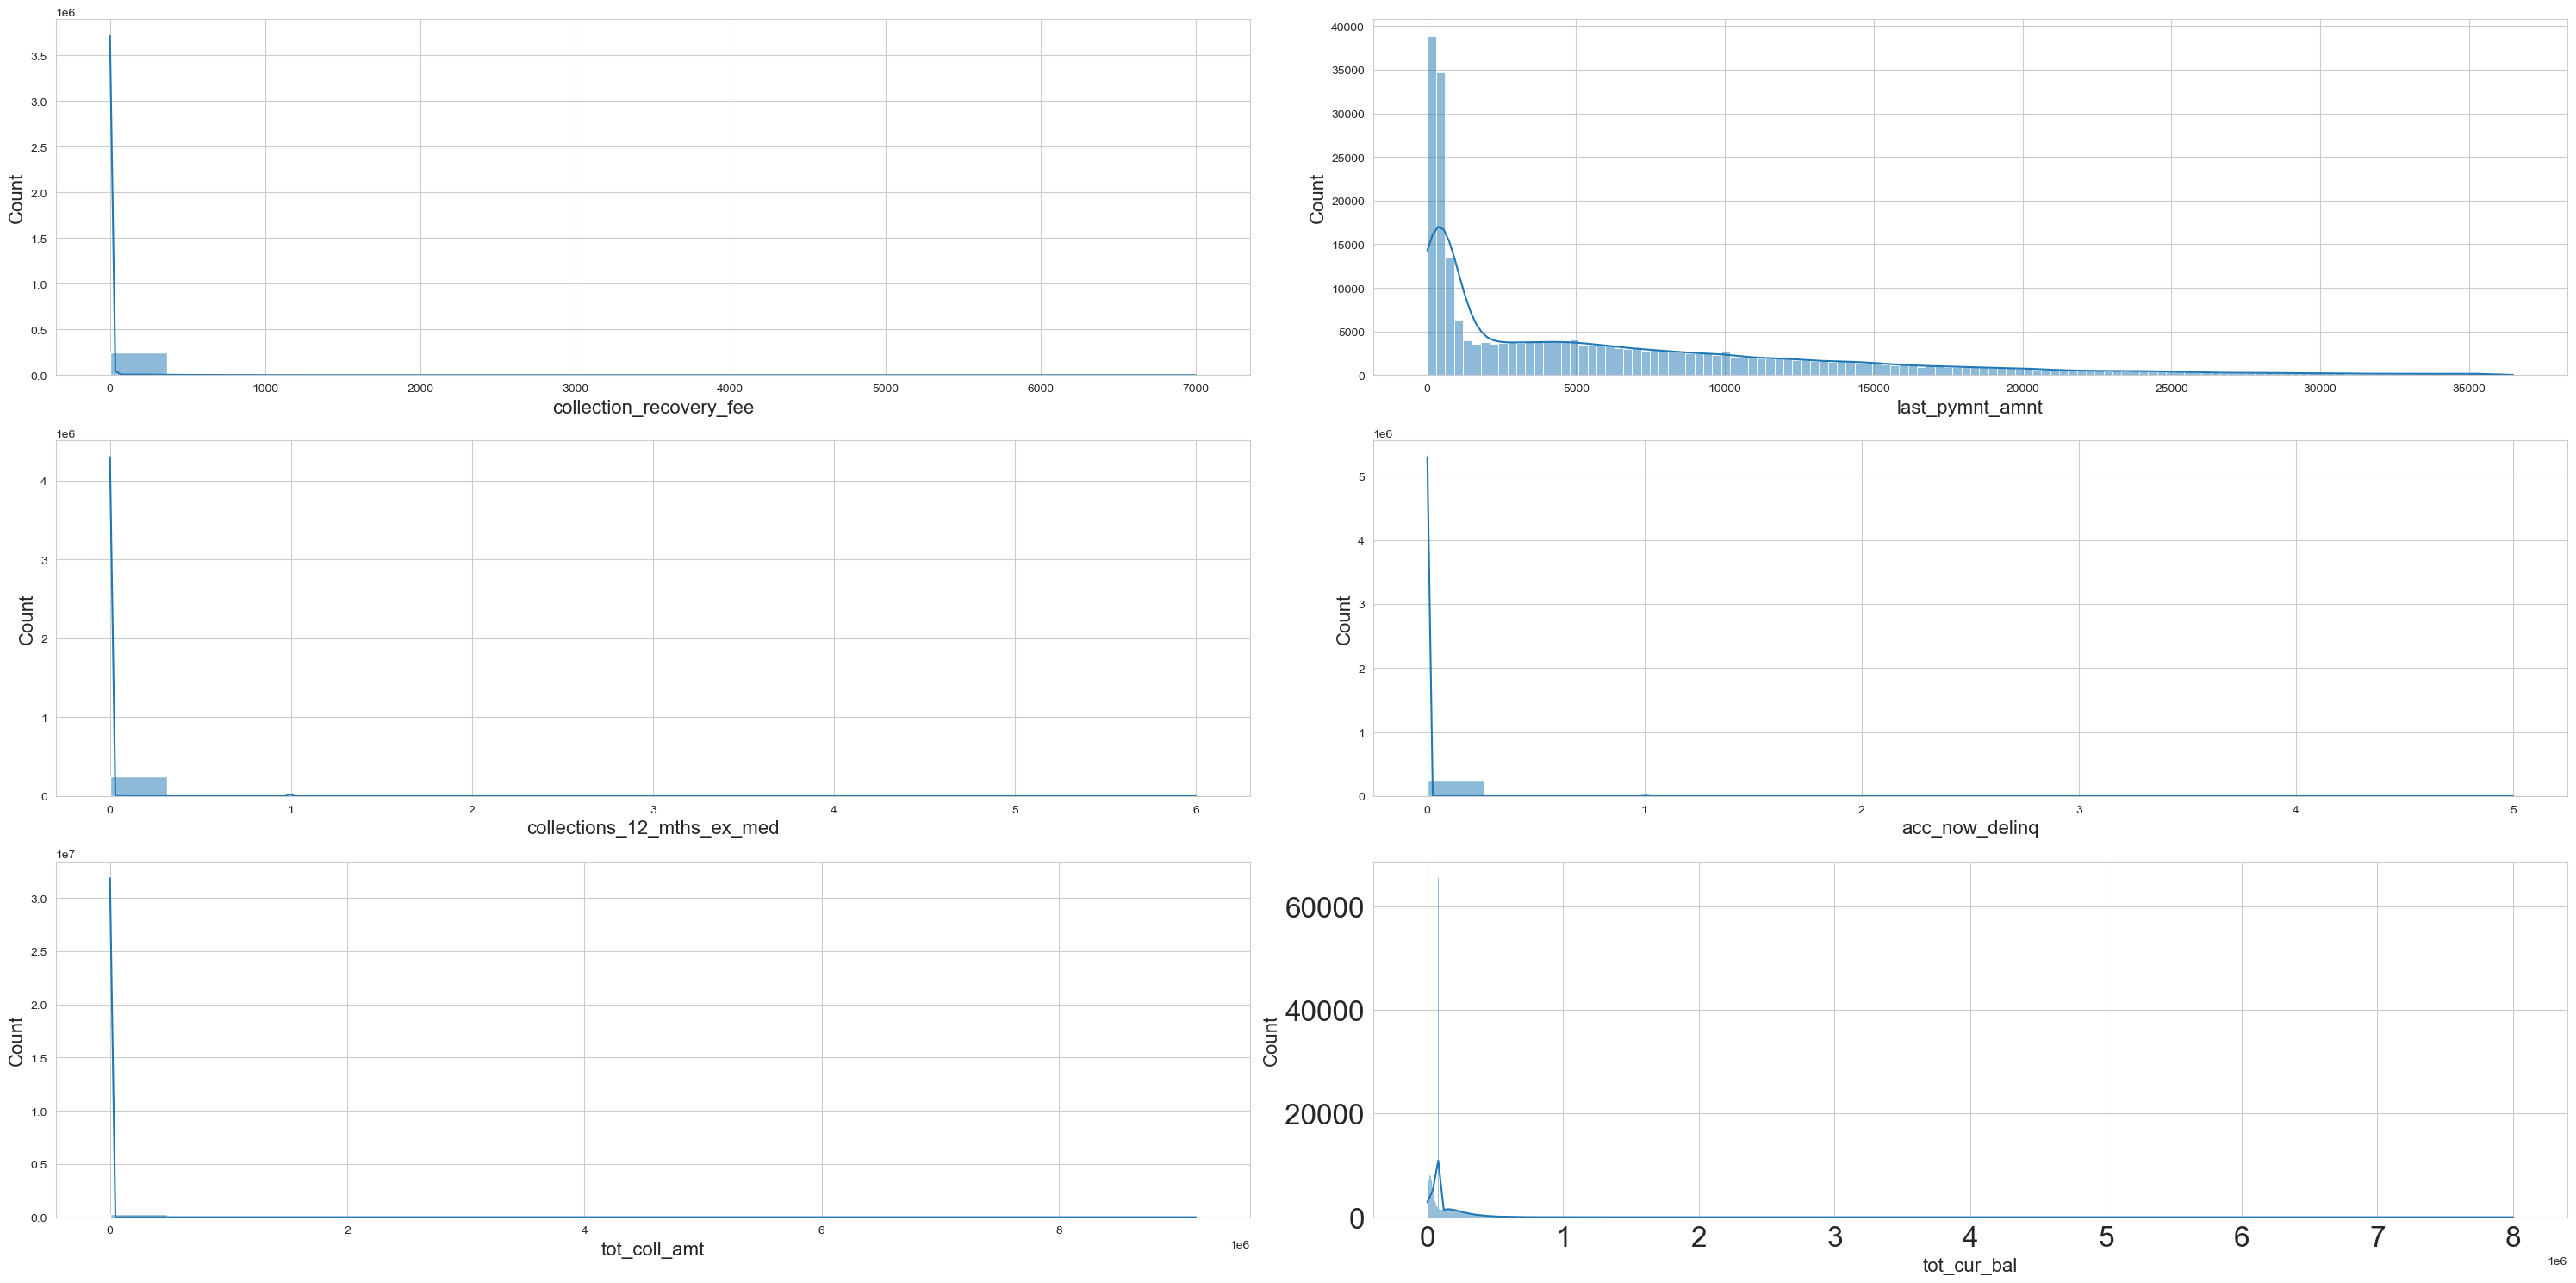

In [119]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[24:30]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm

In [88]:
!pip install statsmodels

  Using cached statsmodels-0.14.1-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
Using cached statsmodels-0.14.1-cp311-cp311-win_amd64.whl (9.9 MB)
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/233.9 kB ? eta -:--:--
   ------------------------ --------------- 143.4/233.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 233.9/233.9 kB 2.4 MB/s eta 0:00:00


In [90]:
df1.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075269    1311441       5000         5000           5000.0   36 months   

   int_rate  installment grade sub_grade             emp_title emp_length  \
0     10.65       162.87     B        B2                   NaN  10+ years   
1     15.27        59.83     C        C4                 Ryder   < 1 year   
2     15.96        84.33     C        C5                   NaN  10+ years   
3     13.49       339.31     C        C1   AIR RESOURCES BOARD  10+ years   
4      7.90       156.46     A        A4  Veolia Transportaton    3 years   

  home_ownership  annual_inc verification_status    issue_d loan_status  \
0           RENT     24000.0            Verified 2011-12-01  Fully Paid   
1           RENT     30000.0     Source Verified 2011-12-01     Default   
2           RENT     12252.0        Not Verified 2011-12-01  Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01  Fully Paid   
4           RENT     36000.0     Source Verified 2011-12-01  Fully Paid   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                    url  \
0  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075269   

          purpose                                  title zip_code addr_state  \
0     credit_card                               Computer    860xx         AZ   
1             car                                   bike    309xx         GA   
2  small_business                   real estate business    606xx         IL   
3           other                               personel    917xx         CA   
4         wedding  My wedding loan I promise to pay back    852xx         AZ   

     dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0  27.65          0.0       1985-01-01             1.0   
1   1.00          0.0       1999-04-01             5.0   
2   8.72          0.0       2001-11-01             2.0   
3  20.00          0.0       1996-02-01             1.0   
4  11.20          0.0       2004-11-01             3.0   

   mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
0                    32.0       3.0      0.0      13648        83.7   
1                    32.0       3.0      0.0       1687         9.4   
2                    32.0       2.0      0.0       2956        98.5   
3                    35.0      10.0      0.0       5598        21.0   
4                    32.0       9.0      0.0       7963        28.3   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       12.0                   f        0.0            0.0   5631.377753   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                0.00   
1          1008.71           456.46         435.17                0.00   
2          3003.65          2400.00         603.65                0.00   
3         12226.30         10000.00        2209.33               16

In [120]:
X = df.drop('loan_status',axis = 1)
y = df['loan_status']

In [121]:
X = sm.add_constant(X)

# Create the model
logit_model = sm.Logit(y, X)

# Fit the model
result = logit_model.fit()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
res

# Feature Engineering

In [ ]:
new = df1.copy()

## term

In [ ]:
df1['term'].unique()

In [82]:
df1['term'] = df1['term'].apply(lambda x: x.strip())

## emp_length

In [ ]:
df1['emp_length'].unique()   #add 10+ years , as 10 plus add years and same for others

In [83]:
df1['emp_length'] = df1['emp_length'].str.replace('years','')

In [84]:
df1['emp_length'] = df1['emp_length'].str.replace('year','')

In [85]:
df1['emp_length'] = df1['emp_length'].str.strip()

In [86]:
df1['emp_length'].unique()

array(['10+', '< 1', '3', '9', '4', '5', '1', '6', '2', '7', '8'],
      dtype=object)

##  addr_state

In [87]:
df1['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL', 'NY',
       'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA', 'WA',
       'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC', 'SD',
       'NC', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'NH', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', 'ND'], dtype=object)

### Importing files containg zone and the states in abbreviation from

In [88]:
zo = pd.read_csv('zones.csv',)
zo.columns = [x.lower().strip() for x in zo.columns]
zo.head()

postal abbreviation region
0                  AL  South
1                  AK   West
2                  AZ   West
3                  AR  South
4                  CA   West

In [89]:
# creating a dictionary with zone as key, and the states falling into that zone as their values,
#since a zone can have multiple states in them, values are getting stored as a list.
zo_states_dict = {}

for index, row in zo.iterrows():
    zo_name = row['region']
    states = [row['postal abbreviation']]  # list with the state name
    
    if zo_name in zo_states_dict:
        zo_states_dict[zo_name].extend(states)
    else:
        zo_states_dict[zo_name] = states

In [90]:
#creating a new column ,'region' using reverse dictionary and mapping it to the addr_state column present in our dataset

state_to_region = {state: region for region, states in zo_states_dict.items() for state in states}

df1['region'] = df1['addr_state'].map(state_to_region)

In [91]:
df1['region'].value_counts()

South        76943
West         75216
Northeast    59615
Midwest      42416
Name: region, dtype: int64

In [ ]:
df1.sample(2)

##  zip_code

In [92]:
df1['zip_code'].value_counts().head(3)

945xx    3303
112xx    2852
750xx    2780
Name: zip_code, dtype: int64

In [93]:
df1['zip_code'] = df1['zip_code'].str.replace('x','')

In [94]:
df1['zip_code'].unique()[:10]

array(['860', '309', '606', '917', '852', '900', '958', '774', '853',
       '913'], dtype=object)

In [95]:
#defining the code to categorise zip_codes into subzones,

def map_to_sub_zone(row):
    region_name = None
    for region, states in zo_states_dict.items():
        if row['addr_state'] in states:
            region_name = region
            break
    
    if region_name:
        zone_range = 250  
        sub_zone = (int(row['zip_code']) // zone_range) + 1  #creating 4 sub zones for each value predsnt in region.
        return f"{region_name} - Sub-Zone {sub_zone}"
    
    return None

df1['sub-regions'] = df1.apply(map_to_sub_zone, axis=1)

In [ ]:
df1.head(2)

In [96]:
df1.loc[df1[df1['sub-regions'].eq('West - Sub-Zone 4')].index,
           ['zip_code','addr_state','region','sub-regions']].sample(5)

zip_code addr_state region        sub-regions
id                                                    
56492622      891         NV   West  West - Sub-Zone 4
193586        981         WA   West  West - Sub-Zone 4
10136368      902         CA   West  West - Sub-Zone 4
1038931       908         CA   West  West - Sub-Zone 4
9838423       983         WA   West  West - Sub-Zone 4

##  emp_title and addr_state 

In [ ]:
df1.shape

In [122]:
df['emp_title'].nunique()

133189

In [123]:
df['emp_title'].unique()

array(['Manager', 'Ryder', 'AIR RESOURCES BOARD', ...,
       'Asst. General Superintendent ', 'Gunnery Sgt Instructor',
       'Coordinator of RSVP'], dtype=object)

In [124]:
df['emp_title'].value_counts().sort_values(ascending = False).head(20)

emp_title
Manager             15969
Teacher              1927
Supervisor            863
Registered Nurse      848
RN                    844
Sales                 685
Project Manager       670
manager               590
Office Manager        571
Driver                543
Director              508
Engineer              471
Owner                 468
US Army               458
General Manager       450
teacher               396
driver                384
Vice President        380
Accountant            358
Bank of America       347
Name: count, dtype: int64

In [126]:
df1['emp_title'].replace(np.nan, 'null', inplace = True)

In [127]:
df1[df1['emp_title'].str.contains(r'[^\w\s]', regex=True)]['emp_title'].sample(5)


id
2935336                         Wal-Mart Stores
501547                          Town of E. Htfd
1637393    Medical Anesthesia & Pain Management
8575717                               Rec cord.
682316            caci, us goverment contractor
Name: emp_title, dtype: object

In [128]:
# checking for special characters
for i in df1['emp_title']:
    for j in i:
        if j in ['#','*','?']:
            print(i)

Wrenshall Public School District #100
Laborers Union Local #121
Allied Waste Services #922
E*Trade
Johnson County Fire District # 2
Sweetwater School District #1
North Greene Unit District #3
McCord Rural Water District #3
The Catfish Hole #3
laborers local  #91
Greenburgh Central School District #7
North Branch Fire District #1
local union #3 IBEW
Johnson County School District #1
1800-got-junk?
E*Trade Financial
Woodridge School District #68
E*TRADE Financial
Laramie County Schools #1
Adams County School District #50
IBEW Local #3
Nogales Unified School District #1
Lockwood School District #26
Safeway Store #1160
Snohomish County Fire District #5
Local Union #3  Welsbac Electric
nhaj l.c. dba bestop # 4
ibew local union #3
Page Unified School Dist. #8
ISD #11
Laramie County School District #1
E*Trade Financial
The Cirignano Limited Partnership #2
IBEW #6 EISB
SIGN*A*RAMA
SIGN*A*RAMA
Walmart Supercenter #3391
Elmhurst Community School Dist. #205
El Paso School District #11
Bay Area A?

1) we can see that in emp_title column a lot of special characters are present in rows, we need to treat them first

In [130]:
!pip install inflect

     ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/85.1 kB ? eta -:--:--
     ---------------------------------------- 85.1/85.1 kB 1.2 MB/s eta 0:00:00
  Using cached annotated_types-0.6.0-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/394.9 kB ? eta -:--:--
   --------------------------------------- 394.9/394.9 kB 12.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.9 MB 53.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.9 MB 13.9 MB/s eta 0:00:01
   ----------------------------- ---------- 1.4/1.9 MB 10.9 MB/s eta 0:00:01
   ------------------------------------ --- 1.7/1.9 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------  1.9/1.9 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 8.0 MB/s eta 0:00:00
Using cached annotated_ty

In [131]:
import inflect
import re

def clean_title(title):
    p = inflect.engine()
    title = title.lower()
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    title = re.sub(r'\bstore\b', 'store manager', title)
    title = re.sub(r'\b1st\b', 'first', title)
    title = re.sub(r'\b2nd\b', 'second', title)
    title = re.sub(r'\b3rd\b', 'third', title)
    
    # Replace specific numeric patterns with their word representations
    num_patterns = {
        r'\b4\b': 'four',
        r'\b5\b': 'five',
        r'\b6\b': 'six',
        r'\b7\b': 'seven',
        r'\b8\b': 'eight',
        r'\b9\b': 'nine',
    }
    for pattern, word in num_patterns.items():
        title = re.sub(pattern, word, title)
    
    # Replace other numbers with their words using inflect library
    title = re.sub(r'\d+', lambda x: p.number_to_words(x.group()), title)
    
    # Handle specific cases
    title = re.sub(r'(\b[A-Z]+\b)', lambda x: x.group().replace(' ', ''), title)
    
    # Handle cases where numbers are connected to words with no spaces
    title = re.sub(r'(\b[A-Za-z]+)(\d+)', r'\1 \2', title)
    
    return title.strip()

In [135]:
df['emp_clean_title'] = df1['emp_title'].apply(clean_title)

In [136]:
df['emp_clean_title'] = df1['emp_clean_title'].apply(lambda x:x.lower())

In [137]:
df['emp_clean_title'].nunique()


114925

# we can see clearly that number of unique values in emp_title column gets down drastically upon treating the values, let's explore more

In [138]:
df1['emp_clean_title'].replace('rn','registered nurse',inplace = True)

In [139]:
df1['emp_clean_title'].value_counts().head(10)

emp_clean_title
null                14010
manager              2720
teacher              2421
registered nurse     2202
supervisor           1304
sales                1056
driver                988
us army               835
project manager       819
office manager        793
Name: count, dtype: int64

In [140]:
# Function to categorize the titles
def categorize_title(title):
    title = title.lower()
    if 'school' in title:
        return 'Education'
    elif 'bank' in title:
        return 'Banking'
    elif 'services' in title:
        return 'Services'
    elif 'manager' in title:
        return 'managers'
    elif 'analyst' in title:
        return 'analyst'
    elif 'engineer' in title:
        return 'engineers'
    elif 'executive' in title:
        return 'executives'
    elif 'inc' in title:
        return 'inc companies'
    elif 'driver' in title:
        return 'drivers'
    elif 'service' in title:
        return 'Services'
    elif 'accounting' in title:
        return 'accounting companies'
    elif 'transportaion' in title:
        return 'transport companies'
    elif 'restaurant' in title:
        return 'restaurants'
    elif 'assistant' in title:
        return 'assistants'
    elif 'medical' in title:
        return 'health industry'
    elif 'pharmaceuticals' in title:
        return 'health industry'
    elif 'teacher' in title:
        return 'teachers'
    elif 'supervisor' in title:
        return 'supervisors'
    elif 'specialist' in title:
        return 'specialist'
    elif 'coordinator' in title:
        return 'coordinator'
    elif 'company' in title:
        return 'companies'
    elif 'Education' in title:
        return 'Education'
    elif 'broker' in title:
        return 'broker'
    elif 'university' in title:
        return 'education'
    elif 'hospital' in title:
        return 'health industry'
    elif 'officer' in title:
        return 'officers'
    elif 'army' in title:
        return 'us govt'
    elif 'government' in title:
        return 'us govt'
    
    else:
        return title

In [144]:
# Create a df1 column 'category' based on the words present in the title
df['category'] = df['emp_clean_title'].apply(lambda x: categorize_title(x.lower()))

In [145]:
df['category'].value_counts().lt(5).sum()

75354

In [146]:
df['category'].nunique()

78573

### checkpoint
az = new.copy()

In [147]:
threshold = 100

# Count the occurrences of each unique value in the column
value_counts = df['category'].value_counts()
less_than_threshold_values = value_counts[value_counts < threshold].index
df['category1'] = df['category'].where(~df['category'].isin(less_than_threshold_values), 'Others')

In [148]:
df['category1'].replace('null',np.nan,inplace=True)

In [149]:
df.fillna(df['category1'].mode()[0],inplace = True)

In [150]:
df['category1'].value_counts().head(5)

category1
Others             146833
managers            18240
inc companies       11079
Services             7366
health industry      5825
Name: count, dtype: int64

In [151]:
df['category1'].replace(['united states air force','usaf'],'us air force',inplace = True)

In [152]:
df['category1'].replace('jpmorgan chase','jp morgan chase',inplace = True)

In [153]:
df['category1'].replace('vp','vice president',inplace = True)

In [154]:
def cat1(title):
    title = title.lower()

    if title in ['others']:
        return title
    elif title in ['inc comanies', 'companies', 'services', 'ibm', 'jp morgan chase', 'walmart', 'walgreens', 'banking', 'education', 'accounting companies', 'wells fargo']:
        return 'corporates'
    elif title in ['managers', 'vice president', 'ceo', 'president', 'senior consultant', 'director', 'director of operations', 'financial advisor']:
        return 'Elite grade individuals'
    elif title in ['department of defense', 'department of homeland security', 'us navy', 'us air force', 'us govt']:
        return 'govt entities'
    else:
        return 'average grade individuals'

In [155]:
df['cat'] = df['category1'].apply(lambda x: cat1(x.lower()))

In [156]:
df['cat'].value_counts()

cat
others                       146833
average grade individuals     62537
corporates                    21703
Elite grade individuals       20281
govt entities                  2836
Name: count, dtype: int64

In [157]:
df.head(2)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
id                                                                       
1077501       5000         5000           4975.0   36 months     10.65   
1077430       2500         2500           2500.0   60 months     15.27   

         installment grade sub_grade emp_title emp_length home_ownership  \
id                                                                         
1077501       162.87     B        B2   Manager  10+ years           RENT   
1077430        59.83     C        C4     Ryder   < 1 year           RENT   

         annual_inc verification_status    issue_d  loan_status      purpose  \
id                                                                             
1077501     24000.0            Verified 2011-12-01            0  credit_card   
1077430     30000.0     Source Verified 2011-12-01            1          car   

        zip_code addr_state    dti  delinq_2yrs earliest_cr_line  \
id                                                                 
1077501    860xx         AZ  27.65            0       1985-01-01   
1077430    309xx         GA   1.00            0       1999-04-01   

         inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  revol_bal  \
id                                                                              
1077501               1                      32         3        0      13648   
1077430               5                      32         3        0       1687   

         revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
id                                                                             
1077501        83.7          9                   f        0.0            0.0   
1077430         9.4          4                   f        0.0            0.0   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
id                                                                      
1077501  5861.071414          5831.78          5000.00         861.07   
1077430  1008.710000          1008.71           456.46         435.17   

         total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
id                                                                              
1077501                 0.0        0.00                     0.00   2015-01-01   
1077430                 0.0      117.08                     1.11   2013-04-01   

         last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  \
id                                                                        
1077501           171.62         2016-01-01                           0   
1077430           119.66         2013-09-01                           0   

         acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  \
id                                                                     
1077501               0           0.0      80760.5           22300.0   
1077430               0           0.0      80760.5           22300.0   

        emp_clean_title category category1     cat  
id                                                  
1077501            null     null    Others  others  
1077430           ryder    ryder    Others  others

In [158]:
df.rename(columns = {'cat':'emp_title_fe'},inplace = True)

In [159]:
df.drop(['emp_title','emp_clean_title','category','category1'],
        axis = 1, inplace = True)

In [160]:
df.shape

(254190, 46)

In [161]:
df.head(2)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
id                                                                       
1077501       5000         5000           4975.0   36 months     10.65   
1077430       2500         2500           2500.0   60 months     15.27   

         installment grade sub_grade emp_length home_ownership  annual_inc  \
id                                                                           
1077501       162.87     B        B2  10+ years           RENT     24000.0   
1077430        59.83     C        C4   < 1 year           RENT     30000.0   

        verification_status    issue_d  loan_status      purpose zip_code  \
id                                                                          
1077501            Verified 2011-12-01            0  credit_card    860xx   
1077430     Source Verified 2011-12-01            1          car    309xx   

        addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
id                                                                        
1077501         AZ  27.65            0       1985-01-01               1   
1077430         GA   1.00            0       1999-04-01               5   

         mths_since_last_delinq  open_acc  pub_rec  revol_bal  revol_util  \
id                                                                          
1077501                      32         3        0      13648        83.7   
1077430                      32         3        0       1687         9.4   

         total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
id                                                                              
1077501          9                   f        0.0            0.0  5861.071414   
1077430          4                   f        0.0            0.0  1008.710000   

         total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
id                                                                             
1077501          5831.78          5000.00         861.07                 0.0   
1077430          1008.71           456.46         435.17                 0.0   

         recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
id                                                                           
1077501        0.00                     0.00   2015-01-01           171.62   
1077430      117.08                     1.11   2013-04-01           119.66   

        last_credit_pull_d  collections_12_mths_ex_med  acc_now_delinq  \
id                                                                       
1077501         2016-01-01                           0               0   
1077430         2013-09-01                           0               0   

         tot_coll_amt  tot_cur_bal  total_rev_hi_lim emp_title_fe  
id                                                                 
1077501           0.0      80760.5           22300.0       others  
1077430           0.0      80760.5           22300.0       others

In [162]:
from sklearn.preprocessing import StandardScaler,label_binarize

In [ ]:
from sklear.preprocessing.

In [163]:
X = df.drop('loan_status',axis = 1)
y = df['loan_status']

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Create a scaler and encoder instances
scaler = StandardScaler()
encoder = LabelEncoder()

# Assuming X is your input features DataFrame and y is your target variable Series
X_scaled = scaler.fit_transform(numeric)  # Scale the features
y_encoded = encoder.fit_transform(cat)  # Encode the target variable

# Now, X_scaled and y_encoded are ready for use in machine learning models


In [184]:
df.tail()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
id                                                                        
36743377       4200         4200           4200.0   36 months     15.99   
36231718      10775        10775          10775.0   36 months      6.03   
36241316       6225         6225           6225.0   36 months     16.49   
36421485       4000         4000           4000.0   36 months      8.67   
36260758      10850        10850          10850.0   36 months     19.24   

          installment grade sub_grade emp_length home_ownership  annual_inc  \
id                                                                            
36743377       147.64     D        D2  10+ years       MORTGAGE     48000.0   
36231718       327.95     A        A1   < 1 year           RENT     54000.0   
36241316       220.37     D        D3    2 years           RENT     27000.0   
36421485       126.59     B        B1  10+ years       MORTGAGE     50000.0   
36260758       399.04     E        E2  10+ years            OWN     32000.0   

         verification_status    issue_d  loan_status             purpose  \
id                                                                         
36743377            Verified 2015-01-01            1             medical   
36231718        Not Verified 2015-01-01            0  debt_consolidation   
36241316     Source Verified 2015-01-01            0  debt_consolidation   
36421485            Verified 2015-01-01            0                 car   
36260758            Verified 2015-01-01            1  debt_consolidation   

         zip_code addr_state    dti  delinq_2yrs earliest_cr_line  \
id                                                                  
36743377    810xx         CO  36.93            0       1990-08-01   
36231718    325xx         FL  13.22            1       1975-11-01   
36241316    330xx         FL  18.58            0       2011-02-01   
36421485    956xx         CA  12.63            0       2002-09-01   
36260758    430xx         OH  29.44            0       2002-06-01   

          inq_last_6mths  mths_since_last_delinq  open_acc  pub_rec  \
id                                                                    
36743377               0                      38        13        0   
36231718               0                      16         9        0   
36241316               1                      32         3        0   
36421485               0                      32        11        1   
36260758               1                      65         9        0   

          revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
id                                                                          
36743377      12943        63.4         45                   f        0.0   
36231718      10776        25.8         21                   w        0.0   
36241316       1756        97.6          4                   f        0.0   
36421485       1700         5.6         30                   f        0.0   
36260758       6987        41.6         20                   f        0.0   

          out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
id                                                                       
36743377            0.0      1026.02          1026.02           667.96   
36231718            0.0     11071.87         11071.87         10775.00   
36241316            0.0      7050.46          7050.46          6225.00   
36421485            0.0      4158.02          4158.02          4000.00   
36260758            0.0      2396.05          2396.05          1405.77   

          total_rec_int  total_rec_late_fee  recoveries  \
id                                                        
36743377         358.06                 0.0         0.0   
36231718         296.87                 0.0         0.0   
36241316         825.46                 0.0         0.0   
36421485         158.02                 0.0         0.0   
36

In [185]:
df.reset_index(inplace = True)

In [186]:
numeric = df.select_dtypes(include = ['float64','int64'])
cat = df.select_dtypes(include = ['object'])

In [187]:
new_cat = pd.get_dummies(cat,dtype = int)
new_cat

term_ 36 months  term_ 60 months  grade_A  grade_B  grade_C  grade_D  \
0                     1                0        0        1        0        0   
1                     0                1        0        0        1        0   
2                     1                0        0        0        1        0   
3                     1                0        0        0        1        0   
4                     1                0        1        0        0        0   
...                 ...              ...      ...      ...      ...      ...   
254185                1                0        0        0        0        1   
254186                1                0        1        0        0        0   
254187                1                0        0        0        0        1   
254188                1                0        0        1        0        0   
254189                1                0        0        0        0        0   

        grade_E  grade_F  grade_G  sub_grade_A1  sub_grade_A2  sub_grade_A3  \
0             0        0        0             0             0             0   
1             0        0        0             0             0             0   
2             0        0        0             0             0             0   
3             0        0        0             0             0             0   
4             0        0        0             0             0             0   
...         ...      ...      ...           ...           ...           ...   
254185        0        0        0             0             0             0   
254186        0        0        0             1             0             0   
254187        0        0        0             0             0             0   
254188        0        0        0             0             0             0   
254189        1        0        0             0             0             0   

        sub_grade_A4  sub_grade_A5  sub_grade_B1  sub_grade_B2  sub_grade_B3  \
0                  0             0             0             1             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  1             0             0             0             0   
...              ...           ...           ...           ...           ...   
254185             0             0             0             0             0   
254186             0             0             0             0             0   
254187             0             0             0             0             0   
254188             0             0             1             0             0   
254189             0             0             0             0             0   

        sub_grade_B4  sub_grade_B5  sub_grade_C1  sub_grade_C2  sub_grade_C3  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             1             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
254185             0             0             0             0             0   
254186             0             0             0             0             0   
254187             0             0             0             0             0   
254188             0             0             0             0             0   
254189             0             0             0             0             0   

        sub_grade_C4  sub_grade_C5  sub_grade_D1  sub_grade_D2  sub_grade_D3  \
0                  0             0             0             0             0   
1               

In [188]:
scaler = StandardScaler()
#encoder = LabelEncoder()

# Assuming X is your input features DataFrame and y is your target variable Series
X_scaled = scaler.fit_transform(numeric)  # Scale the features

In [189]:
num = pd.DataFrame(X_scaled,columns = numeric.columns)
num

id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
0      -0.761168  -1.053756    -1.051684        -1.040981 -0.709800   
1      -0.761172  -1.361132    -1.359907        -1.345429  0.339228   
2      -0.761190  -1.373427    -1.372236        -1.357730  0.495901   
3      -0.761211  -0.439005    -0.435237        -0.422859 -0.064943   
4      -0.761318  -1.053756    -1.051684        -1.037906 -1.334221   
...          ...        ...          ...              ...       ...   
254185  1.649140  -1.152117    -1.150315        -1.136313  0.502713   
254186  1.614562  -0.343719    -0.339688        -0.327527 -1.758827   
254187  1.615210  -0.903142    -0.900654        -0.887219  0.616244   
254188  1.627386  -1.176707    -1.174973        -1.160915 -1.159383   
254189  1.616524  -0.334497    -0.330441        -0.318301  1.240665   

        installment  annual_inc  loan_status       dti  delinq_2yrs  \
0         -1.042836   -0.825215    -0.472966  1.422752    -0.337469   
1         -1.463558   -0.723148     2.114316 -1.996380    -0.337469   
2         -1.363522   -1.025060    -0.472966 -1.005922    -0.337469   
3         -0.322414   -0.396536    -0.472966  0.441275    -0.337469   
4         -1.069009   -0.621082    -0.472966 -0.687744    -0.337469   
...             ...         ...          ...       ...          ...   
254185    -1.105022   -0.416949     2.114316  2.613355    -0.337469   
254186    -0.368798   -0.314883    -0.472966 -0.428583     1.009535   
254187    -0.808058   -0.774181    -0.472966  0.259093    -0.337469   
254188    -1.190971   -0.382927    -0.472966 -0.504278    -0.337469   
254189    -0.078531   -0.689126     2.114316  1.652405    -0.337469   

        inq_last_6mths  mths_since_last_delinq  open_acc   pub_rec  revol_bal  \
0             0.138219               -0.096263 -1.623513 -0.329106  -0.081202   
1             3.886744               -0.096263 -1.623513 -0.329106  -0.719234   
2             1.075351               -0.096263 -1.827877 -0.329106  -0.651542   
3             0.138219                0.109123 -0.192966 -0.329106  -0.510611   
4             2.012482               -0.096263 -0.397330 -0.329106  -0.384455   
...                ...                     ...       ...       ...        ...   
254185       -0.798912                0.314509  0.420126 -0.329106  -0.118808   
254186       -0.798912               -1.191653 -0.397330 -0.329106  -0.234402   
254187        0.138219               -0.096263 -1.623513 -0.329106  -0.715553   
254188       -0.798912               -0.096263  0.011398  1.959629  -0.718540   
254189        0.138219                2.162981 -0.397330 -0.329106  -0.436518   

        revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
0         1.185384  -1.364944  -0.058156      -0.058155    -0.813176   
1        -1.813571  -1.790497  -0.058156      -0.058155    -1.324837   
2         1.782753  -1.279834  -0.058156      -0.058155    -1.114479   
3        -1.345363   1.018154  -0.058156      -0.058155    -0.141989   
4        -1.050714  -1.109612  -0.058156      -0.058155    -0.837396   
...            ...        ...        ...            ...          ...   
254185    0.366019   1.699039  -0.058156      -0.058155    -1.323012   
254186   -1.151621  -0.343616  -0.058156      -0.058155    -0.263719   
254187    1.746427  -1.790497  -0.058156      -0.058155    -0.687760   
254188   -1.966950   0.422379  -0.058156      -0.058155    -0.992756   
254189   -0.513889  -0.428727  -0.058156      -0.058155    -1.178548   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0             -0.806014        -0.775105      -0.526091           -0.132323   
1             -1.314583        -1.319845      -0.732117           -0.132323   
2             -1.104227        -1.086828      -0.650616           -0.132323   
3             -0.131743        -0.175638       0.126119            2.985170   
4             -0.827145        -0.775105      -0.637201           -0.132323

In [191]:
new_df  = num.merge(new_cat,left_index = True,right_index = True)

In [192]:
new_df.shape

(254190, 1054)

In [193]:
X = new_df.drop('loan_status',axis = 1)
y = df['loan_status']

In [ ]:
X = sm.add_constant(X)

# Create the model
logit_model = sm.Logit(y, X)

# Fit the model
result = logit_model.fit()


###  purpose

In [126]:
df1['purpose'].value_counts()  #> 5000 add it to other

debt_consolidation    149153
credit_card            50309
home_improvement       14976
other                  14342
major_purchase          6279
small_business          4765
car                     3656
medical                 2869
moving                  2039
wedding                 1955
house                   1659
vacation                1596
educational              325
renewable_energy         267
Name: purpose, dtype: int64

In [ ]:
new = df1.copy()

In [127]:
thresh = 4000

value_counts = df1['purpose'].value_counts()
less_than_thresh_values = value_counts[value_counts < thresh].index
df1['purpose'] = df1['purpose'].where(~df1['purpose'].isin(less_than_thresh_values), 'other')


In [128]:
df1['purpose'].value_counts()

debt_consolidation    149153
credit_card            50309
other                  28708
home_improvement       14976
major_purchase          6279
small_business          4765
Name: purpose, dtype: int64

In [ ]:
df1.shape

In [ ]:
cat.columns

In [ ]:
data1 = df1.copy()

# Since we got a new column, subregions inplace of zip_code,region in place of addr_state and loan_stat_enco for loan_status, so we are going to drop the later ones.

In [129]:
df1.drop(['zip_code','addr_state'],axis = 1,inplace = True)

In [130]:
cat.drop(['zip_code','addr_state',],axis = 1,inplace = True)

In [131]:
cat =  df1.select_dtypes('object')
numeric = df1.select_dtypes(['int64','float64'])

In [132]:
df1.select_dtypes(exclude = ['float64','int64','object']).columns

Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'target_loan_status'],
      dtype='object')

# Exploratry Data Analysis

### 1) Uni-variate analysis

In [133]:
#defining function to plot histgram and boxplot for numeric columns
def plot_histogram_boxplot(column_data):
    plt.rc('font', size=5)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
    
    # histogram 
    sns.histplot(column_data, bins=1000, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f' {column_data.name}')
    axes[0].set_xlabel(column_data.name)
    axes[0].set_ylabel('Frequency')
    plt.grid(True)
    
    # Box Plot
    axes[1].boxplot(column_data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgray'))
    axes[1].set_title(f' {column_data.name}')
    axes[1].set_xlabel(column_data.name)
    plt.grid(True)
    plt.tight_layout()    

In [ ]:
numeric.shape

In [134]:
sns.set_style('whitegrid')

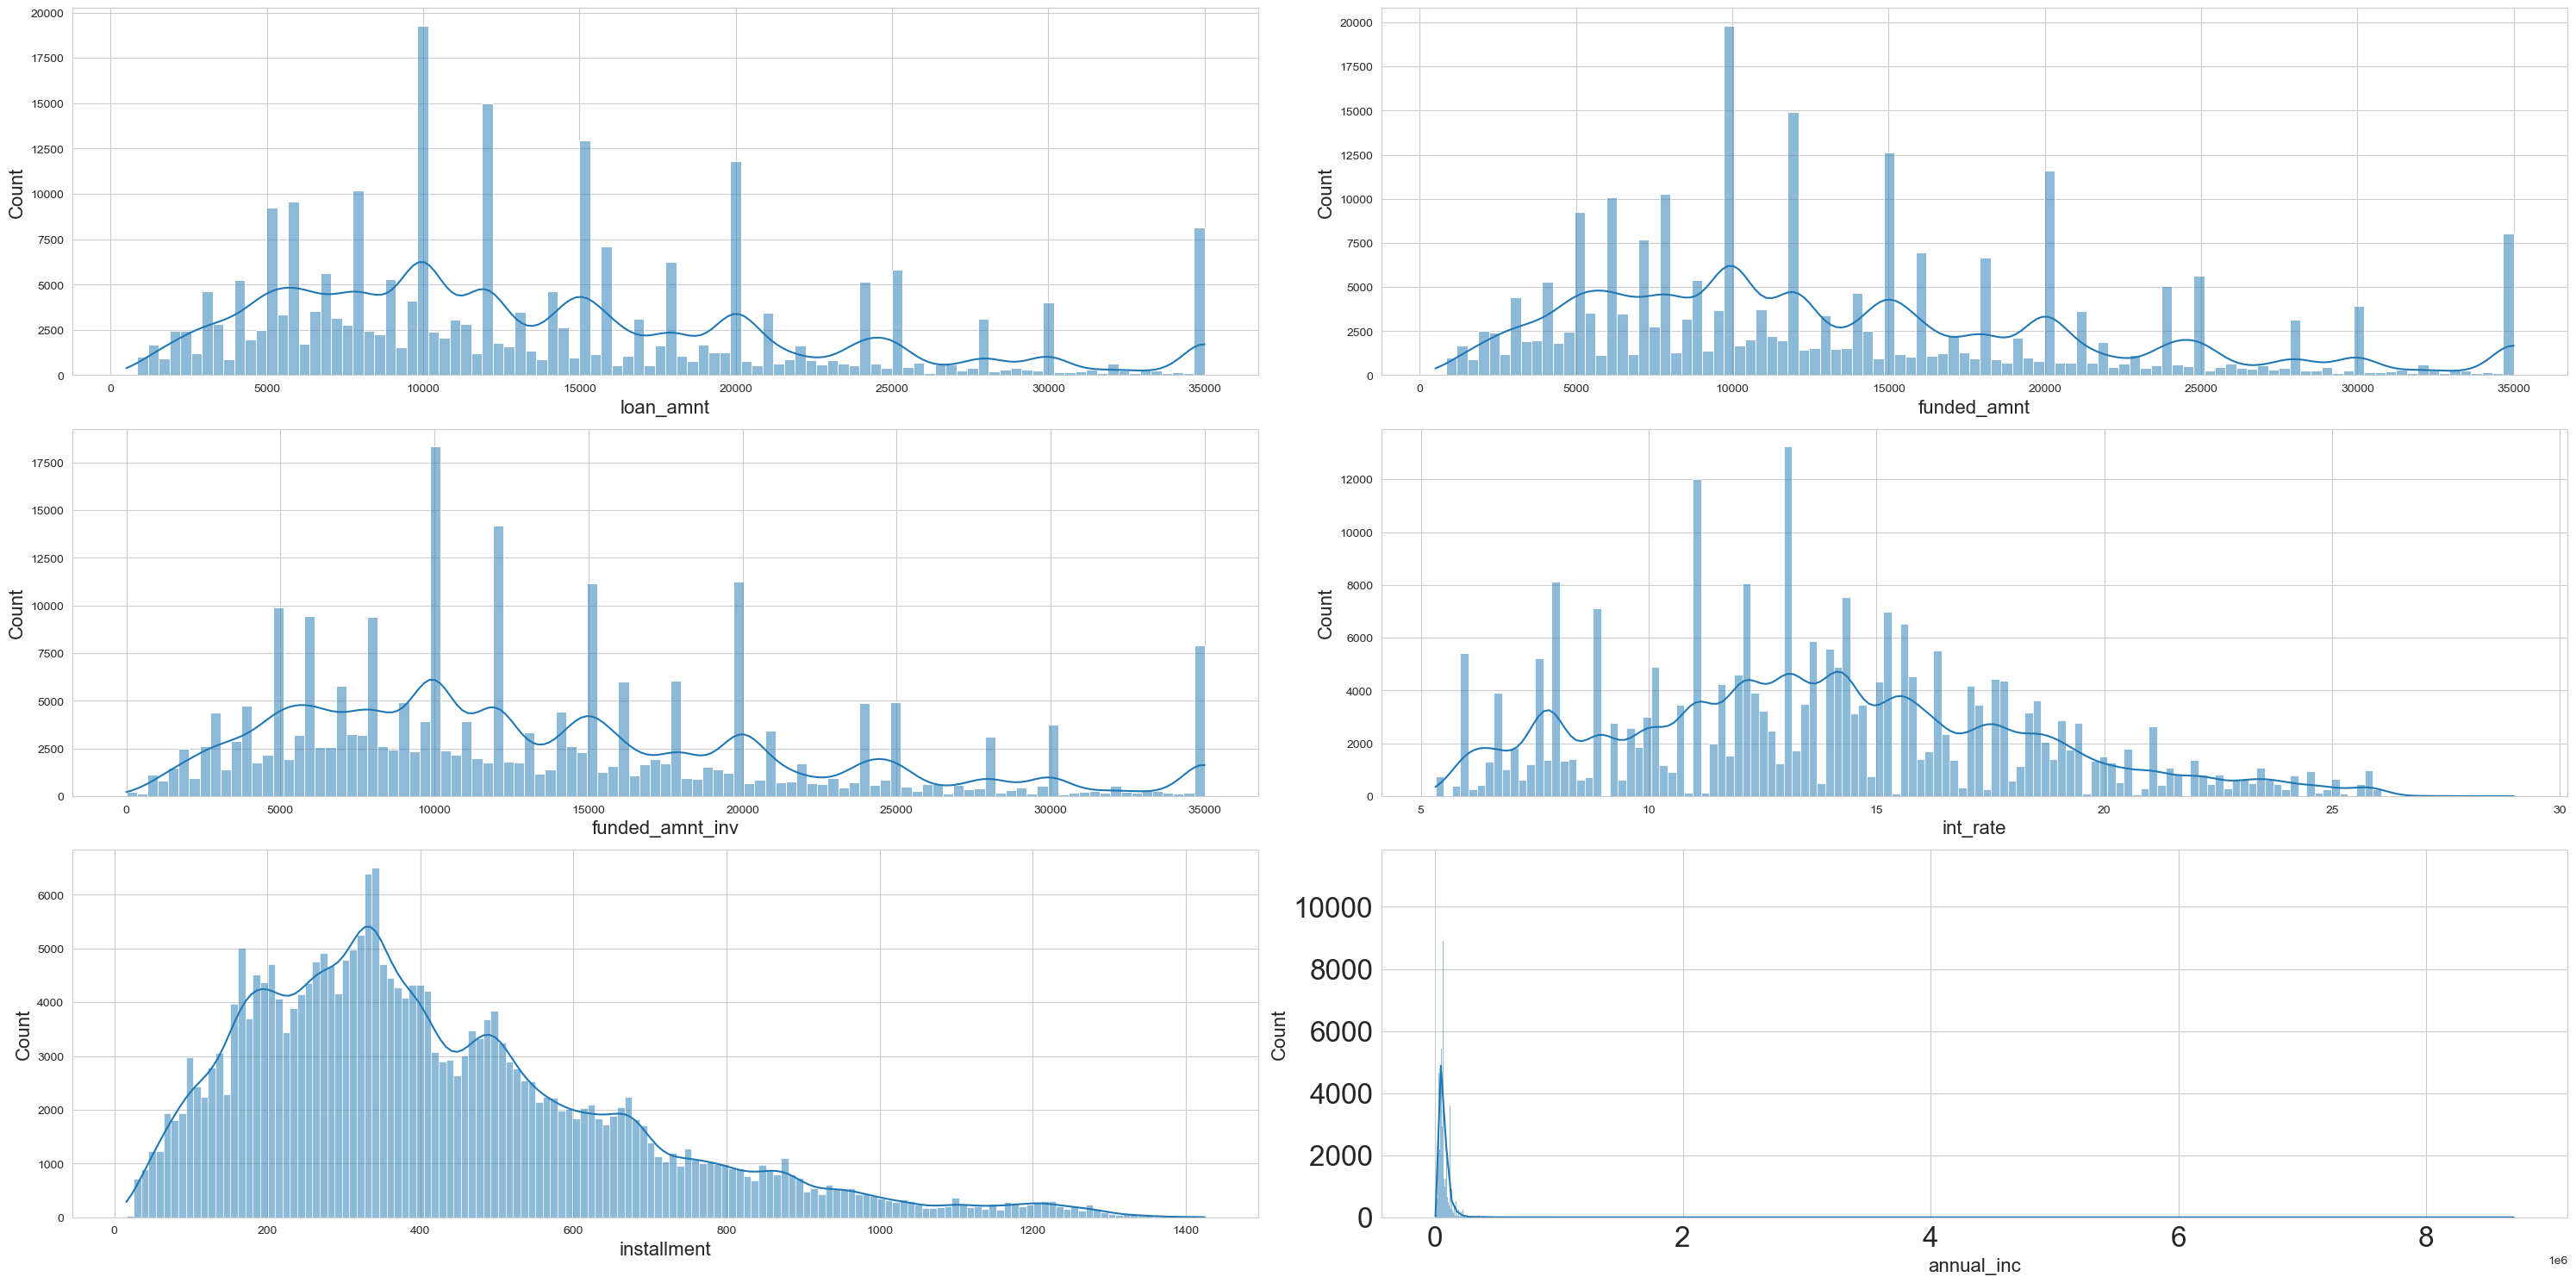

In [135]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[:6]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

C:\Users\modza\AppData\Local\Temp\ipykernel_7100\3654749456.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['annual_inc'],  )


<Axes: xlabel='annual_inc', ylabel='Density'>

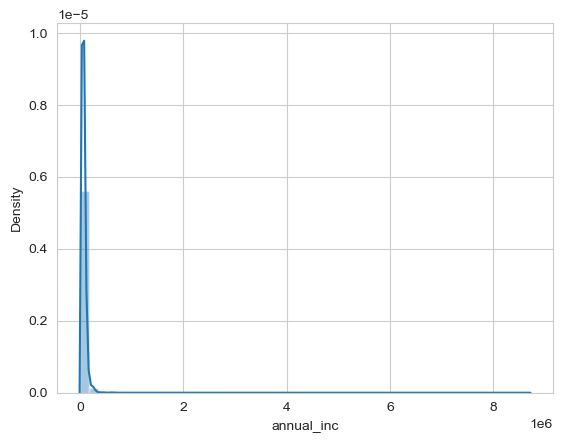

In [136]:
sns.distplot(df1['annual_inc'],  )

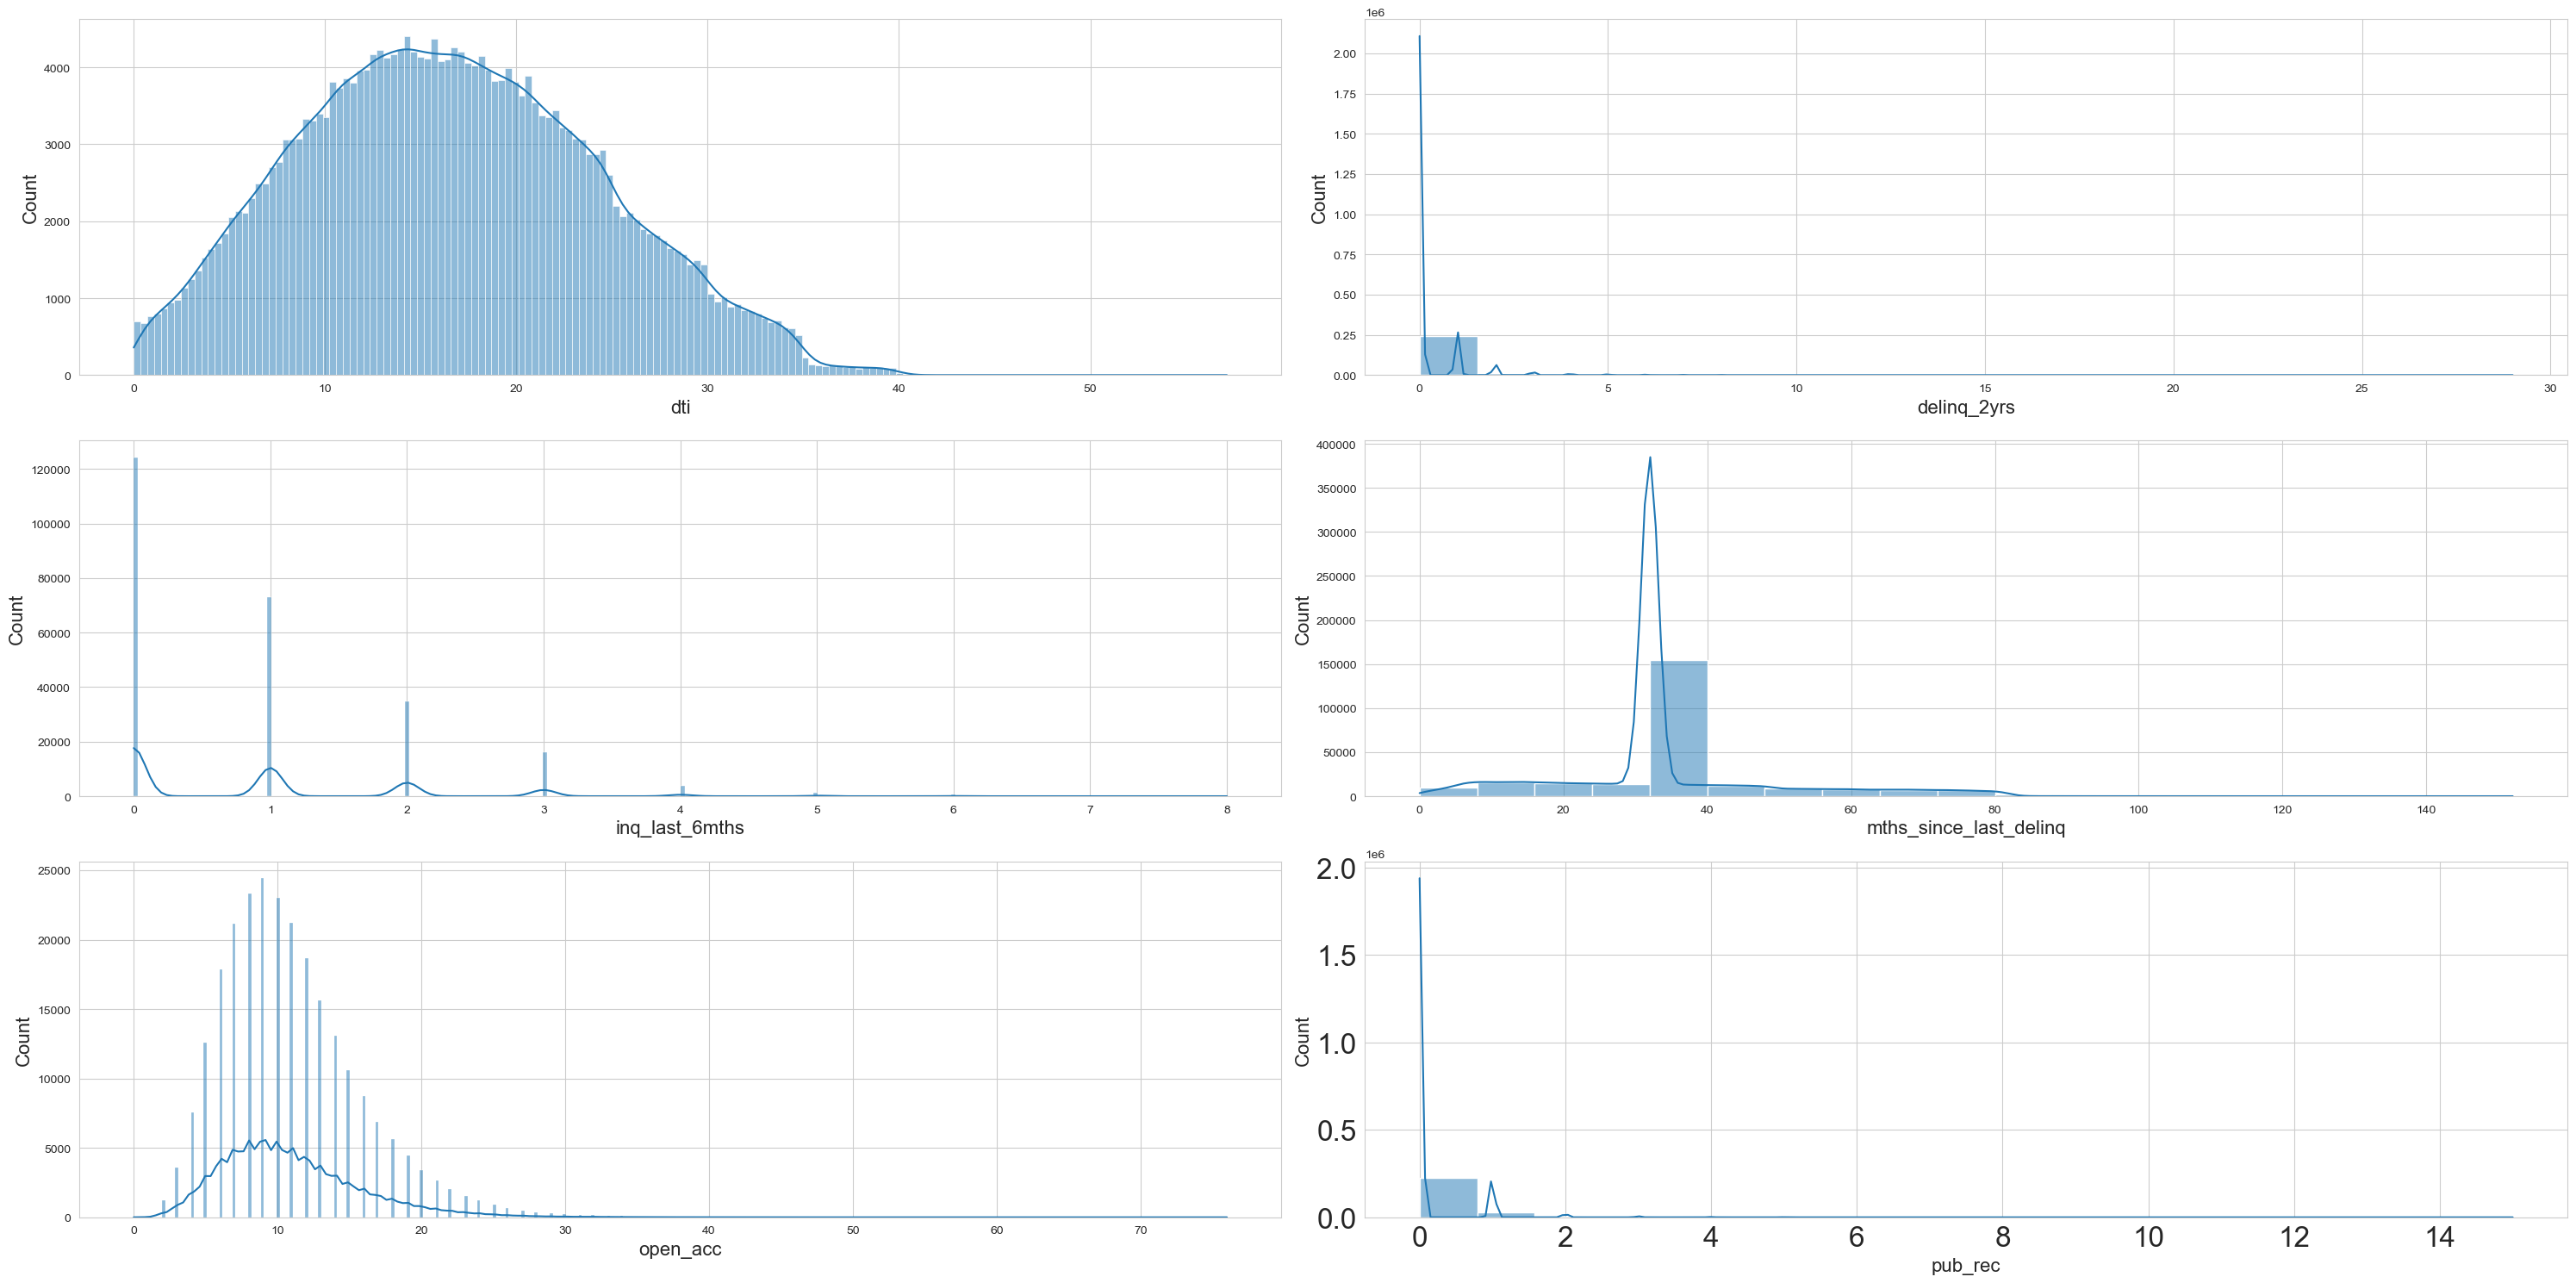

In [137]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[6:12]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

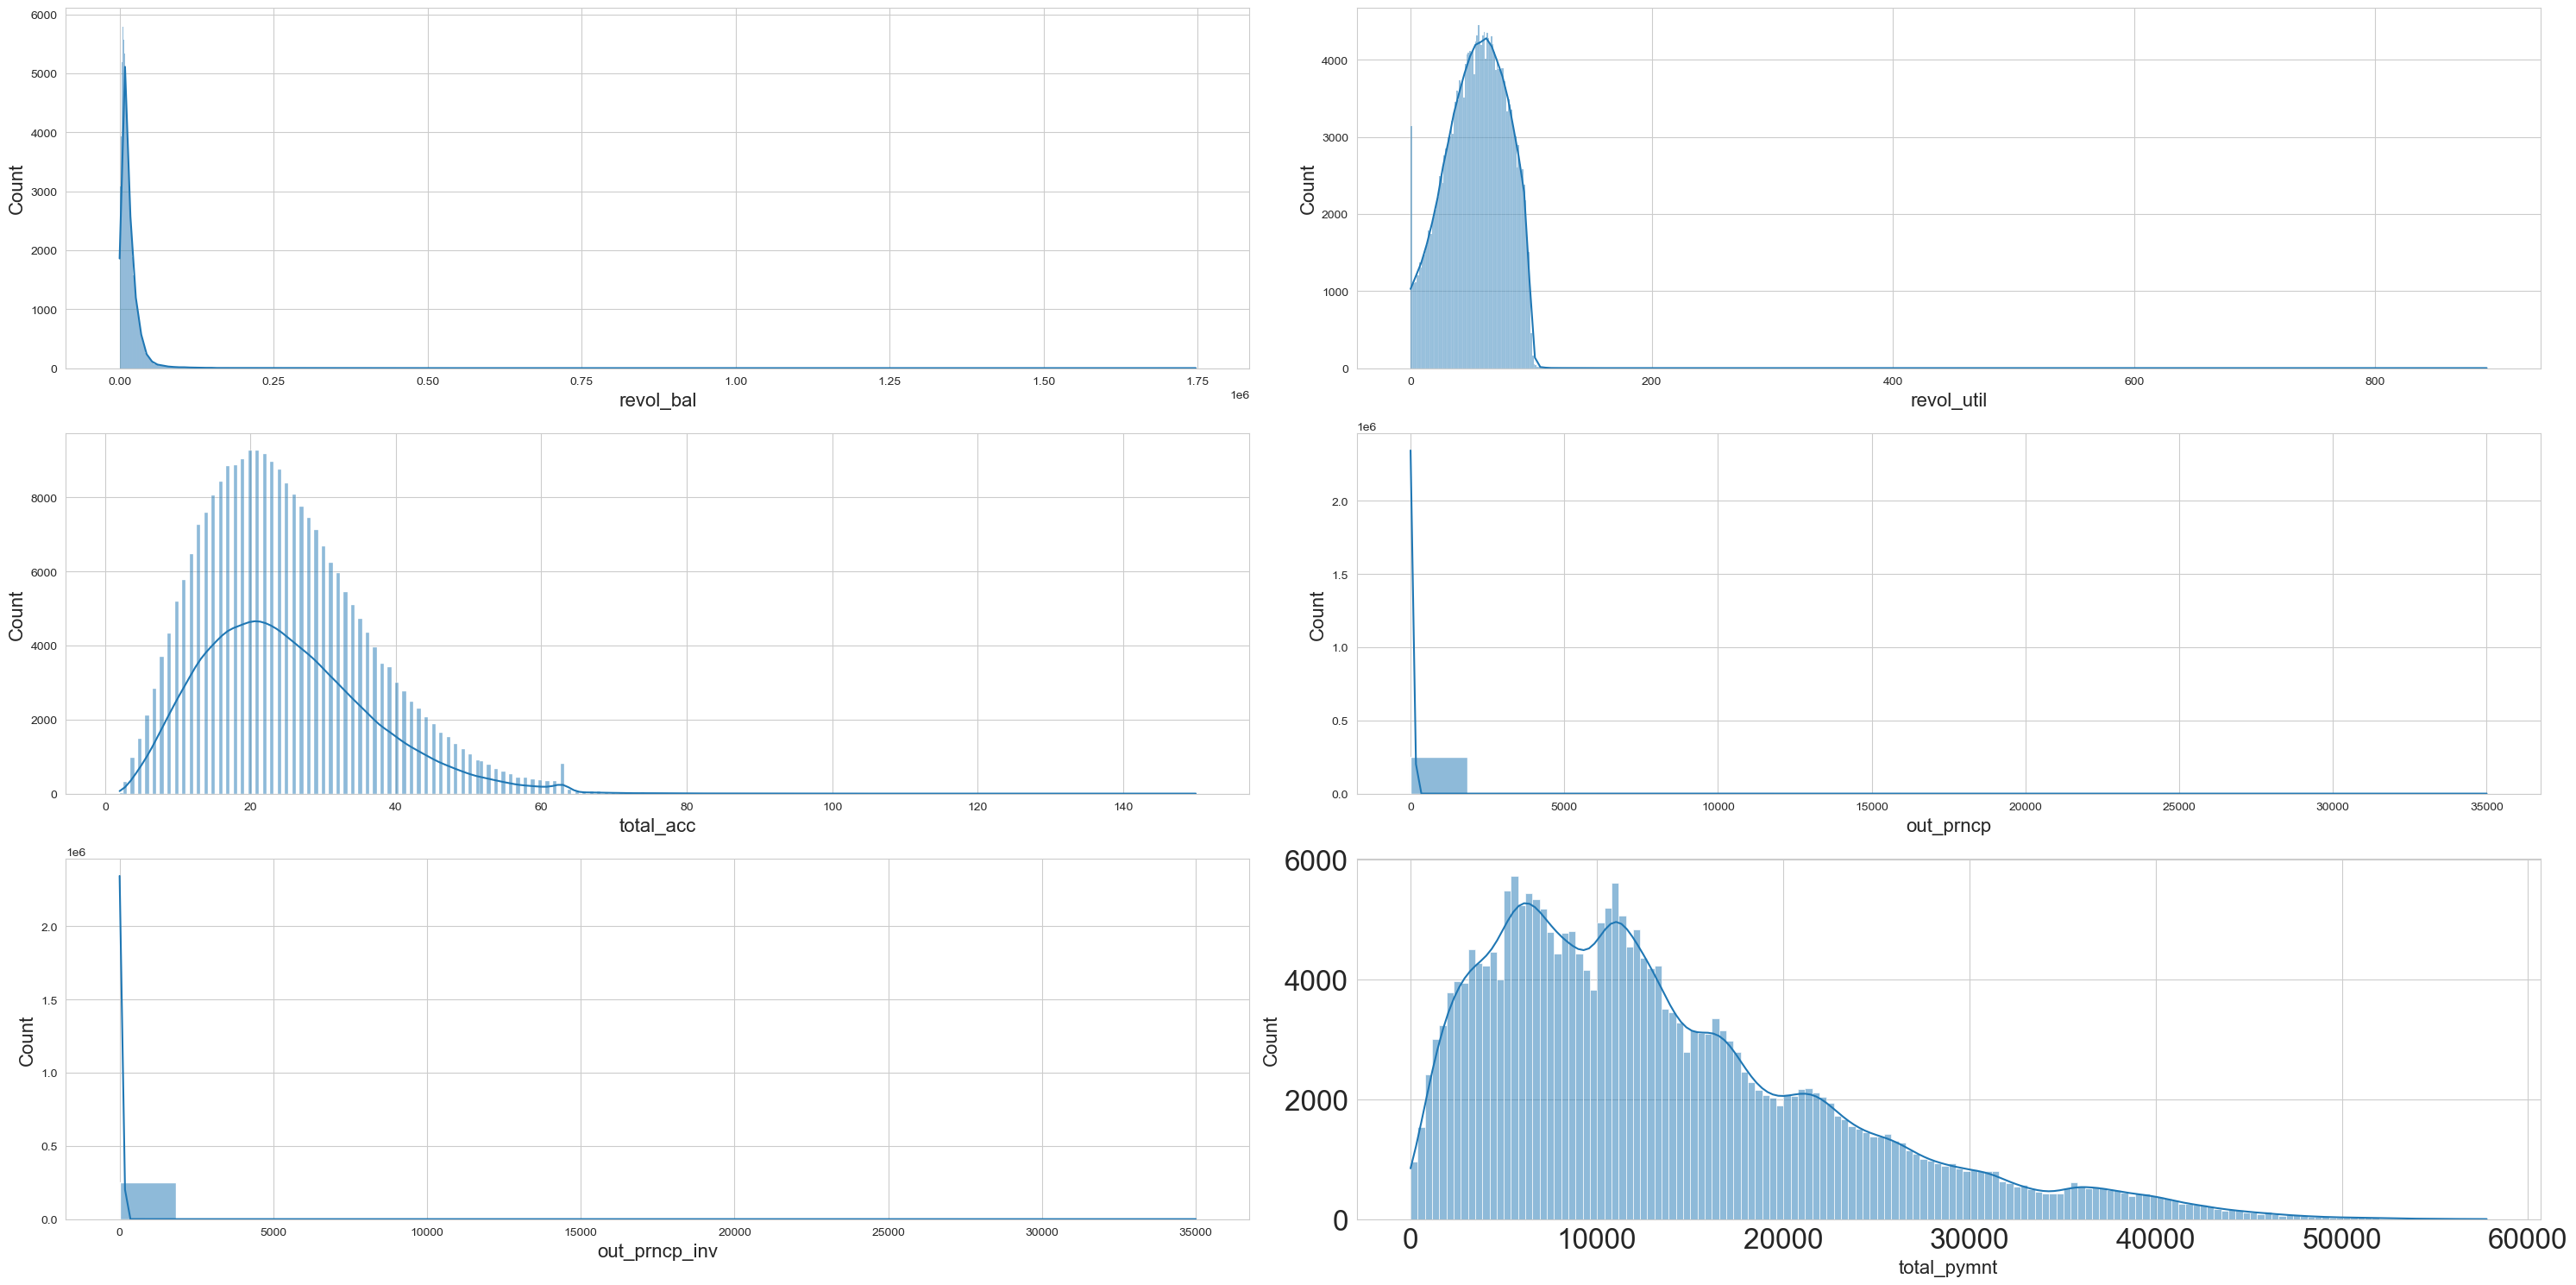

In [138]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[12:18]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

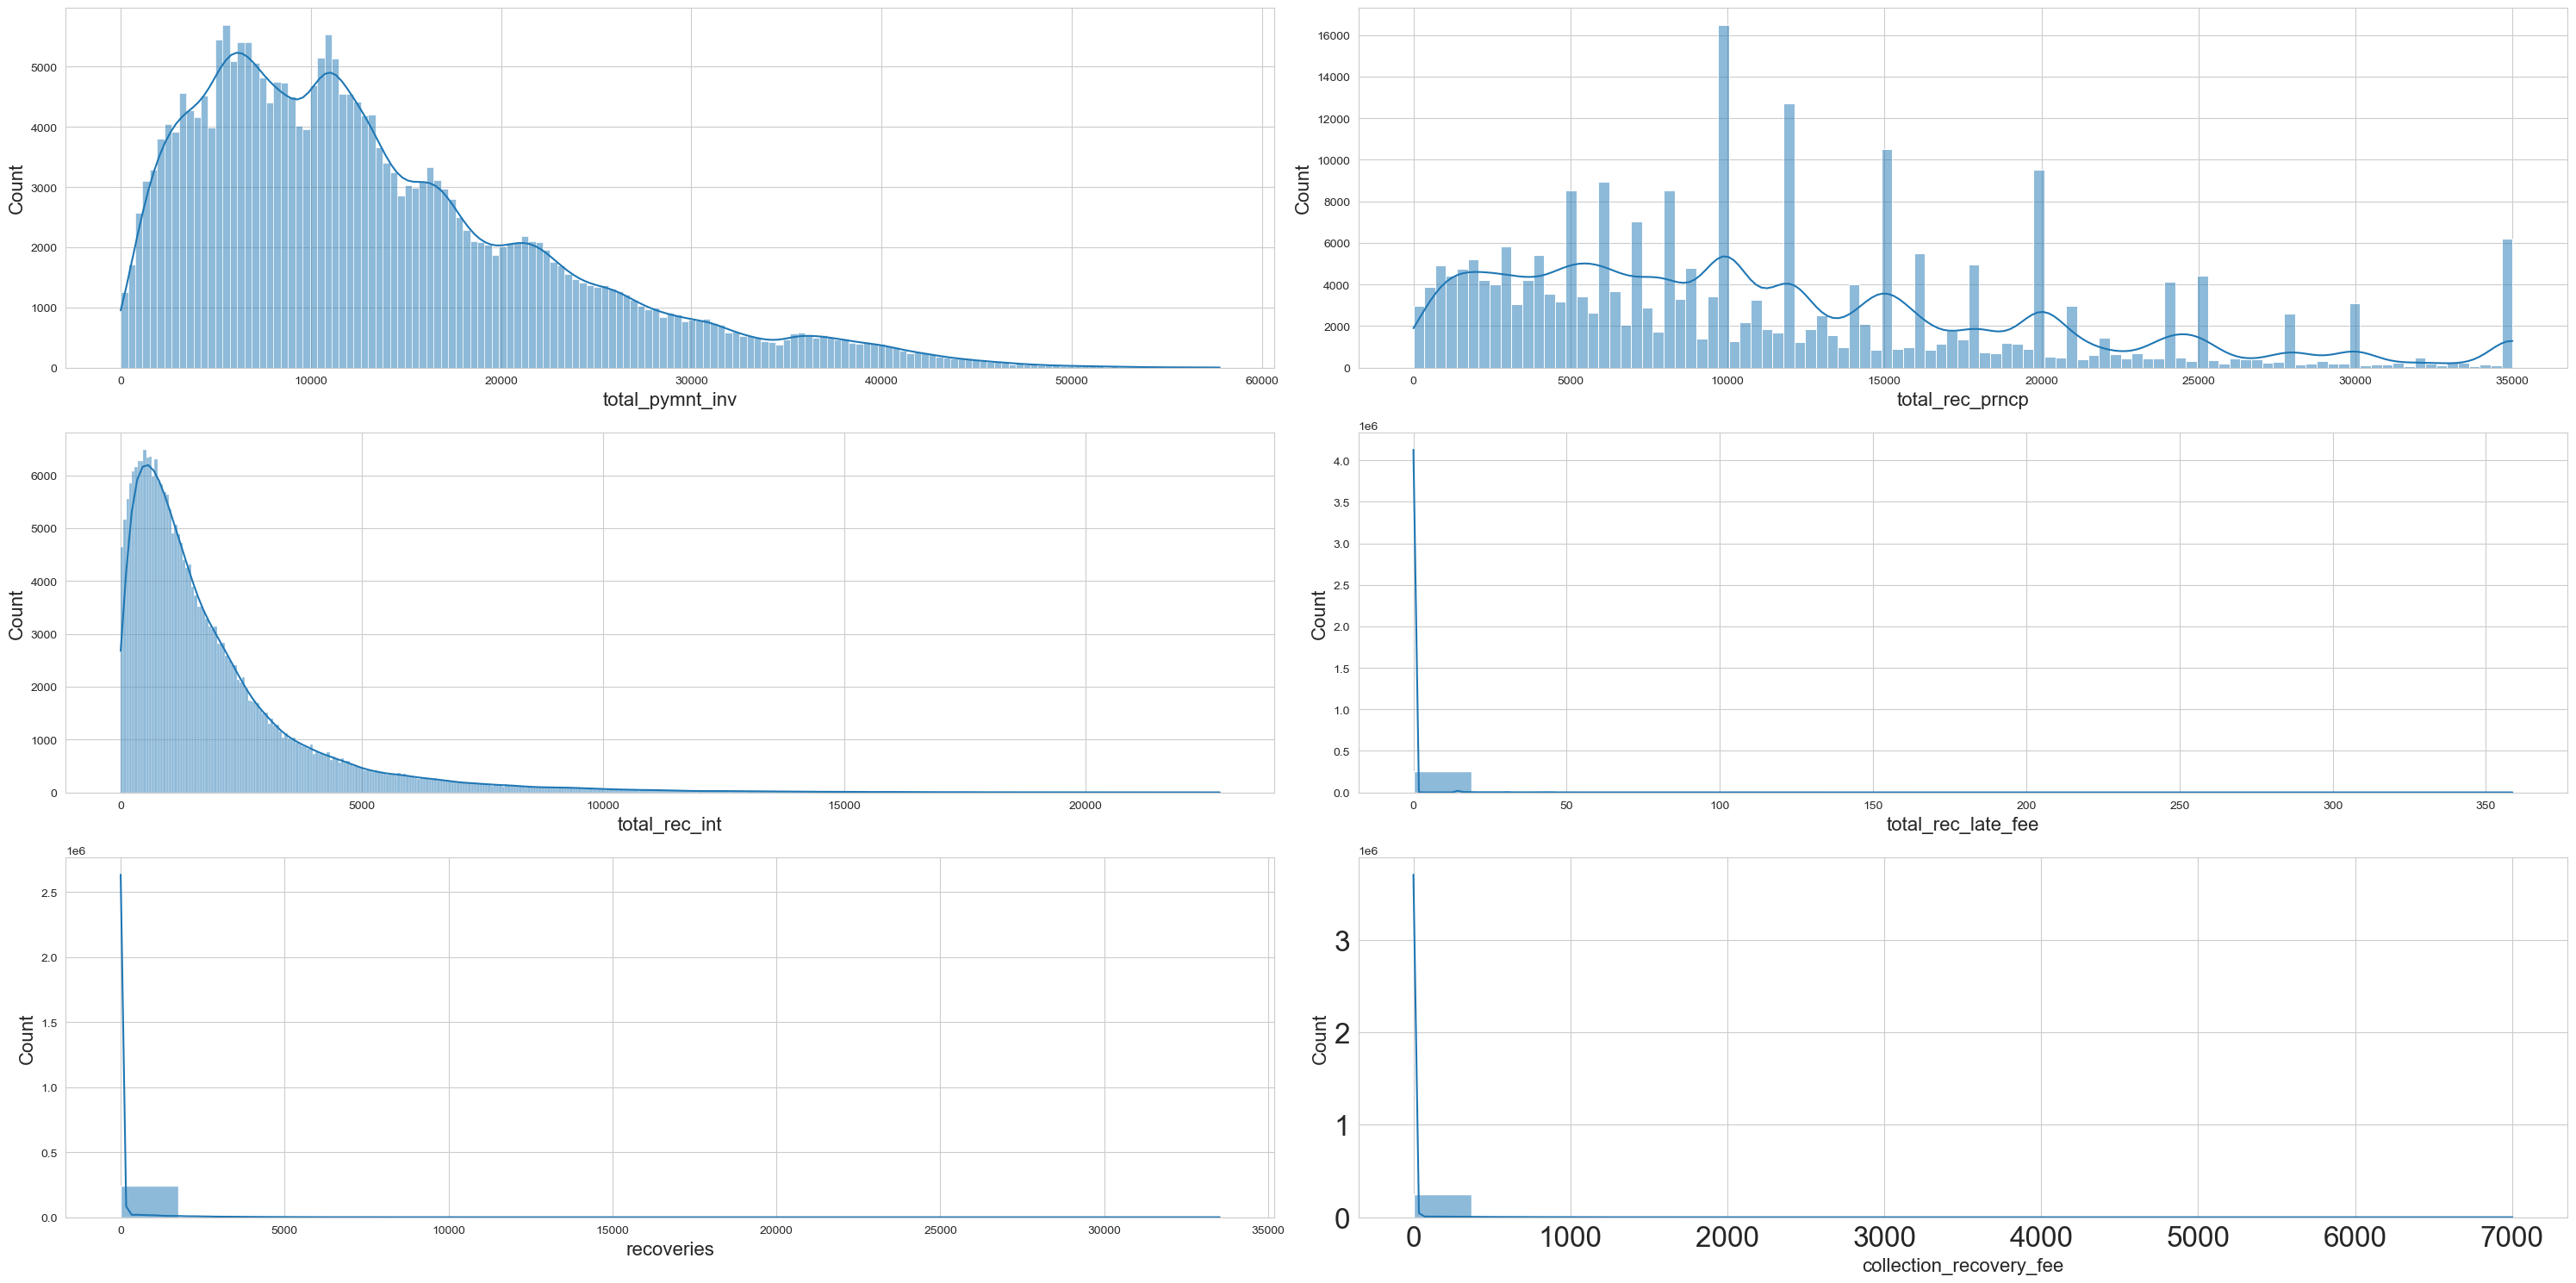

In [139]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[18:24]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

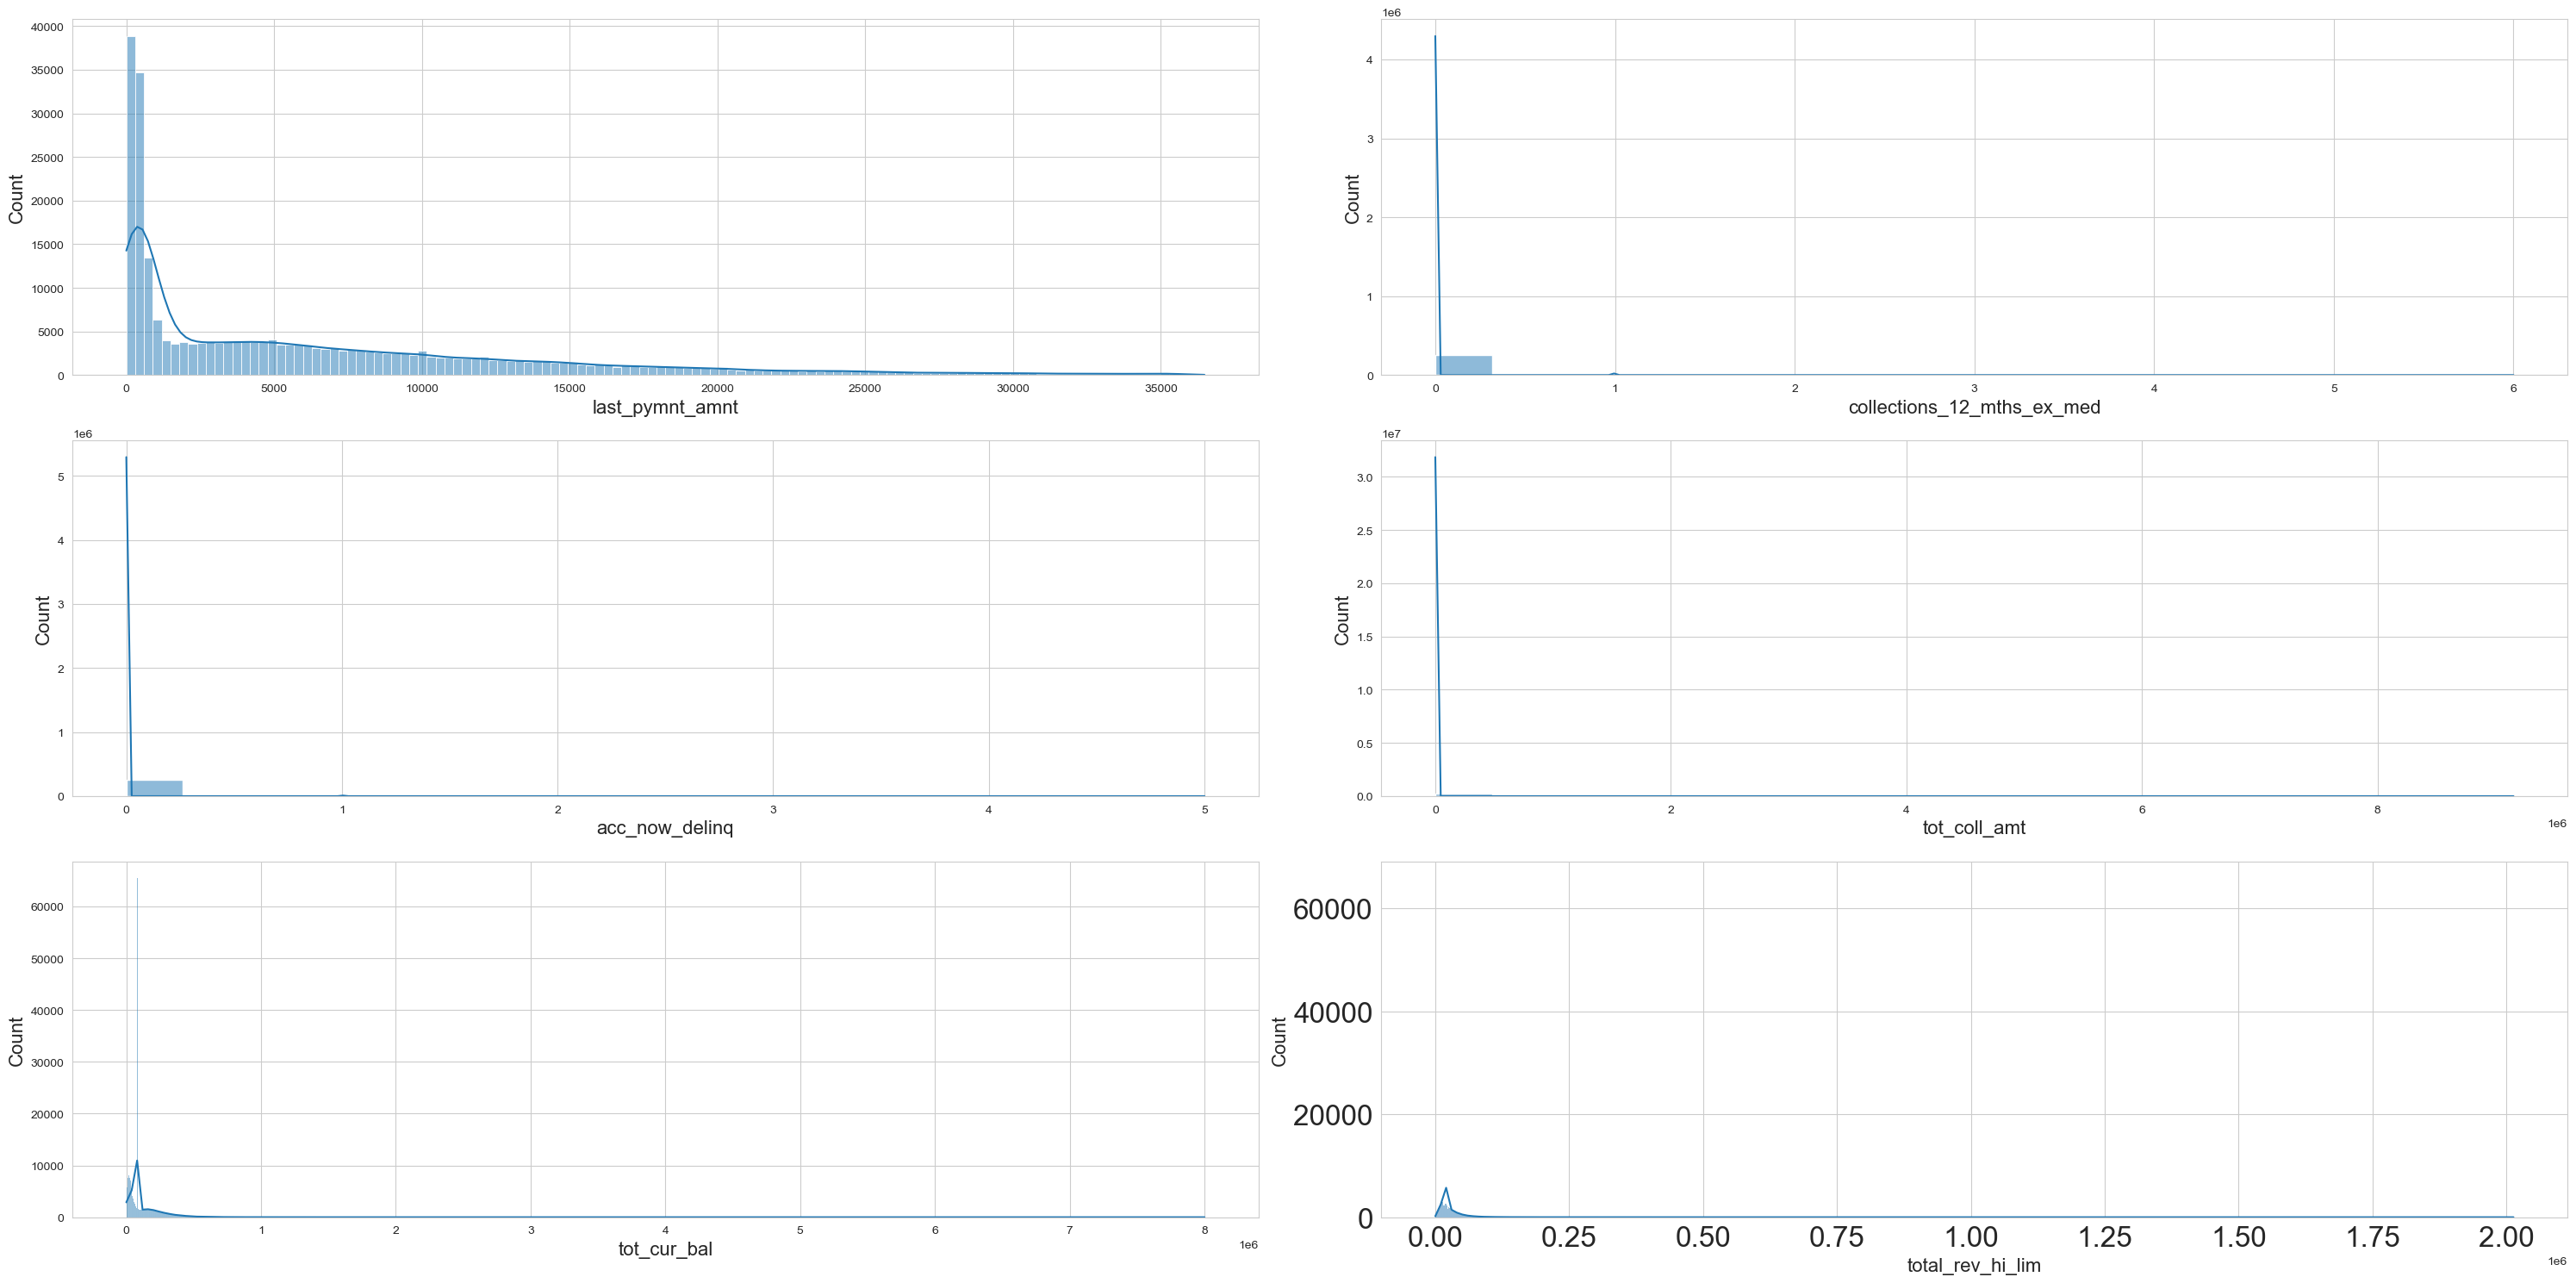

In [140]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))
axs = axs.flatten()

for row, var in enumerate(numeric.columns[24:30]):
    sns.histplot(data=df1, x=var, kde=True, ax=axs[row])
    plt.tick_params(axis='both', which='major', labelsize=24)
    axs[row].set_xlabel(f'{var}', fontsize=16)  
    axs[row].set_ylabel('Count', fontsize=16)   
    axs[row].grid(True)
    
        
   
plt.tight_layout()

In [ ]:
df1['total_rev_hi_lim'].plot(kind = 'hist',bins = 3)

Text(0.5, 0, 'sub_regions')

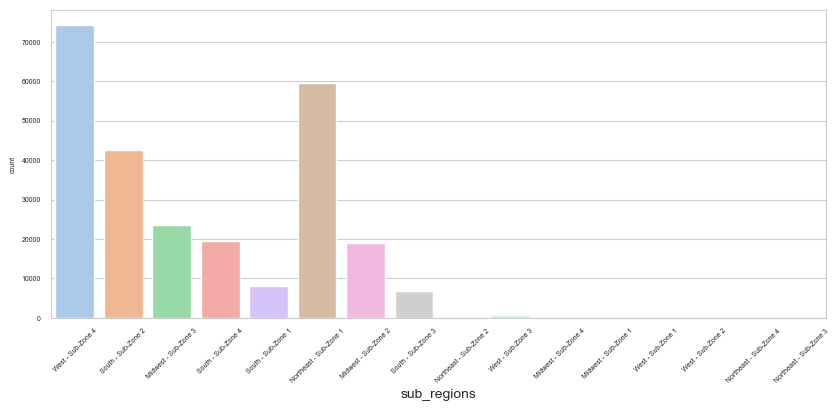

In [141]:
plt.rc('font', size=5)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'sub-regions',palette= 'pastel')
plt.tick_params('x', rotation = 45)
plt.xlabel('sub_regions', fontsize = 10)

## Values in sub-region column is not distributed proportionally, so we are going to drop 'sub-regions' column in coming steps.

Text(0.5, 0, 'sub_grade')

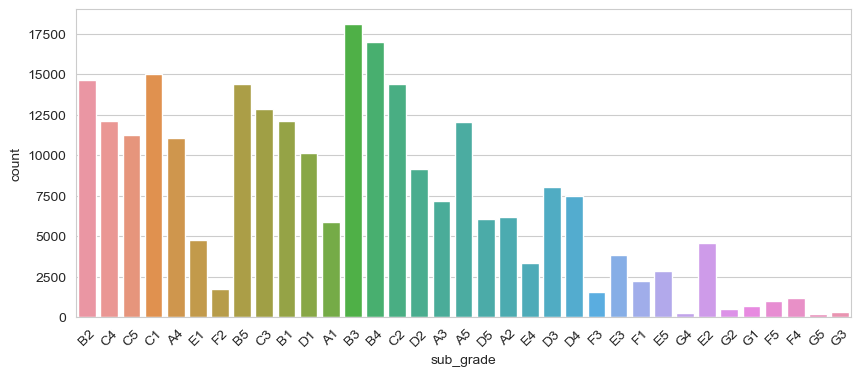

In [142]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'sub_grade')
plt.tick_params('x', rotation = 45)
plt.xlabel('sub_grade', fontsize = 10)

Text(0.5, 0, 'emp_length')

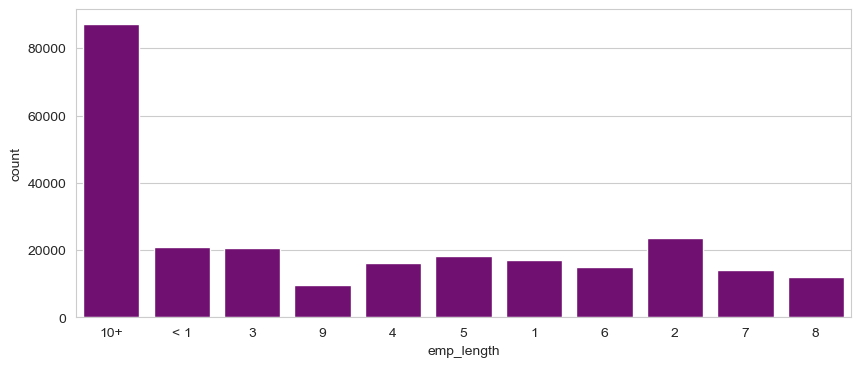

In [143]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'emp_length',color = 'purple')
#plt.tick_params('x', rotation = 45)
plt.xlabel('emp_length', fontsize = 10)

Text(0.5, 0, 'purpose')

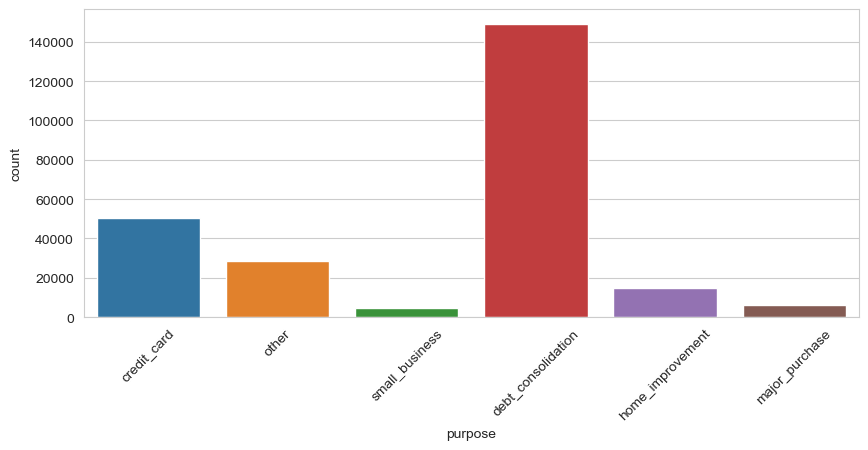

In [144]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'purpose')
plt.tick_params('x', rotation = 45)
plt.xlabel('purpose', fontsize = 10)

Text(0.5, 0, 'home_ownership')

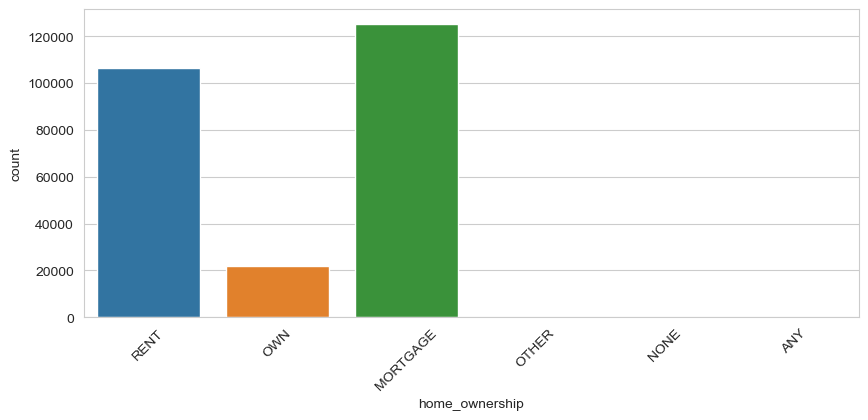

In [145]:
plt.rc('font', size=10)
plt.figure(figsize = (10,4))
sns.countplot(df1, x = 'home_ownership')
plt.tick_params('x', rotation = 45)
plt.xlabel('home_ownership', fontsize = 10)

In [146]:
df1['home_ownership'].replace(['NONE','ANY'],['OTHER','OTHER'],inplace = True)

# Bivariate analysis

In [147]:
def count_plot(data,x,y):
    sns.countplot(data  = data, x = x, hue = y)
    plt.title(f'Distributon of {x} with {y}  ')
    

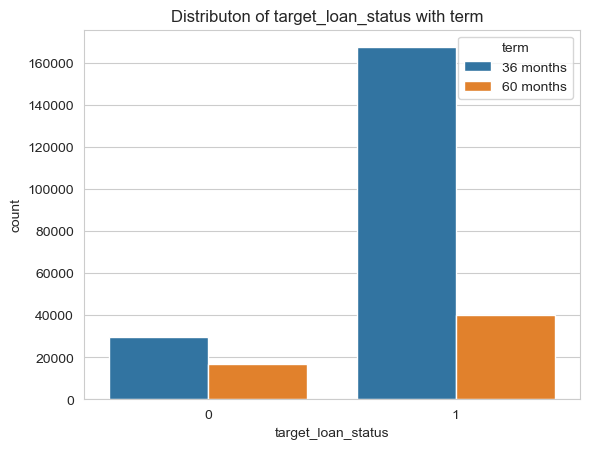

In [148]:
count_plot(df1,'target_loan_status','term')

In [149]:
import warnings
warnings.filterwarnings('ignore')

In [150]:
def count_pl(data,x,y):
    sns.countplot(data = data,x = x ,hue = y)
   # plt.text(x = 6, y = 4, s = 6)
    #plt.text(i, y[i], y[i], ha = 'center')
    plt.tight_layout()

In [ ]:
cat = df1.select_dtypes(include = ['object'])

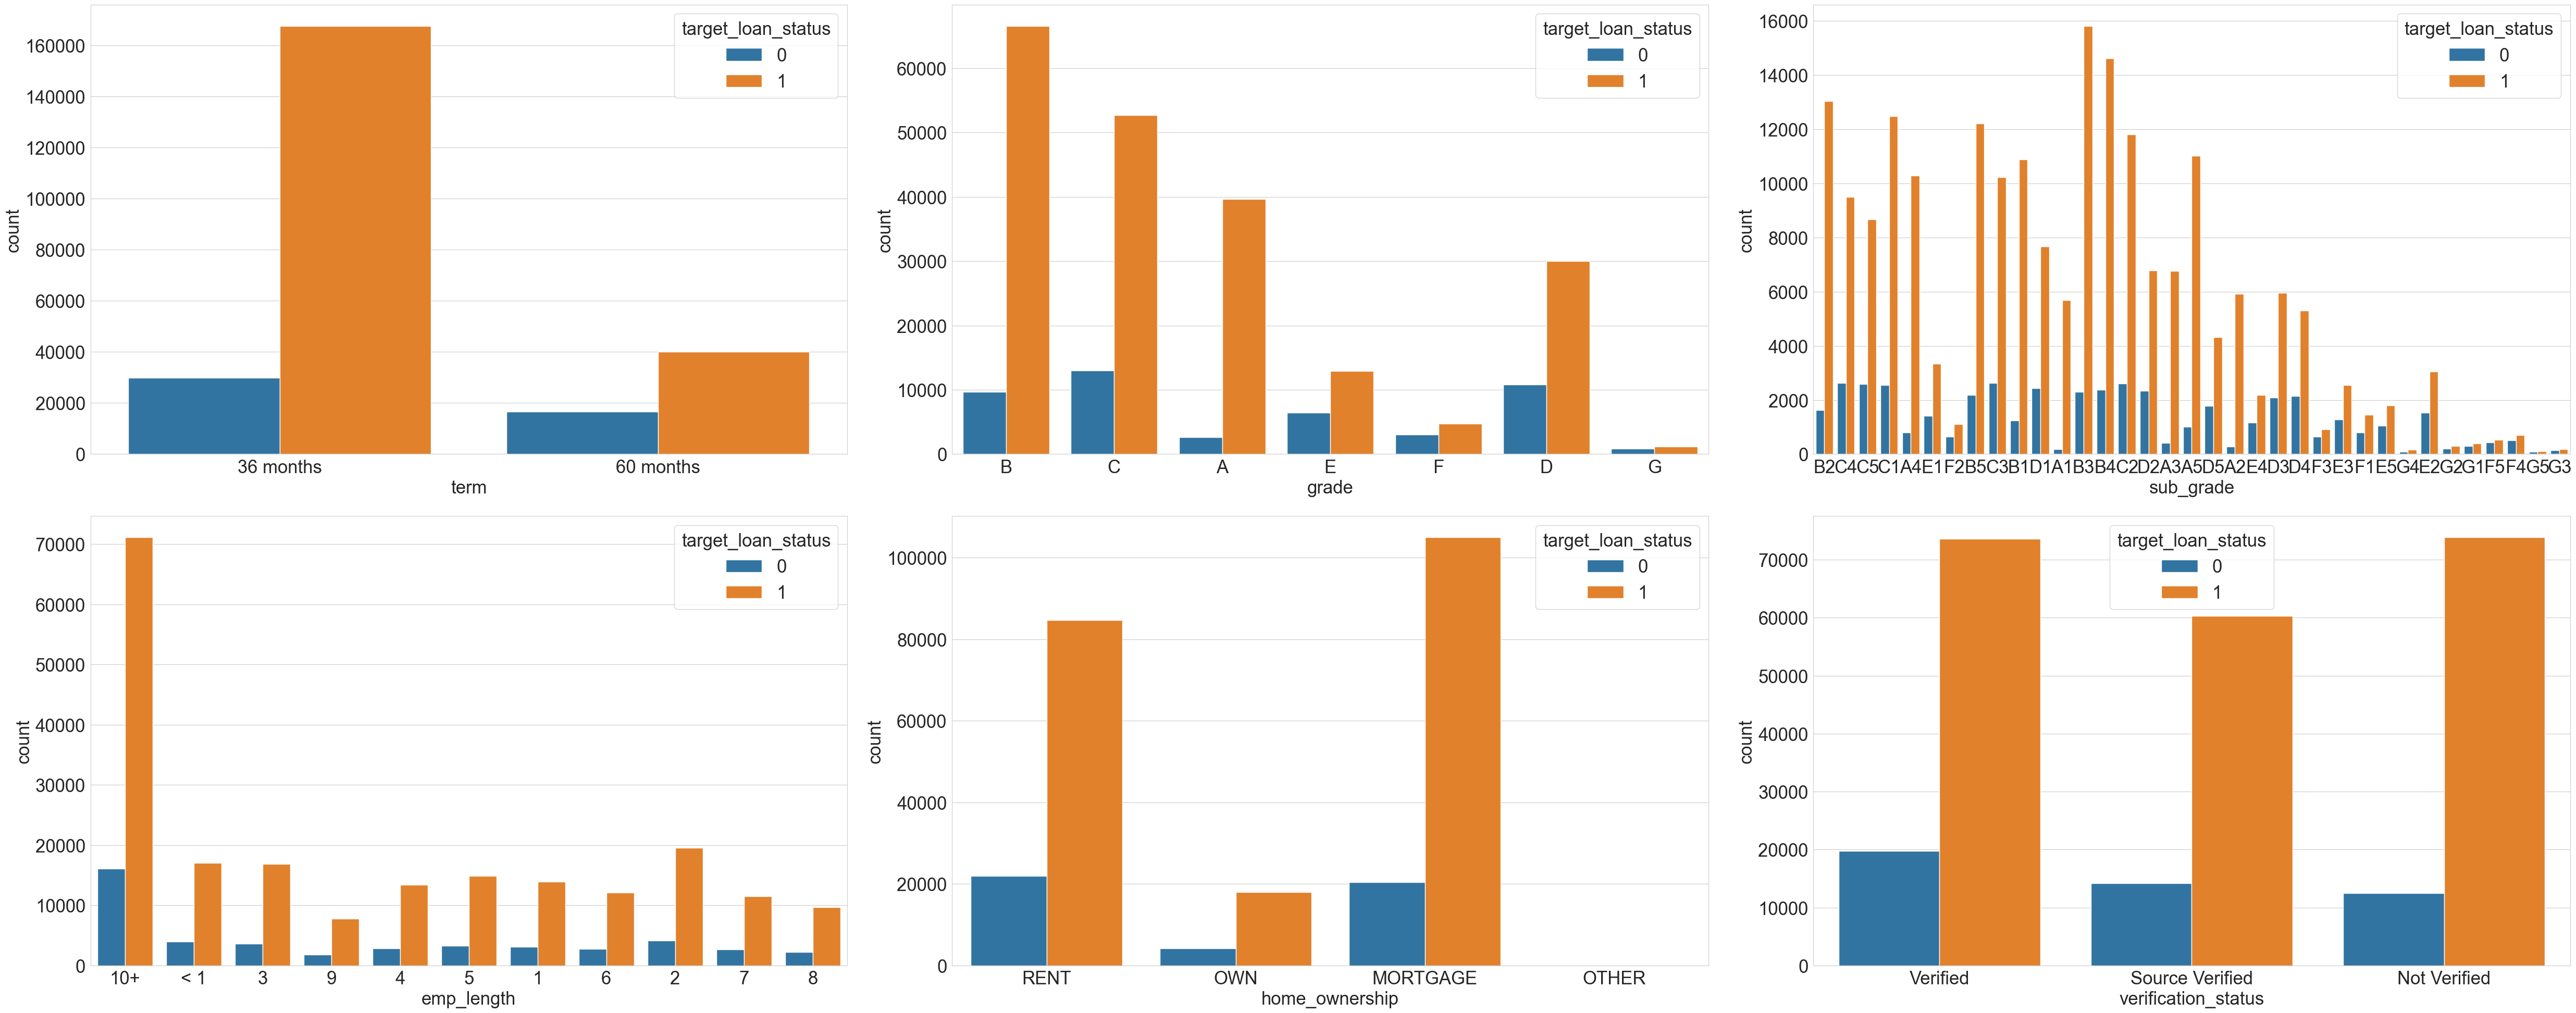

In [151]:
plt.rc('font', size=25)
fig,axs = plt.subplots(nrows = 2, ncols = 3,figsize = (50,20))
axs = axs.flatten()
for row, var in enumerate(cat.columns[:6]):
    sns.countplot(data = df1,x = var ,hue ='target_loan_status', ax = axs[row])
    plt.tight_layout()



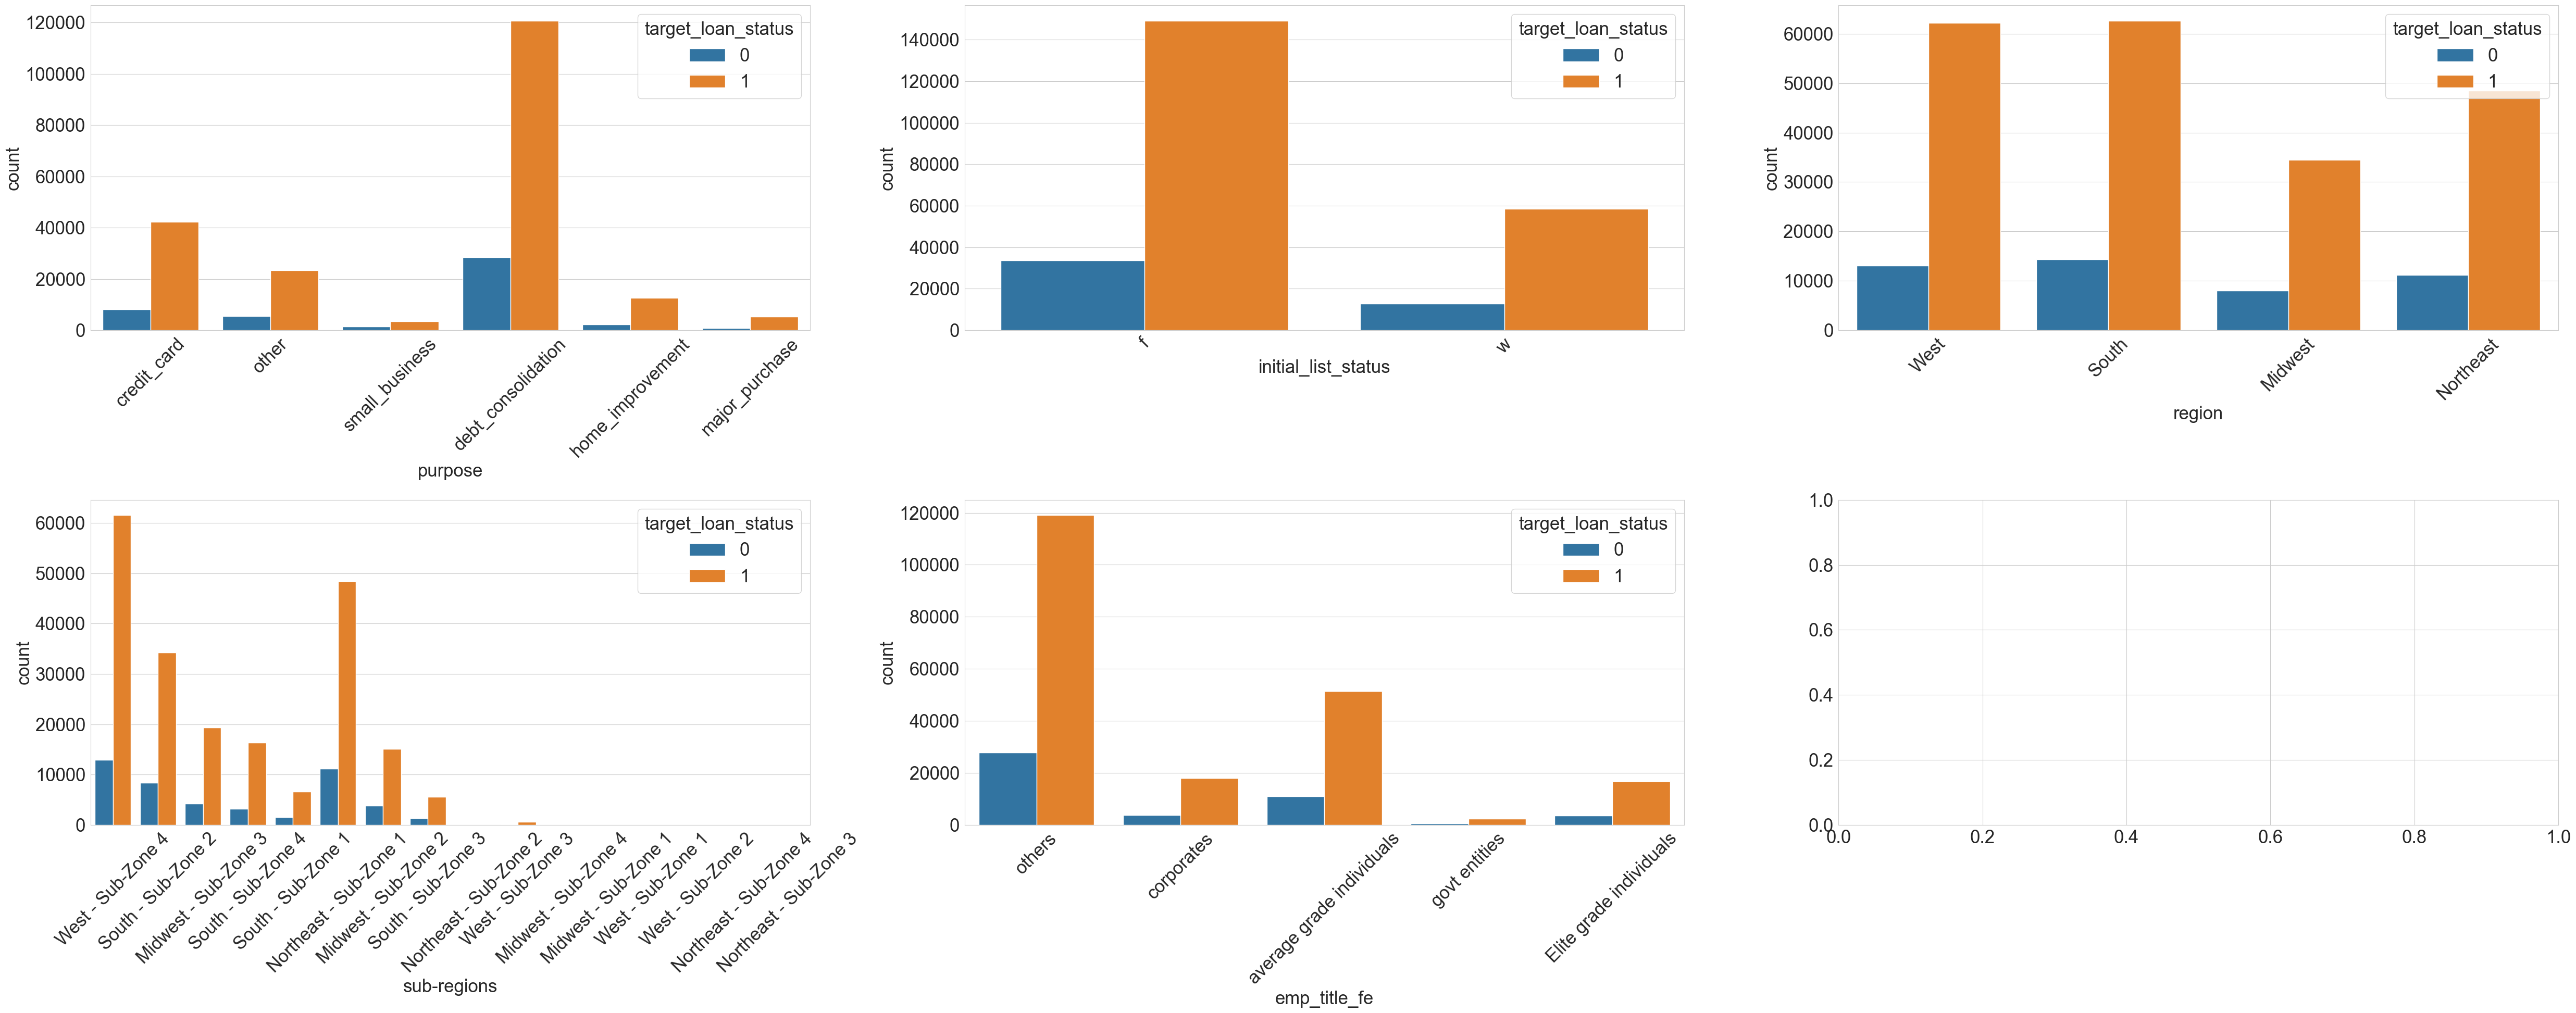

In [152]:
plt.rc('font', size=25)
fig,axs = plt.subplots(nrows = 2, ncols = 3,figsize = (50,20))
axs = axs.flatten()
for row, var in enumerate(cat.columns[6:]):
    sns.countplot(data = df1,x = var ,hue ='target_loan_status', ax = axs[row])
    axs[row].tick_params('x', rotation = 45)
    plt.tight_layout()
    


In [153]:
def bivar_gp(df, region_column, target_column):

    
    gp = df.groupby(by=[region_column])[target_column].value_counts().unstack(fill_value=0)

    # total count of target column to other independent categorical column
    gp['Total'] = gp.sum(axis=1)

    # Calculate the percentage of 0's in each category
    gp['Percentage_0'] = gp[0] / gp['Total'] * 100

    # renaming columns for better visualization
    gp = gp.reset_index()
    gp = gp.rename(columns={0: 'Count_0', 1: 'Count_1'})

    return gp


In [154]:
bivar_gp(df1,'region','target_loan_status',)   # change the default to 1, and fully paid 0

target_loan_status     region  Count_0  Count_1  Total  Percentage_0
0                     Midwest     7987    34429  42416     18.830158
1                   Northeast    11149    48466  59615     18.701669
2                       South    14300    62643  76943     18.585186
3                        West    13031    62185  75216     17.324771

In [155]:
bivar_gp(df1,'emp_title_fe','target_loan_status',)

target_loan_status               emp_title_fe  Count_0  Count_1   Total  \
0                     Elite grade individuals     3465    16816   20281   
1                   average grade individuals    11034    51503   62537   
2                                  corporates     3672    18031   21703   
3                               govt entities      480     2356    2836   
4                                      others    27816   119017  146833   

target_loan_status  Percentage_0  
0                      17.084956  
1                      17.643955  
2                      16.919320  
3                      16.925247  
4                      18.943970

In [156]:
bivar_gp(df1,'purpose','target_loan_status',)

target_loan_status             purpose  Count_0  Count_1   Total  Percentage_0
0                          credit_card     8059    42250   50309     16.019003
1                   debt_consolidation    28389   120764  149153     19.033476
2                     home_improvement     2316    12660   14976     15.464744
3                       major_purchase      888     5391    6279     14.142379
4                                other     5425    23283   28708     18.897172
5                       small_business     1390     3375    4765     29.171039

# Insights

* Here, we can see that the highest number of defaulters are from the group who borrowed loan for 'small_business purpose, followed by moving, medical,renewable_energy,, with each passing 20% mark, which signifies that out of  all the loan that has been borrowed under that partciular purpose has, 20% turned out to be defaulters.

In [157]:
bivar_gp(df1,'grade','target_loan_status',)

target_loan_status grade  Count_0  Count_1  Total  Percentage_0
0                      A     2664    39679  42343      6.291477
1                      B     9717    66546  76263     12.741434
2                      C    13002    52678  65680     19.795981
3                      D    10798    30020  40818     26.454015
4                      E     6459    12928  19387     33.316140
5                      F     3013     4726   7739     38.932679
6                      G      814     1146   1960     41.530612

#  Insights

* We can see clearly that as grades are degrading, percentage of defaulters are getting increased significantly.
* It can be seen that grade A, and B has comparatively smaller % of defaulters, while F and G has the  highest with 38% and  41.53% percent of defaulters.
* BUt here, major issue seems to be with grade C and D,both combined accumulates approximately to 35% of total data, and thier default percentage is also somewhere arond 20%.


In [158]:
bivar_gp(df1,'home_ownership','target_loan_status',)

target_loan_status home_ownership  Count_0  Count_1   Total  Percentage_0
0                        MORTGAGE    20376   104966  125342     16.256323
1                           OTHER       34      151     185     18.378378
2                             OWN     4135    17960   22095     18.714641
3                            RENT    21922    84646  106568     20.570903

In [159]:
bivar_gp(df1,'emp_length','target_loan_status')

target_loan_status emp_length  Count_0  Count_1  Total  Percentage_0
0                           1     3059    13892  16951     18.046133
1                         10+    16104    71120  87224     18.462808
2                           2     4119    19528  23647     17.418700
3                           3     3638    16846  20484     17.760203
4                           4     2841    13422  16263     17.469102
5                           5     3280    14856  18136     18.085576
6                           6     2758    12058  14816     18.615011
7                           7     2673    11483  14156     18.882453
8                           8     2227     9695  11922     18.679752
9                           9     1826     7790   9616     18.989185
10                        < 1     3942    17033  20975     18.793802

In [160]:
bivar_gp(df1,'initial_list_status','target_loan_status',) #chi-square teest

target_loan_status initial_list_status  Count_0  Count_1   Total  Percentage_0
0                                    f    33601   149146  182747     18.386622
1                                    w    12866    58577   71443     18.008762

In [161]:
bivar_gp(df1,'verification_status','target_loan_status',)

target_loan_status verification_status  Count_0  Count_1  Total  Percentage_0
0                         Not Verified    12486    73856  86342     14.461097
1                      Source Verified    14202    60271  74473     19.069999
2                             Verified    19779    73596  93375     21.182329

# Insights

* Seems like,  some serious issues persists in their income verifciation check process at Lending Club, becuase the highest number of defualters belong to the the source verified and verified category, while the defualters who wasn't verified , has 14.46% of default ratio, comparatively to that of 19% and 21.18%.

In [162]:
#chisquare sub-grade, and grade : whichevr column has highest chi square keep that

In [163]:
bivar_gp(df1,'term','target_loan_status',)

target_loan_status       term  Count_0  Count_1   Total  Percentage_0
0                   36 months    29798   167575  197373     15.097303
1                   60 months    16669    40148   56817     29.338050

In [164]:
pd.crosstab(df1['target_loan_status'],columns = df1['purpose'],)

purpose             credit_card  debt_consolidation  home_improvement  \
target_loan_status                                                      
0                          8059               28389              2316   
1                         42250              120764             12660   

purpose             major_purchase  other  small_business  
target_loan_status                                         
0                              888   5425            1390  
1                             5391  23283            3375

In [165]:
pd.DataFrame(df1.groupby(['region','purpose','emp_title_fe'])['target_loan_status'].value_counts()).unstack(level = 2)#.pivot(columns = ['purpose','emp_title_fe'])

target_loan_status  \
emp_title_fe                                    Elite grade individuals   
region    purpose            target_loan_status                           
Midwest   credit_card        0                                    114.0   
                             1                                    678.0   
          debt_consolidation 0                                    393.0   
                             1                                   1766.0   
          home_improvement   0                                     27.0   
                             1                                    168.0   
          major_purchase     0                                      7.0   
                             1                                     46.0   
          other              0                                     42.0   
                             1                                    173.0   
          small_business     0                                      6.0   
                             1                                     25.0   
Northeast credit_card        0                                    141.0   
                             1                                    790.0   
          debt_consolidation 0                                    489.0   
                             1                                   2257.0   
          home_improvement   0                                     44.0   
                             1                                    220.0   
          major_purchase     0                                     13.0   
                             1                                     68.0   
          other              0                                     68.0   
                             1                                    306.0   
          small_business     0                                     15.0   
                             1                                     24.0   
South     credit_card        0                                    231.0   
                             1                                   1133.0   
          debt_consolidation 0                                    780.0   
                             1                                   3337.0   
          home_improvement   0                                     77.0   
                             1                                    335.0   
          major_purchase     0                                     21.0   
                             1                                    106.0   
          other              0                                     93.0   
                             1                                    411.0   
          small_business     0                                     35.0   
                             1                                     54.0   
West      credit_card        0                                    153.0   
                             1                                    977.0   
          debt_consolidation 0                                    560.0   
                             1                                   3163.0   
          home_improvement   0                                     37.0   
                             1                                    280.0   
          major_purchase     0                                     12.0   
                             1                                     70.0   
          other              0                                     90.0   
                             1                                    373.0   
          small_business     0                                     17.0   
                             1                                     56.0   

                                                                           \
emp_title_fe                                    average grade individuals   
region    purpose            target_loan_status                          

In [ ]:
df1['emp_title_fe'].isnull().sum()

# Insights

* from the above table, it can be observed that people belonging to elite_grade_individuals who borrowed loan for small_business purpose tends to be defualting more in comparison to any other groups, except Wets region, where default percentage is 25% (which is still high).

In [ ]:
gardfhbxvb  

# Inisghts

* borrowers whose loan repayment period is 60 months turned to be dafulting more comaparatively to that with 36 months of period.

In [ ]:
new1 = df1.copy()

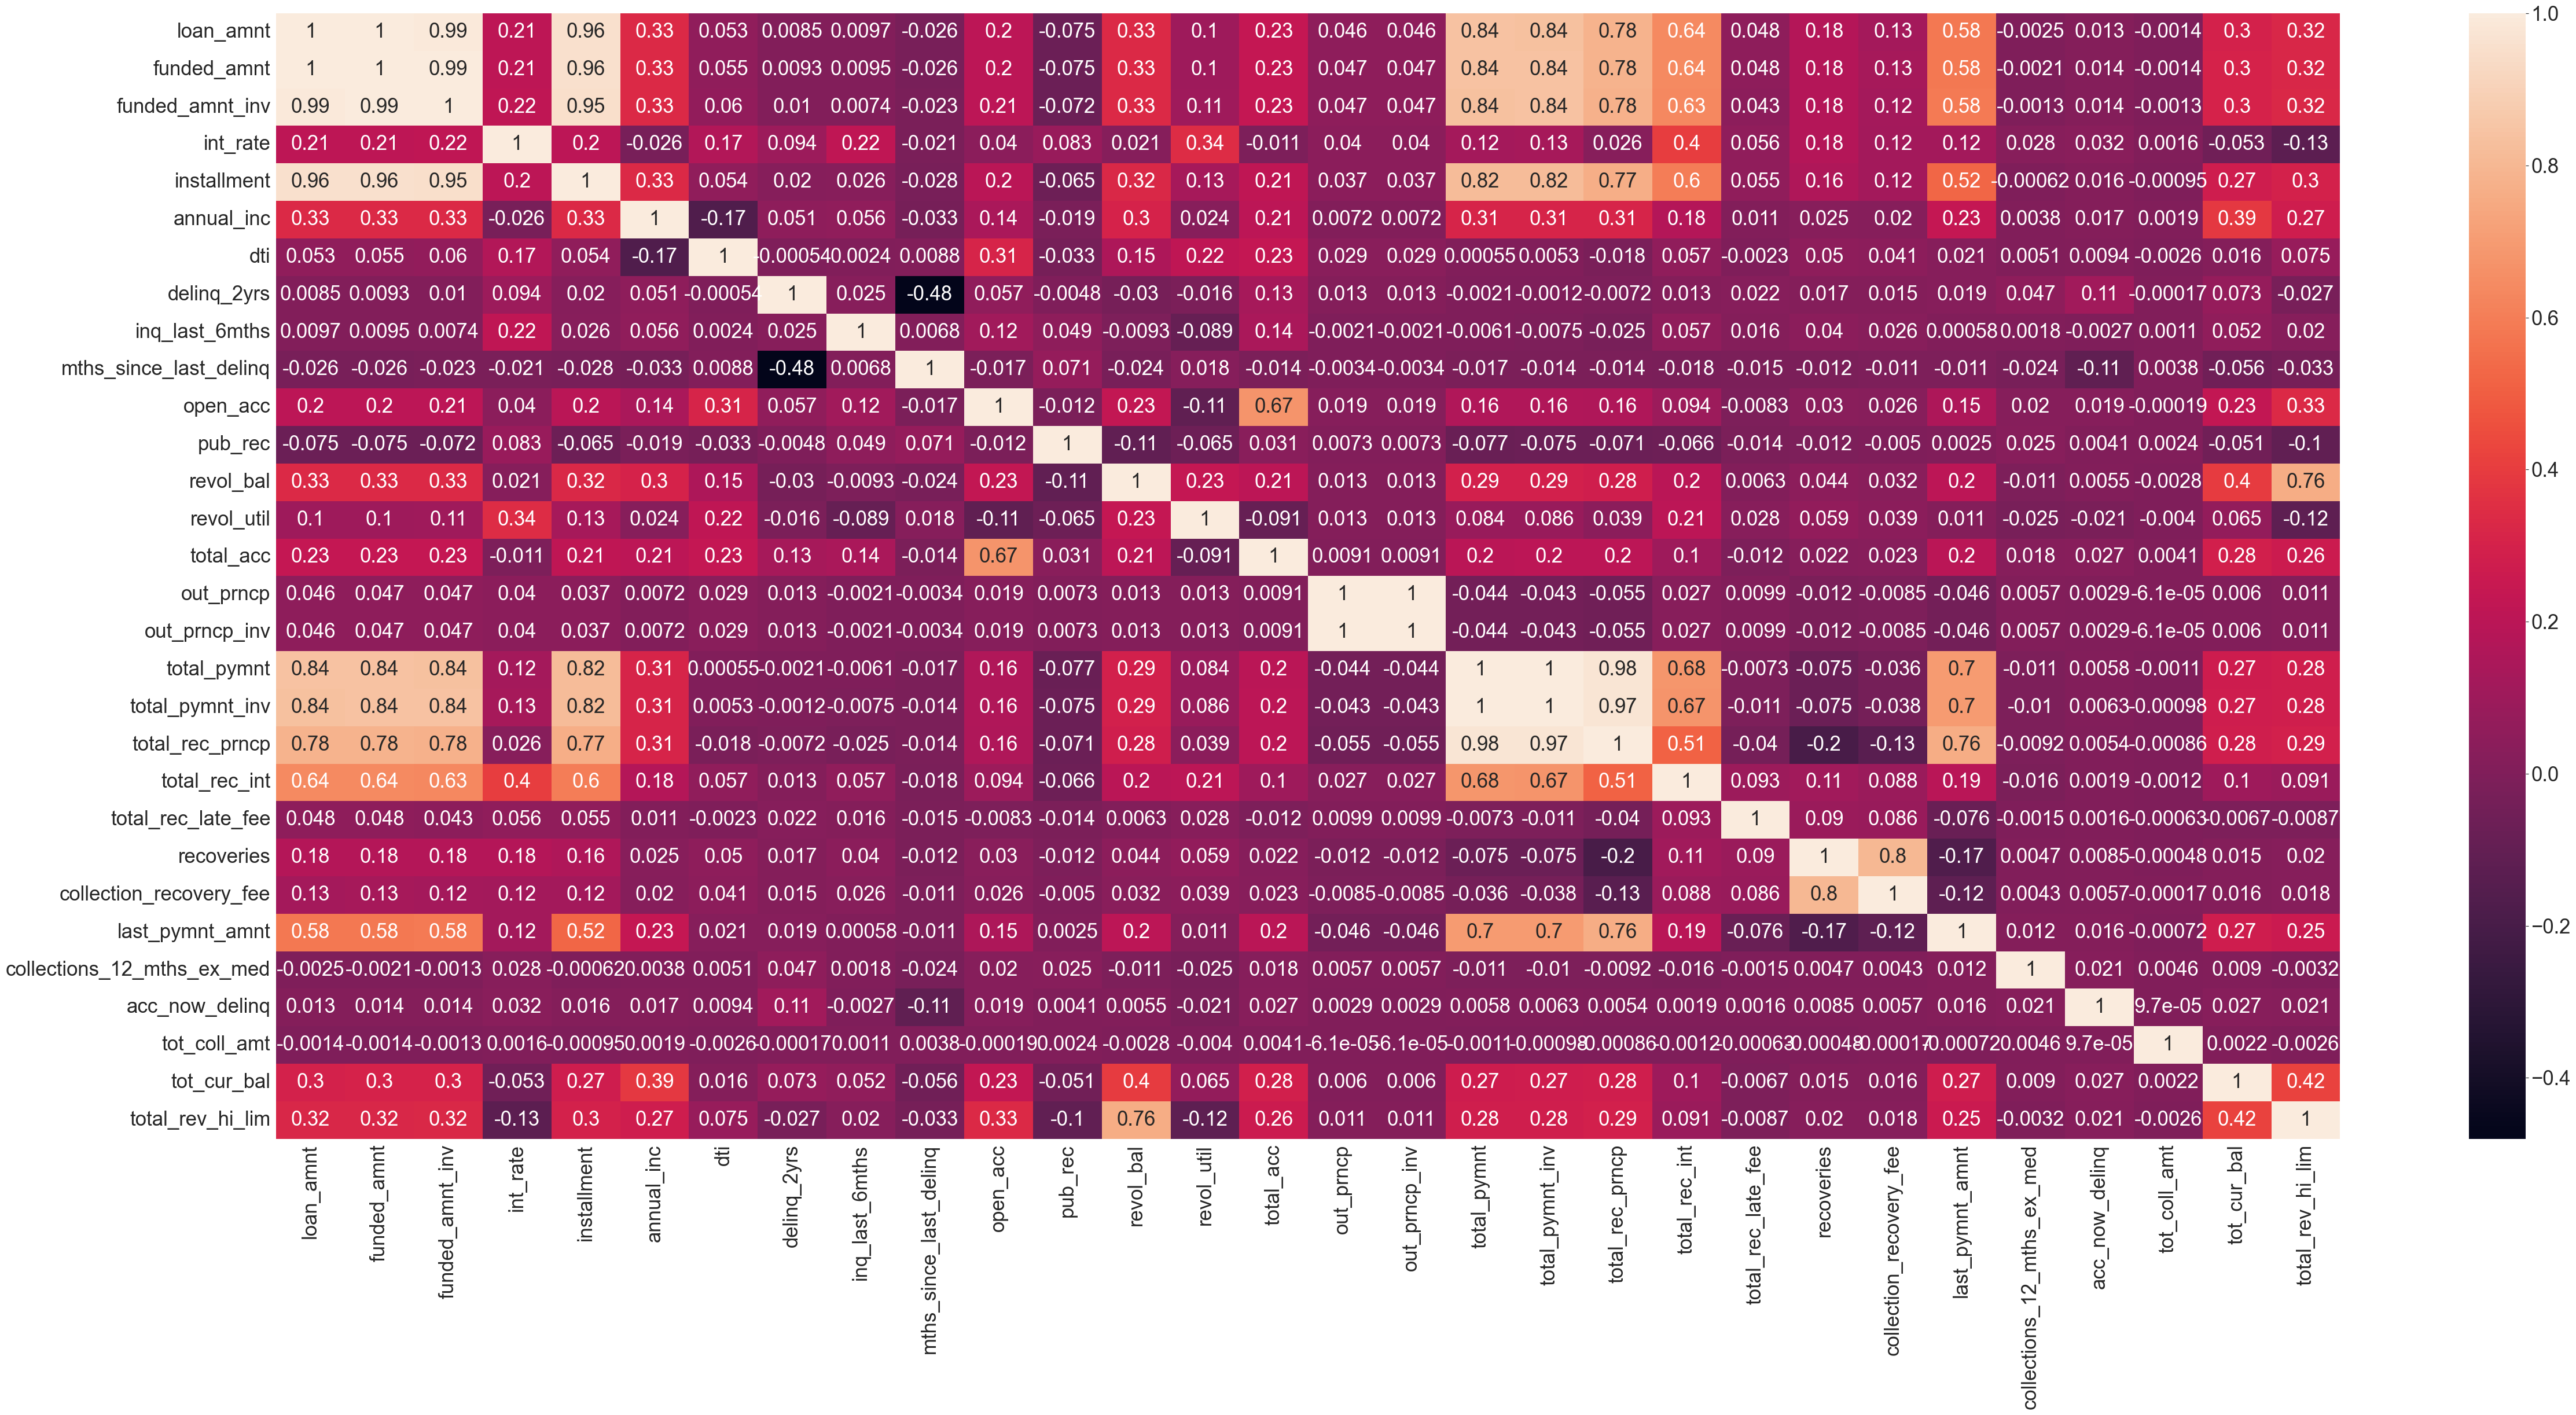

In [166]:
plt.figure(figsize = (50,25))       # drop columns having corr < 0.95
sns.heatmap(numeric.corr(),fmt = '.2g',annot  =True)
plt.tight_layout()

In [167]:
cat  = df1.select_dtypes(include = 'object')

## Reason

* Dropping the following columns down below because of they are highly correlated with other independent variables.
 # 'funded_amnt','funded_amnt_inv','installment','total_pymnt_inv','total_pymnt_inv'
* Dropping 
# sub-regions column as well becasue values in some regions are very high comparatively to others, and we already have region column.

In [168]:
 df1.drop(['sub-regions','funded_amnt','funded_amnt_inv','installment','total_pymnt_inv','total_pymnt_inv'], axis = 1,inplace  = True)

In [169]:
pd.options.display.float_format = '{:,.2f}'.format

In [170]:
var = numeric.var()
var

loan_amnt                        66,151,981.95
funded_amnt                      65,788,659.55
funded_amnt_inv                  66,088,387.31
int_rate                                 19.40
installment                          59,982.19
annual_inc                    3,455,728,641.02
dti                                      60.75
delinq_2yrs                               0.55
inq_last_6mths                            1.14
mths_since_last_delinq                  213.36
open_acc                                 23.94
pub_rec                                   0.19
revol_bal                       351,440,374.60
revol_util                              613.82
total_acc                               138.05
out_prncp                           914,214.19
out_prncp_inv                       913,708.12
total_pymnt                      89,937,955.05
total_pymnt_inv                  89,939,173.69
total_rec_prncp                  69,568,333.79
total_rec_int                     4,273,405.90
total_rec_lat

# Scaling the data

In [171]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [172]:
df1.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'target_loan_status', 'region',
       'emp_title_fe'],
      dtype='object')

In [173]:
X = df1.drop(['target_loan_status'],axis = 1)
y = df1['target_loan_status']
y.sort_index(inplace = True)

In [ ]:
X_num = X.select_dtypes(include = ['int64','float64'])
X_cat = X.select_dtypes(include = 'object')


X_num = X.select_dtypes(include = ['int64','float64'])
X_cat = X.select_dtypes(include = 'object')
#index_sorting
X_cat.sort_index(inplace = True)
X_num.sort_index(inplace = True)

#Encoding
X_cat_encoded = pd.get_dummies(X_cat,drop_first = True)


#to retain original index of our data 
default_index = X_num.index

#Scaling

mm = MinMaxScaler()
mm.fit(X_num)
X_num_scaled = pd.DataFrame(mm.transform(X_num), columns = X_num.columns)
X_num_scaled.index = default_index

In [ ]:
X1 = X.copy()

In [ ]:
X2 = X.copy()

In [ ]:
X3 = X.copy()

In [ ]:
X.iloc[:,22:38].columns

In [174]:
for i in range(0,3):
    X = df1.drop(['target_loan_status'],axis = 1)
    y = df1['target_loan_status']
    y.sort_index(inplace = True)
    if i == 0:
        X.drop(X.iloc[:,22:38].columns[:5],axis = 1,inplace = True)
        print(X.iloc[:,22:38].columns[:5])
    elif i == 1:
        X.drop(X.iloc[:,22:38].columns[5:10],axis = 1,inplace = True)
        print(X.iloc[:,22:38].columns[5:10])
    else:
        X.drop(X.iloc[:,22:38].columns[10:],axis = 1,inplace = True)
        print(X.iloc[:,22:38].columns[10:])
        
    X_num = X.select_dtypes(include = ['int64','float64'])
    X_cat = X.select_dtypes(include = 'object')

    #index_sorting
    X_cat.sort_index(inplace = True)
    X_num.sort_index(inplace = True)

    #Encoding
    X_cat_encoded = pd.get_dummies(X_cat,drop_first = True)


    #to retain original index of our numeric variables data 
    default_index = X_num.index

    #Scaling

    mm = MinMaxScaler()
    mm.fit(X_num)
    X_num_scaled = pd.DataFrame(mm.transform(X_num), columns = X_num.columns)
    X_num_scaled.index = default_index  
    
    #concatenating encoded and scaled variables
    X_final = X_cat_encoded.merge(X_num_scaled,left_index = True,right_index = True)
    
    #Splitting the data
    
    np.random.seed(42)
    X_train,X_test,y_train,y_test = train_test_split(X_final, y ,test_size = 0.2)
     
    #creating Logistic regression instance    
    lr = LogisticRegression(max_iter = 500)
    lr.fit(X_train,y_train)  
    
    #Prediction using trained model
    y_lr = lr.predict(X_test)
    
    #Evaluating model performance
    
    print(classification_report(y_test,y_lr))
    print()
    print(f1_score(y_test,y_lr))
    print()
    print(confusion_matrix(y_test,y_lr))
    
    

Index(['total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt'],
      dtype='object')


NameError: name 'train_test_split' is not defined

In [ ]:
#dti, #initial_list_status

In [ ]:
'total_rec_prncp', 'recoveries', 'last_pymnt_amnt',
       'collection_recovery_fee', 'total_pymnt', 'loan_amnt',
       'total_rec_int', 'int_rate', 'tot_cur_bal', ,
       'total_rev_hi_lim', 'total_rec_late_fee', 'revol_bal',
       'out_prncp_inv', 'revol_util', 'out_prncp', ,
        'total_acc'

In [ ]:
X.iloc[:,22:38].columns

In [175]:
X = df1.drop(['target_loan_status'],axis = 1)
y = df1['target_loan_status']

In [ ]:
X.drop(X.iloc[:,22:38],axis = 1,inplace = True)

In [ ]:
X.head()

In [ ]:
X = df1.drop(['target_loan_status'],axis = 1)
y = df1['target_loan_status']
y.sort_index(inplace = True)
X.drop(X.iloc[:,22:38],axis = 1,inplace = True)
       
        
X_num = X.select_dtypes(include = ['int64','float64'])
X_cat = X.select_dtypes(include = 'object')

    #index_sorting
X_cat.sort_index(inplace = True)
X_num.sort_index(inplace = True)

    #Encoding
X_cat_encoded = pd.get_dummies(X_cat,drop_first = True)


    #to retain original index of our numeric variables data 
default_index = X_num.index

    #Scaling

mm = MinMaxScaler()
mm.fit(X_num)
X_num_scaled = pd.DataFrame(mm.transform(X_num), columns = X_num.columns)
X_num_scaled.index = default_index  
    
    #concatenating encoded and scaled variables
X_final = X_cat_encoded.merge(X_num_scaled,left_index = True,right_index = True)
    
    #Splitting the data
    
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X_final, y ,test_size = 0.2)
     
    #creating Logistic regression instance    
lr = LogisticRegression(max_iter = 500)
lr.fit(X_train,y_train)  
    
    #Prediction using trained model
y_lr = lr.predict(X_test)
    
    #Evaluating model performance
    
print(classification_report(y_test,y_lr))
print()
print(f1_score(y_test,y_lr))
print()
print(accuracy_score(y_test,y_lr))
print()
print(roc_auc_score(y_test,y_lr))
print()
print(confusion_matrix(y_test,y_lr))
    
    

In [ ]:
df1.head(2)

In [ ]:
df1.to_csv('processed_lendningclub')

In [ ]:
X_num.shape

In [176]:
X_num = X.select_dtypes(include = ['int64','float64'])
X_cat = X.select_dtypes(include = 'object')

In [177]:
X_num.sort_index(inplace = True)

In [178]:
X_cat.sort_index(inplace = True)

## Encoding

In [ ]:
X_cat_encoded = pd.get_dummies(X_cat,drop_first = True)
X_cat_encoded

In [ ]:
y

In [ ]:
default_index = X_num.index

## Scaling

In [ ]:
mm = MinMaxScaler()
mm.fit(X_num)
X_num_scaled = pd.DataFrame(mm.transform(X_num), columns = X_num.columns)
X_num_scaled.index = default_index

In [ ]:
X_num_scaled

# Concatenating Encoded and Scaled Values

In [ ]:
X_final = X_cat_encoded.merge(X_num_scaled,left_index = True,right_index = True)
X_final.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix, classification_report, roc_auc_score

In [ ]:
np.random.seed(2)
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size = 0.2)

In [ ]:
for i in [X_train,X_test,y_train,y_test]:
    print(i.shape)

### Random Forest

In [ ]:
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)


In [ ]:
Rf.score(X_test,y_test)

In [ ]:
y_pred = Rf.predict(X_test)
y_pred

In [ ]:
Rf.predict(X_train)

In [ ]:
f1_score(y_test,y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
precision_score(y_test,y_pred)

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
imp_df = pd.DataFrame({'feature name':X_train.columns,'importance' : Rf.feature_importances_})

In [ ]:
imp_df.sort_values(by = 'importance',ascending = False,inplace = True)

In [ ]:
plt.rc('font',size = 15)
plt.figure(figsize = (40,10))
sns.barplot(data = imp_df.head(20),x = 'importance',y = 'feature name')
plt.tick_params('x', rotation = 45)

In [ ]:
imp_df['feature name'][:20].values

In [ ]:
d[d['index'].eq('total_rec_prncp')]

### Logistic regression

In [ ]:
lr = LogisticRegression(max_iter = 500)
lr.fit(X_train,y_train)

In [ ]:
y_lr = lr.predict(X_test)

In [ ]:
accuracy_score(y_test,y_lr)

In [ ]:
confusion_matrix(y_test,y_lr)#default 0 #fully paid 1

In [ ]:
roc_auc_score(y_test,y_lr)

In [ ]:
#create a new notebook, and imitate kaggle steps

In [ ]:
total_rec_prncp
87                 recoveries
89            last_pymnt_amnt
88    collection_recovery_fee

In [ ]:
print(classification_report(y_test,y_lr))

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_lr, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


### Gradient boosting

In [ ]:
GB = GradientBoostingClassifier()

In [ ]:
GB.fit(X_train,y_train)

In [ ]:
y_pred1 = GB.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred1)

In [ ]:
roc_auc_score(y_test,y_pred1)

In [ ]:
print(classification_report(y_test,y_pred1))

In [ ]:
confusion_matrix(y_test,y_pred1)

# Building a model without scaling our data,
# and we are still getting the values of f1 and recall around 0.97-0.98.

### without scaled

In [ ]:
X.select_dtypes('datetime64')

In [ ]:
X.drop(['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d'], axis = 1, inplace = True)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train_ws,X_test_ws,y_train_ws,y_test_ws = train_test_split(X,y,test_size = 0.2)

In [ ]:
lor = LogisticRegression(max_iter = 500)
lor.fit(X_train_ws,y_train_ws)

In [ ]:
y1 = lor.predict(X_test_ws)

In [ ]:
accuracy_score(y_test_ws,y1)

In [ ]:
print(classification_report(y_test_ws,y1))

# Problem:- 

### If our aim is to built a ML model which will predict whether a customer is going to be a defaulter or not, adn based on that , we will issue loan, then why do we need those variables who won't be there when customer applies for a loan.

### 

In [ ]:
plt.figure(figsize = (50,25))       # drop columns having corr < 0.95
sns.heatmap(pd.concat([numeric,y],axis = 1).corr(),fmt = '.2g',annot  =True)
plt.tight_layout()